Изучение обучения трансформера регрессии

Попробуем делать разные операции со слоями трансформера и смотреть как это влияет на его обучение.

In [1]:
import torch
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from configurations import build_conf
from clean_logs_tool import clean_dirs_by_name


device = 'cuda' if torch.cuda.is_available() else 'cpu'


from quinine import Quinfig
from schema import schema
from experiments import Experiment


config_path = './configs/main.yaml'  # specify your config file path here

conf_data = Quinfig(config_path=config_path, schema=schema)
conf = build_conf(conf_data)


Experiment.yaml_experiment_info(conf)

"""
Выведем дефолтные конфигурации эксперимента
По умолчанию transform_func и auto_transform_func это первые элементы списков transform_variants и auto_transform_variants
transform преобразования делают измененную копию модели, для нее строится 2 график каждый eval цикл, обычно копия модели не учится
auto transform меняет основную модель - нас интересует перемешивание слоев, но можно делать и другие любые преобразования
"""





Running experiment with params:
    log_model_weights: True
    transform_conf:
        switch_params: None
        duplicate_params: [1, 6, 1]
        full_backbone_copy: False
        no_layernorm_full_backbone_copy: False
        first_n_layers: None
        new_backbone_training: False
        readout2_training: False
        model_variants: ['modified', 'full_backbone + no_final_layer_norm']
        transform_variants: ['duplicate_layers', 'switch_layers']
        transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x0000020E8819D700>
    auto_transform_conf:
        permute_bounds_params: [1, 6]
        permute_interval: 10
        permute_model: False
        auto_transform_variants: ['auto_permute_layers', 'auto_custom_permute']
        use_custom_permute: False
        auto_transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x0000020E88283F70>


'\nВыведем дефолтные конфигурации эксперимента\nПо умолчанию transform_func и auto_transform_func это первые элементы списков transform_variants и auto_transform_variants\ntransform преобразования делают измененную копию модели, для нее строится 2 график каждый eval цикл, обычно копия модели не учится\nauto transform меняет основную модель - нас интересует перемешивание слоев, но можно делать и другие любые преобразования\n'

Эксперимент без модификаций, лосс одинаковый слева и справа

Deleted directory: .\exp_models\linear_regression\checkpoints\baseline
Deleted directory: .\exp_models\linear_regression\plots\baseline
Running experiment with params:
    log_model_weights: True
    transform_conf:
        switch_params: None
        duplicate_params: [1, 6, 1]
        full_backbone_copy: False
        no_layernorm_full_backbone_copy: False
        first_n_layers: None
        new_backbone_training: False
        readout2_training: False
        model_variants: ['modified', 'full_backbone + no_final_layer_norm']
        transform_variants: ['duplicate_layers', 'switch_layers']
        transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x00000171AEA3B820>
    auto_transform_conf:
        permute_bounds_params: [1, 6]
        permute_interval: 10
        permute_model: False
        auto_transform_variants: ['auto_permute_layers', 'auto_custom_permute']
        use_custom_permute: False
        auto_transform_func: <function variant.<locals>.decora

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


17.682946 M parameters


wandb: Currently logged in as: enemo_ce-warch (use `wandb login --relogin` to force relogin)


''

step 0: train loss 5.1706, train loss 2 5.1706
step 200: train loss 4.7601, train loss 2 4.7601
step 400: train loss 5.1627, train loss 2 5.1627


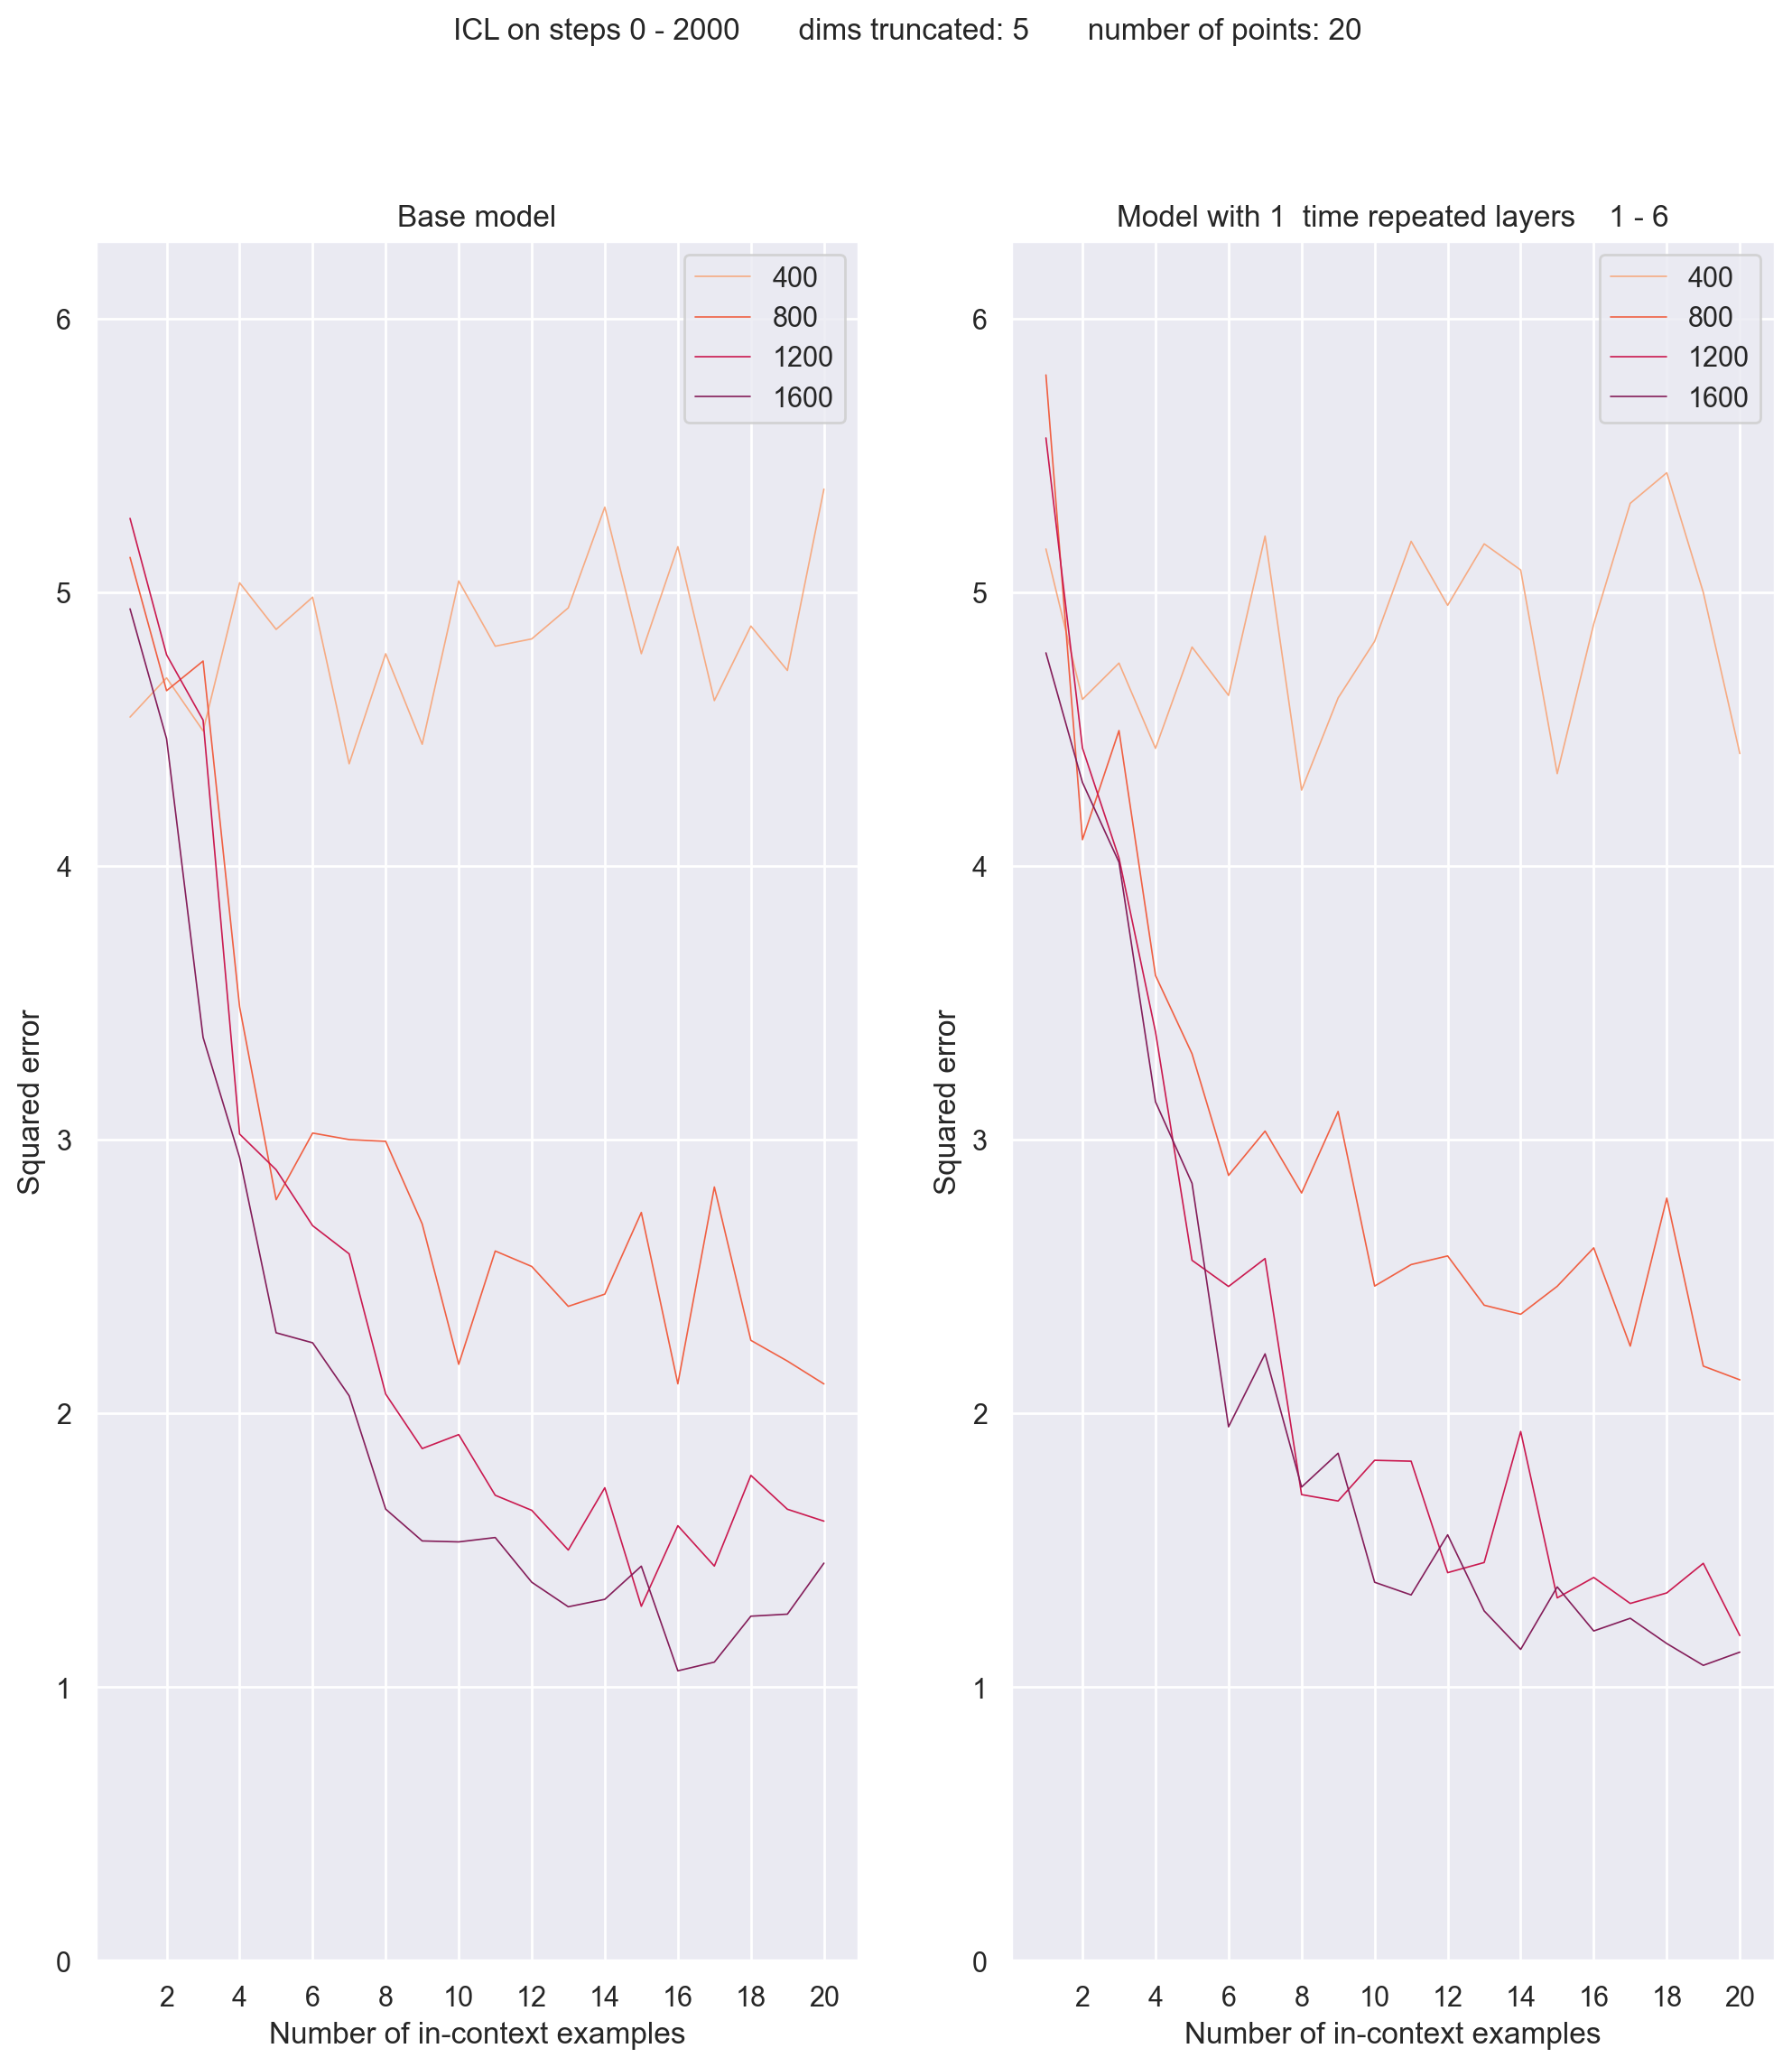

step 600: train loss 4.1588, train loss 2 4.1588
step 800: train loss 2.8178, train loss 2 2.8178
step 1000: train loss 2.4845, train loss 2 2.4845
step 1200: train loss 2.2597, train loss 2 2.2597
step 1400: train loss 2.1053, train loss 2 2.1053
step 1600: train loss 1.9190, train loss 2 1.9190
step 1800: train loss 1.9436, train loss 2 1.9436
step 2000: train loss 1.7966, train loss 2 1.7966


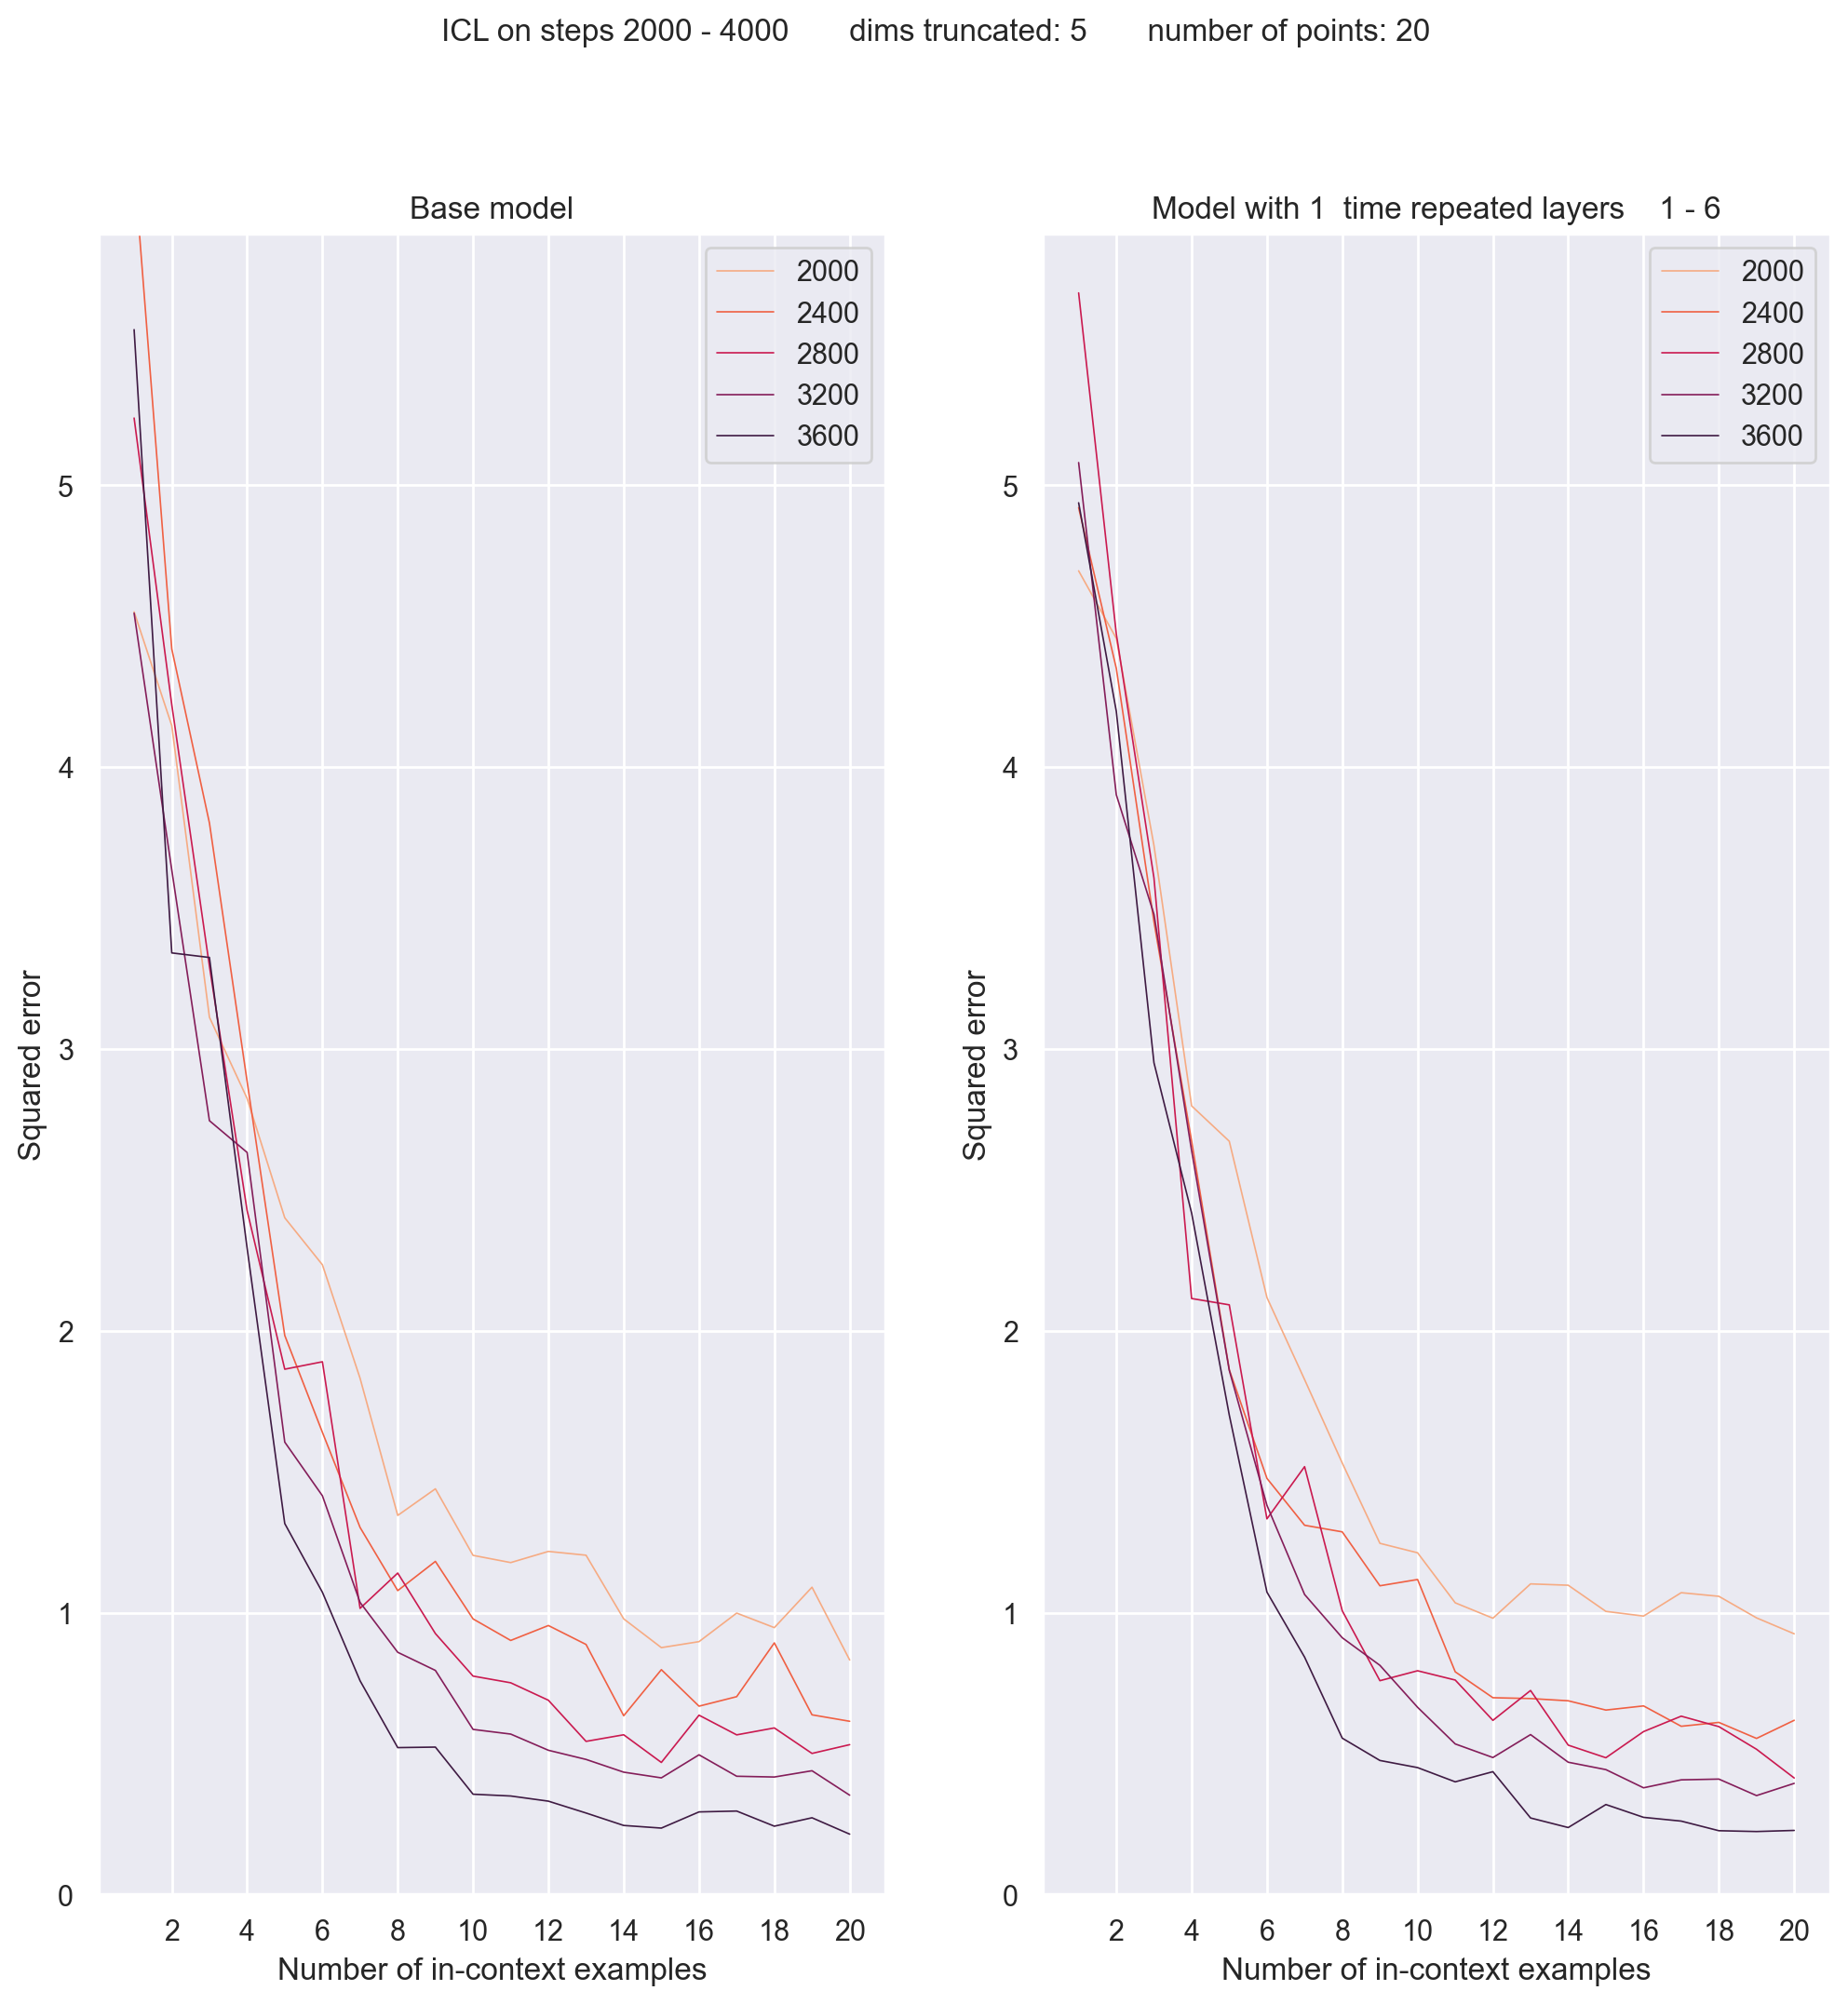

step 2200: train loss 1.6348, train loss 2 1.6348
step 2400: train loss 1.5289, train loss 2 1.5289
step 2600: train loss 1.4392, train loss 2 1.4392
step 2800: train loss 1.3261, train loss 2 1.3261
step 3000: train loss 1.3613, train loss 2 1.3613
step 3200: train loss 1.2887, train loss 2 1.2887
step 3400: train loss 1.2059, train loss 2 1.2059
step 3600: train loss 1.0918, train loss 2 1.0918
step 3800: train loss 1.1165, train loss 2 1.1165
step 4000: train loss 1.0465, train loss 2 1.0465


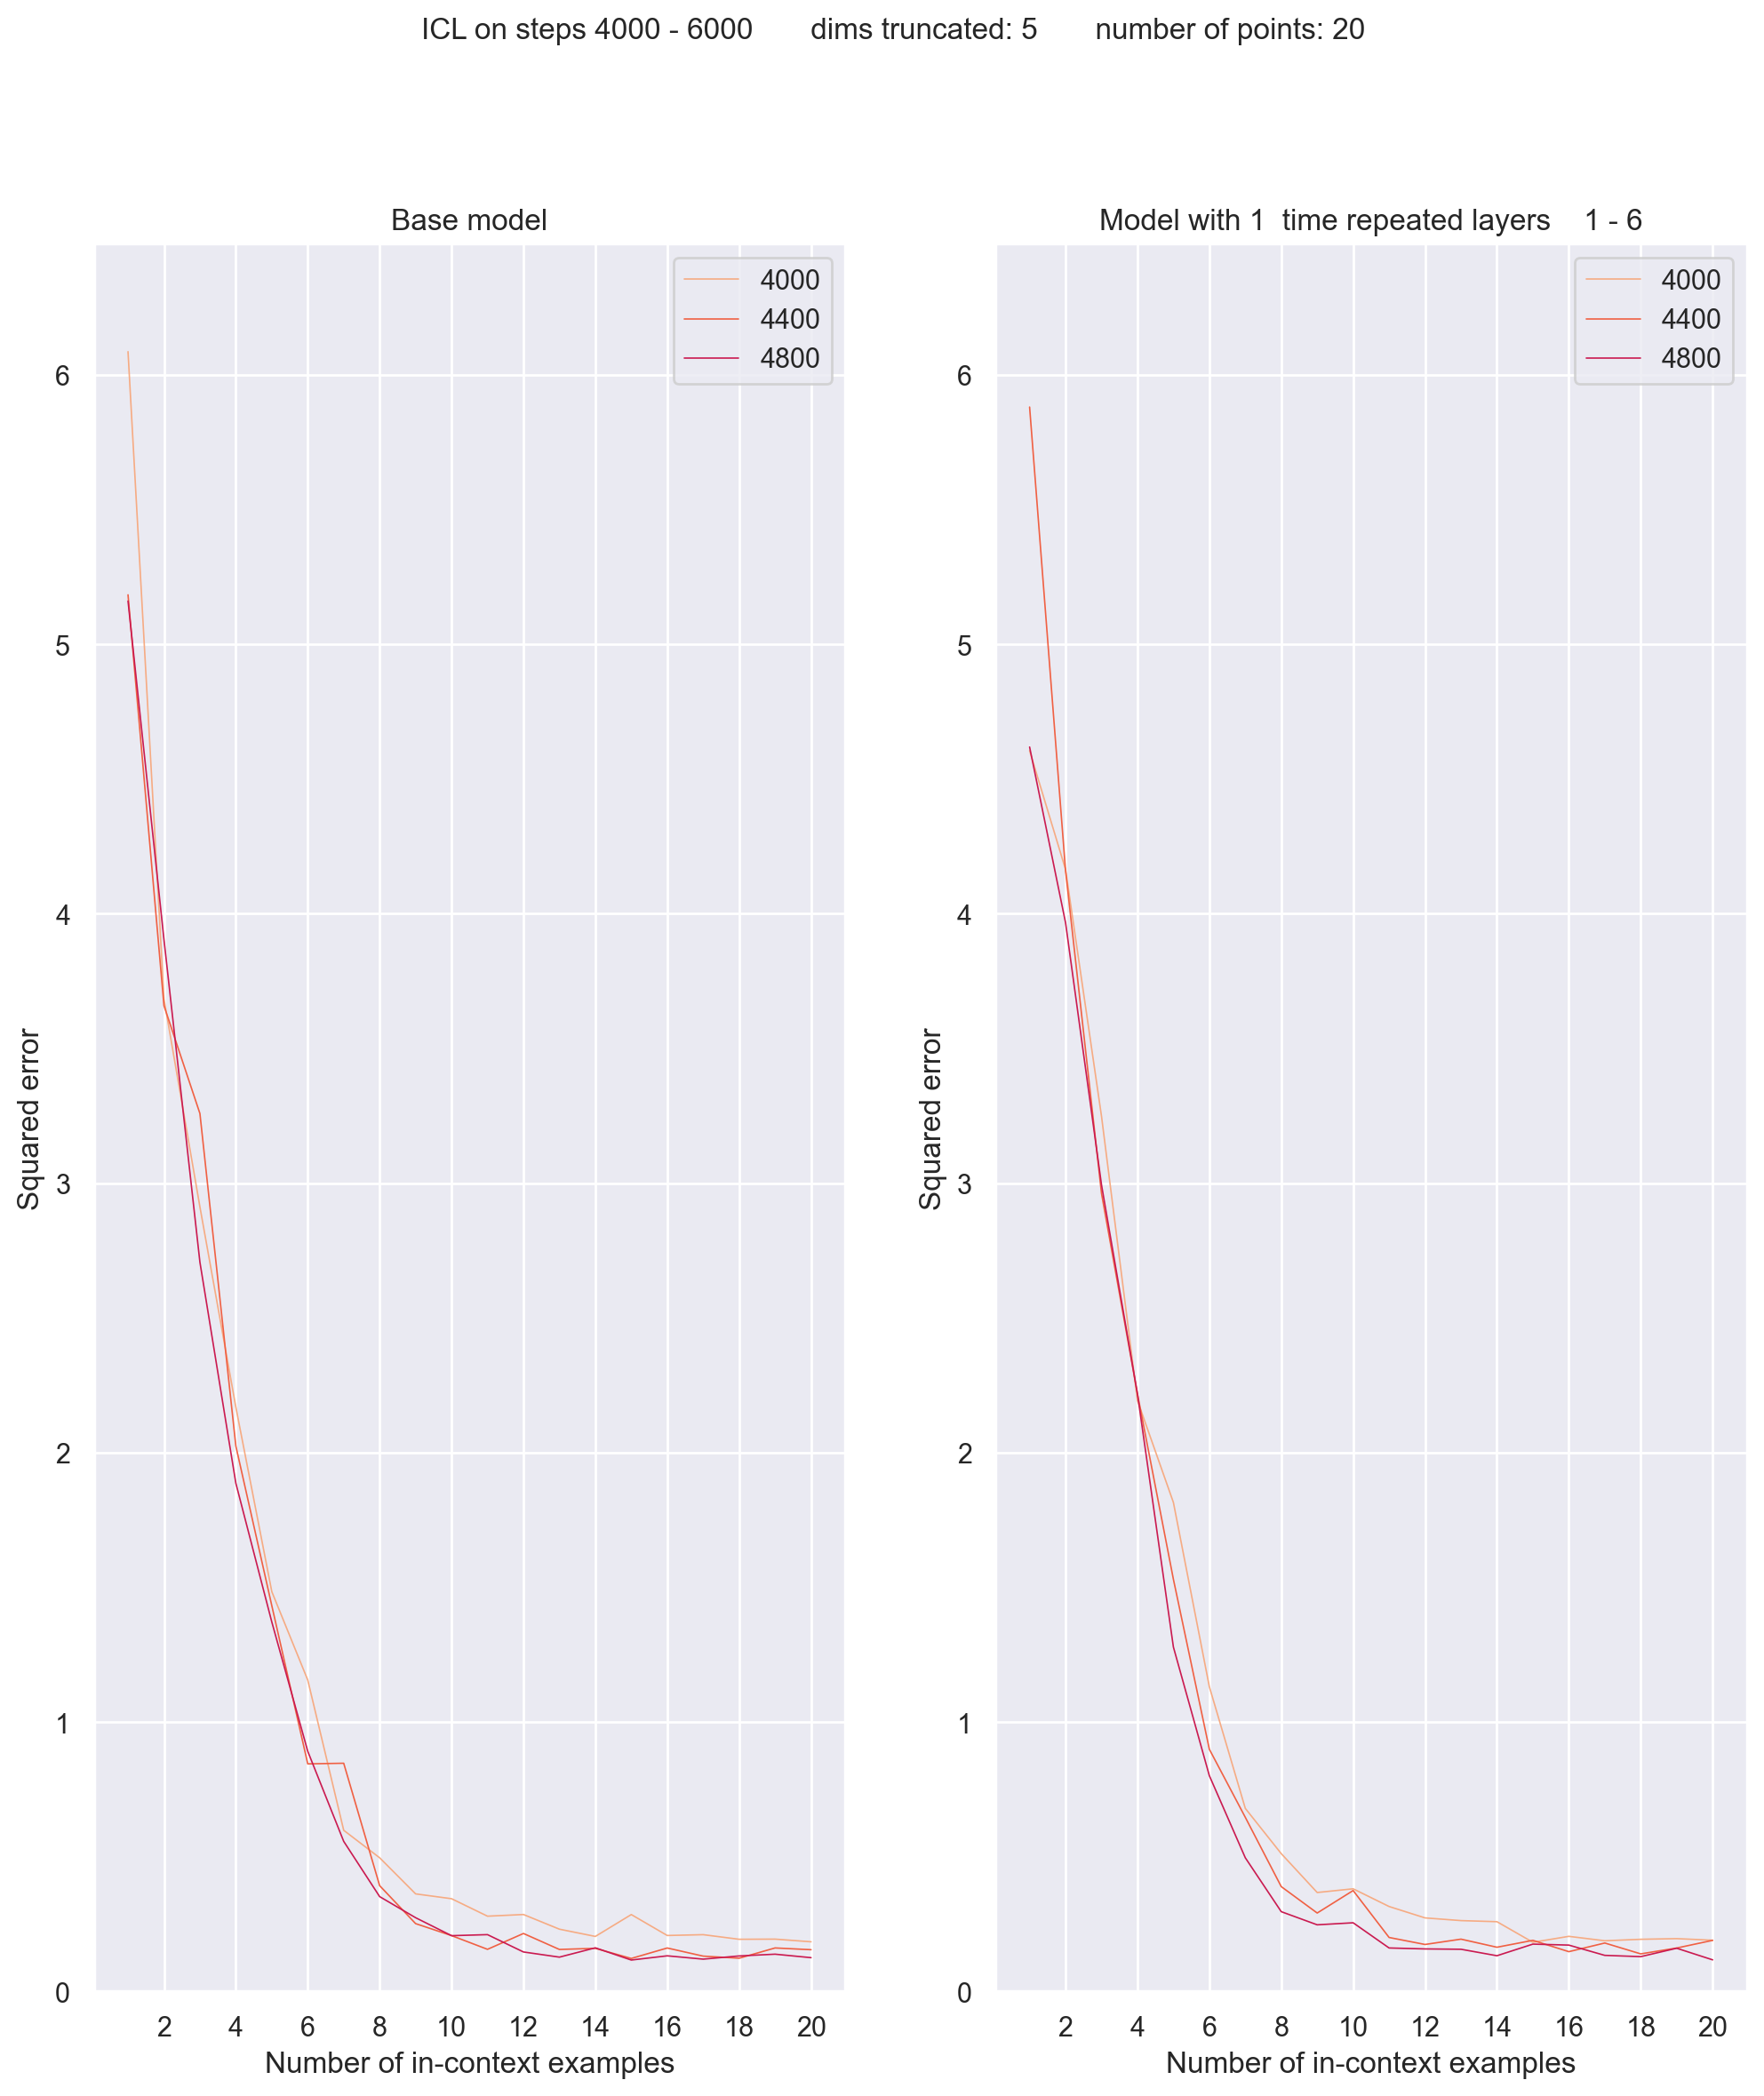

step 4200: train loss 0.9819, train loss 2 0.9819
step 4400: train loss 0.9983, train loss 2 0.9983
step 4600: train loss 0.9459, train loss 2 0.9459
step 4800: train loss 0.9945, train loss 2 0.9945
step 4999: train loss 0.9157, train loss 2 0.9157


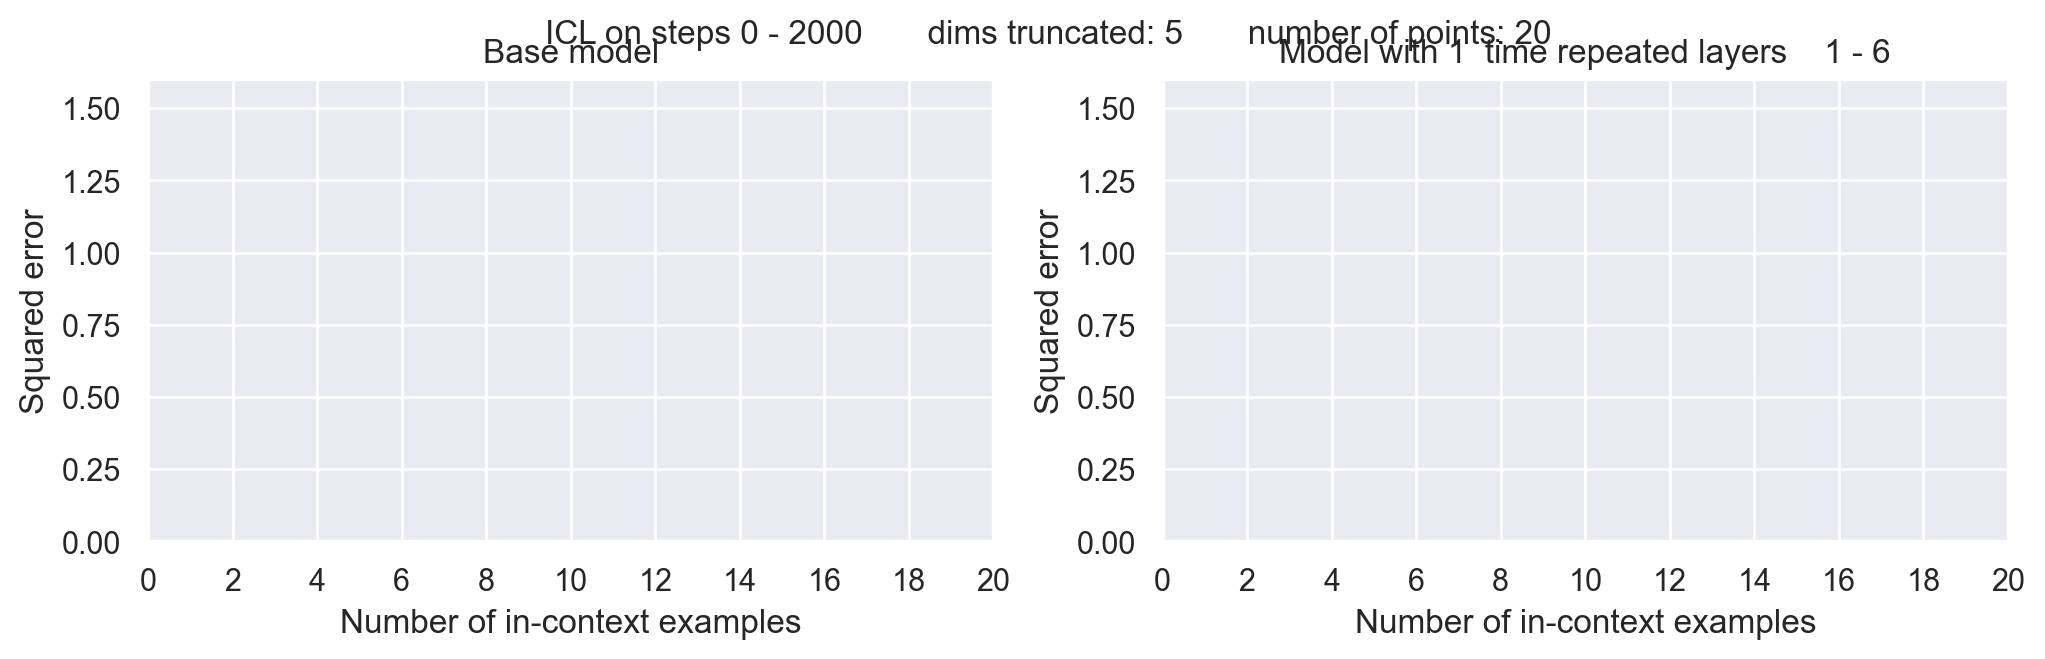

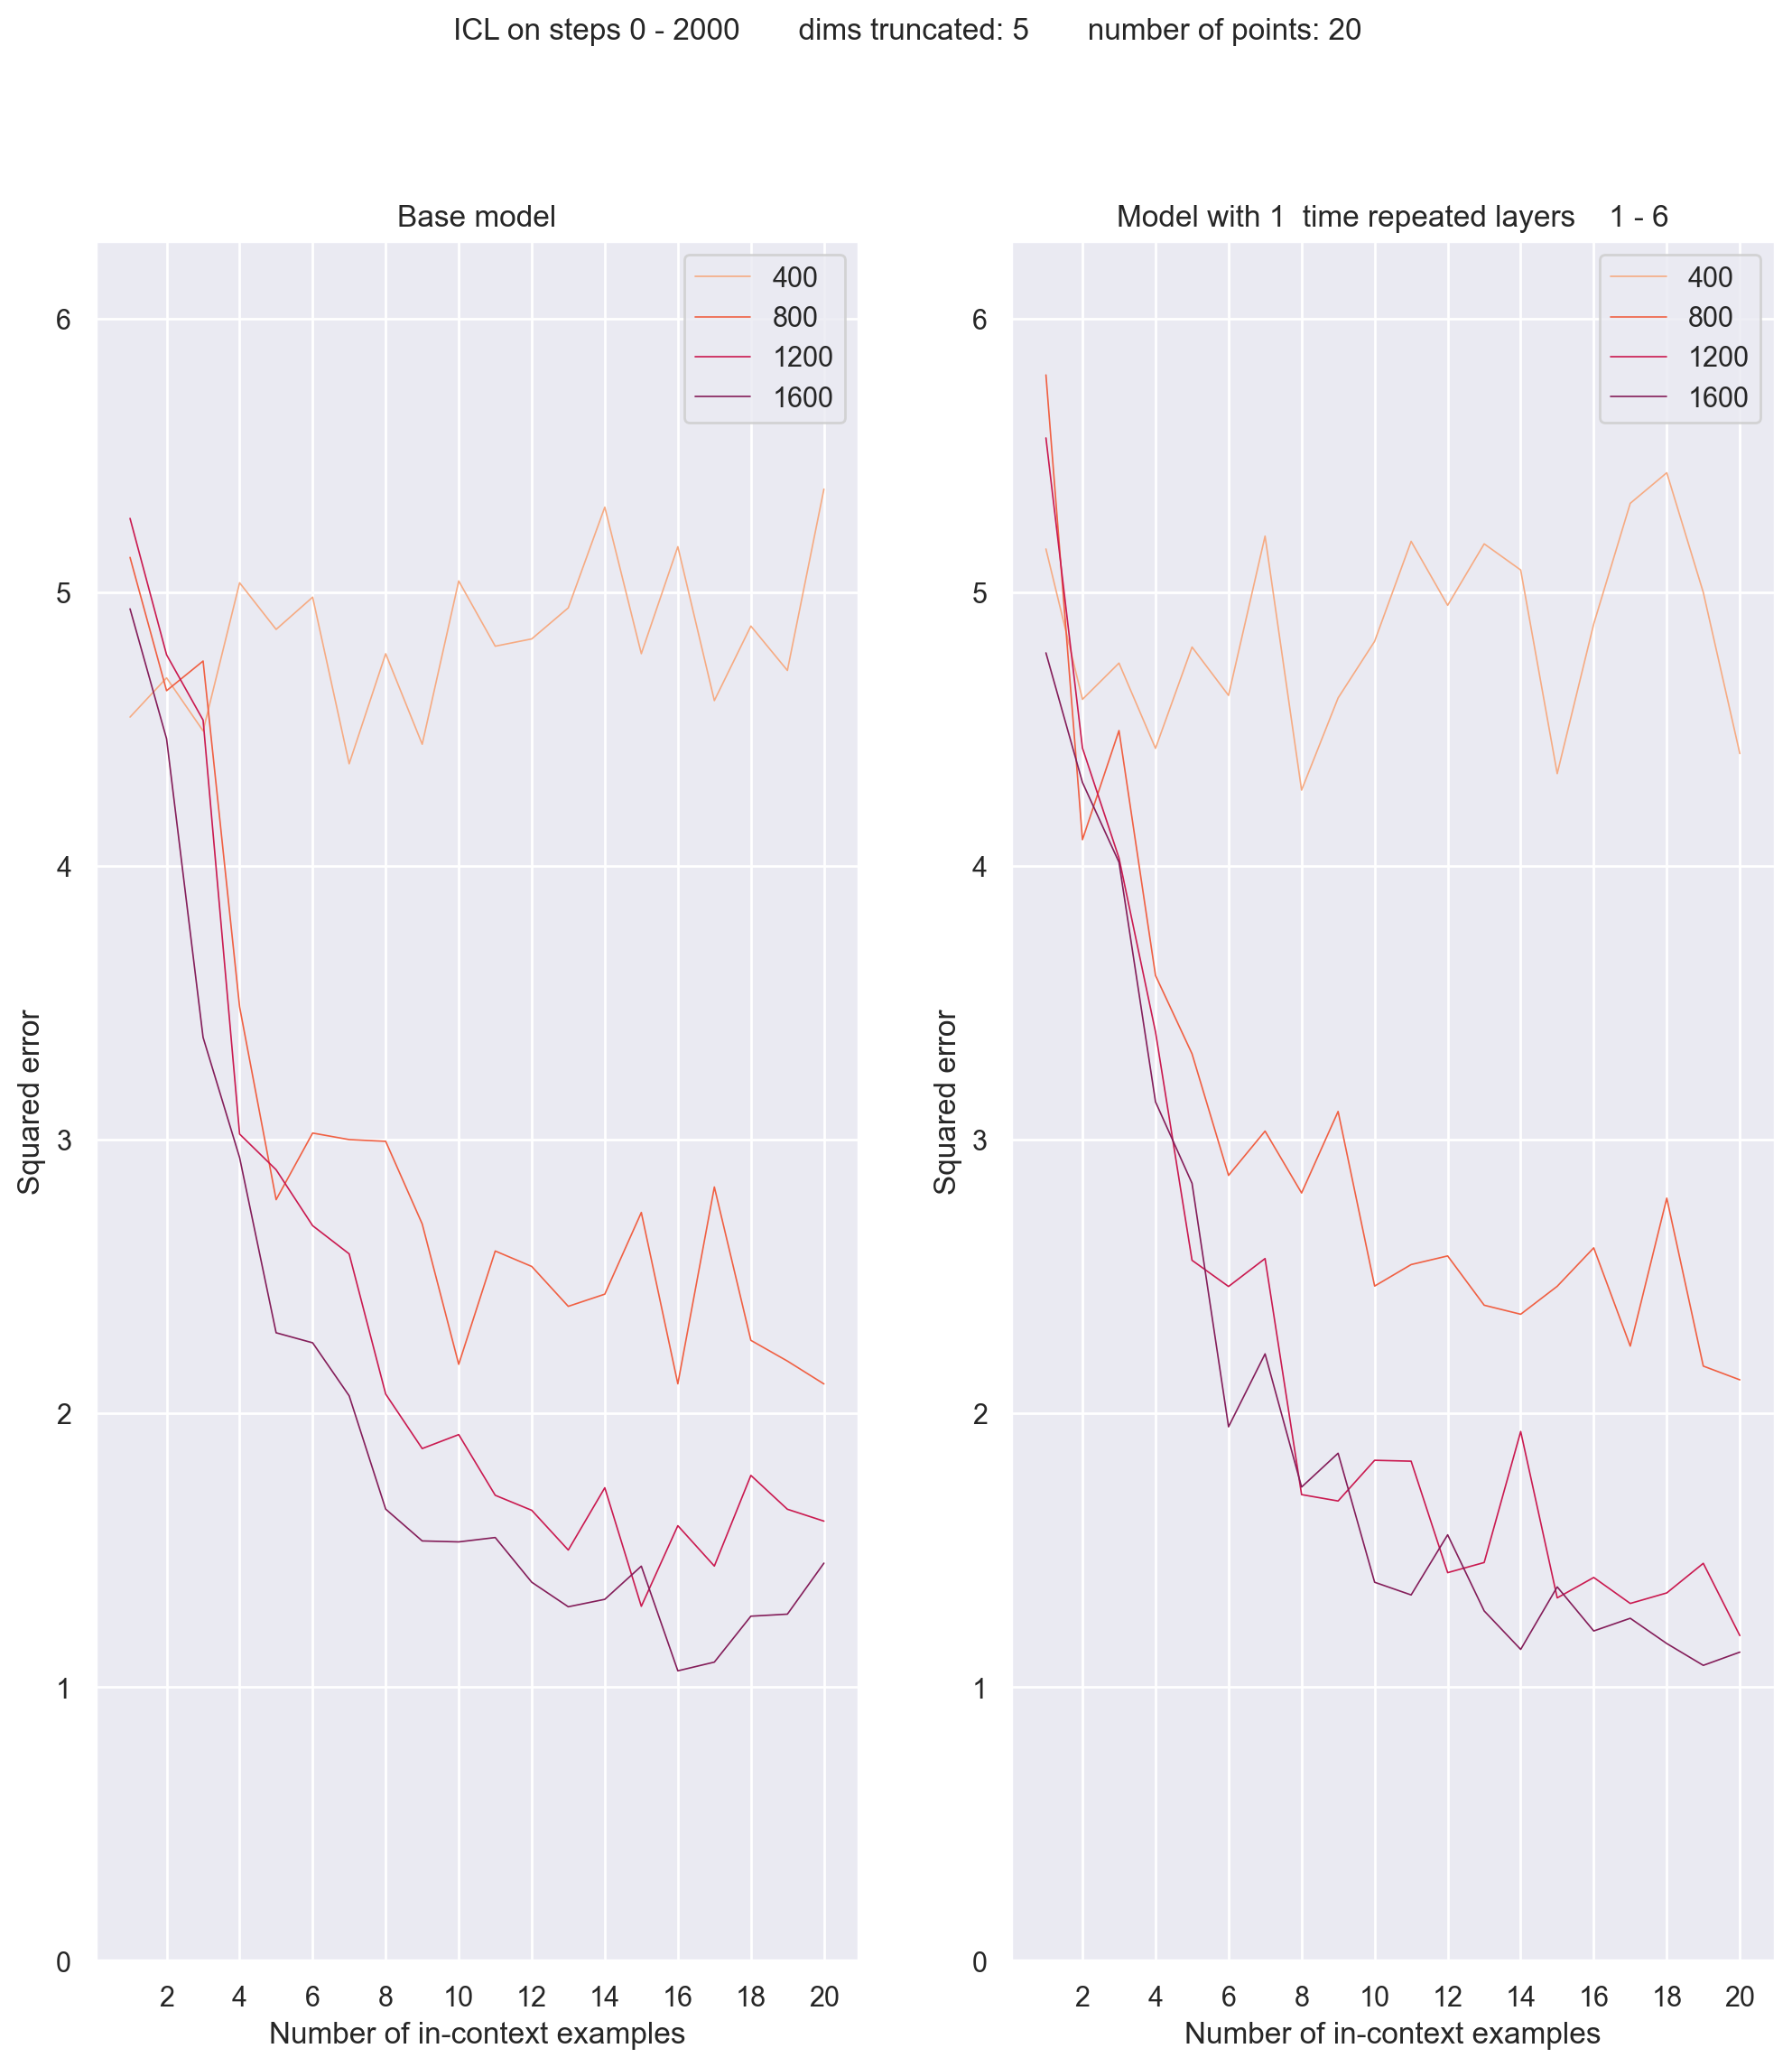

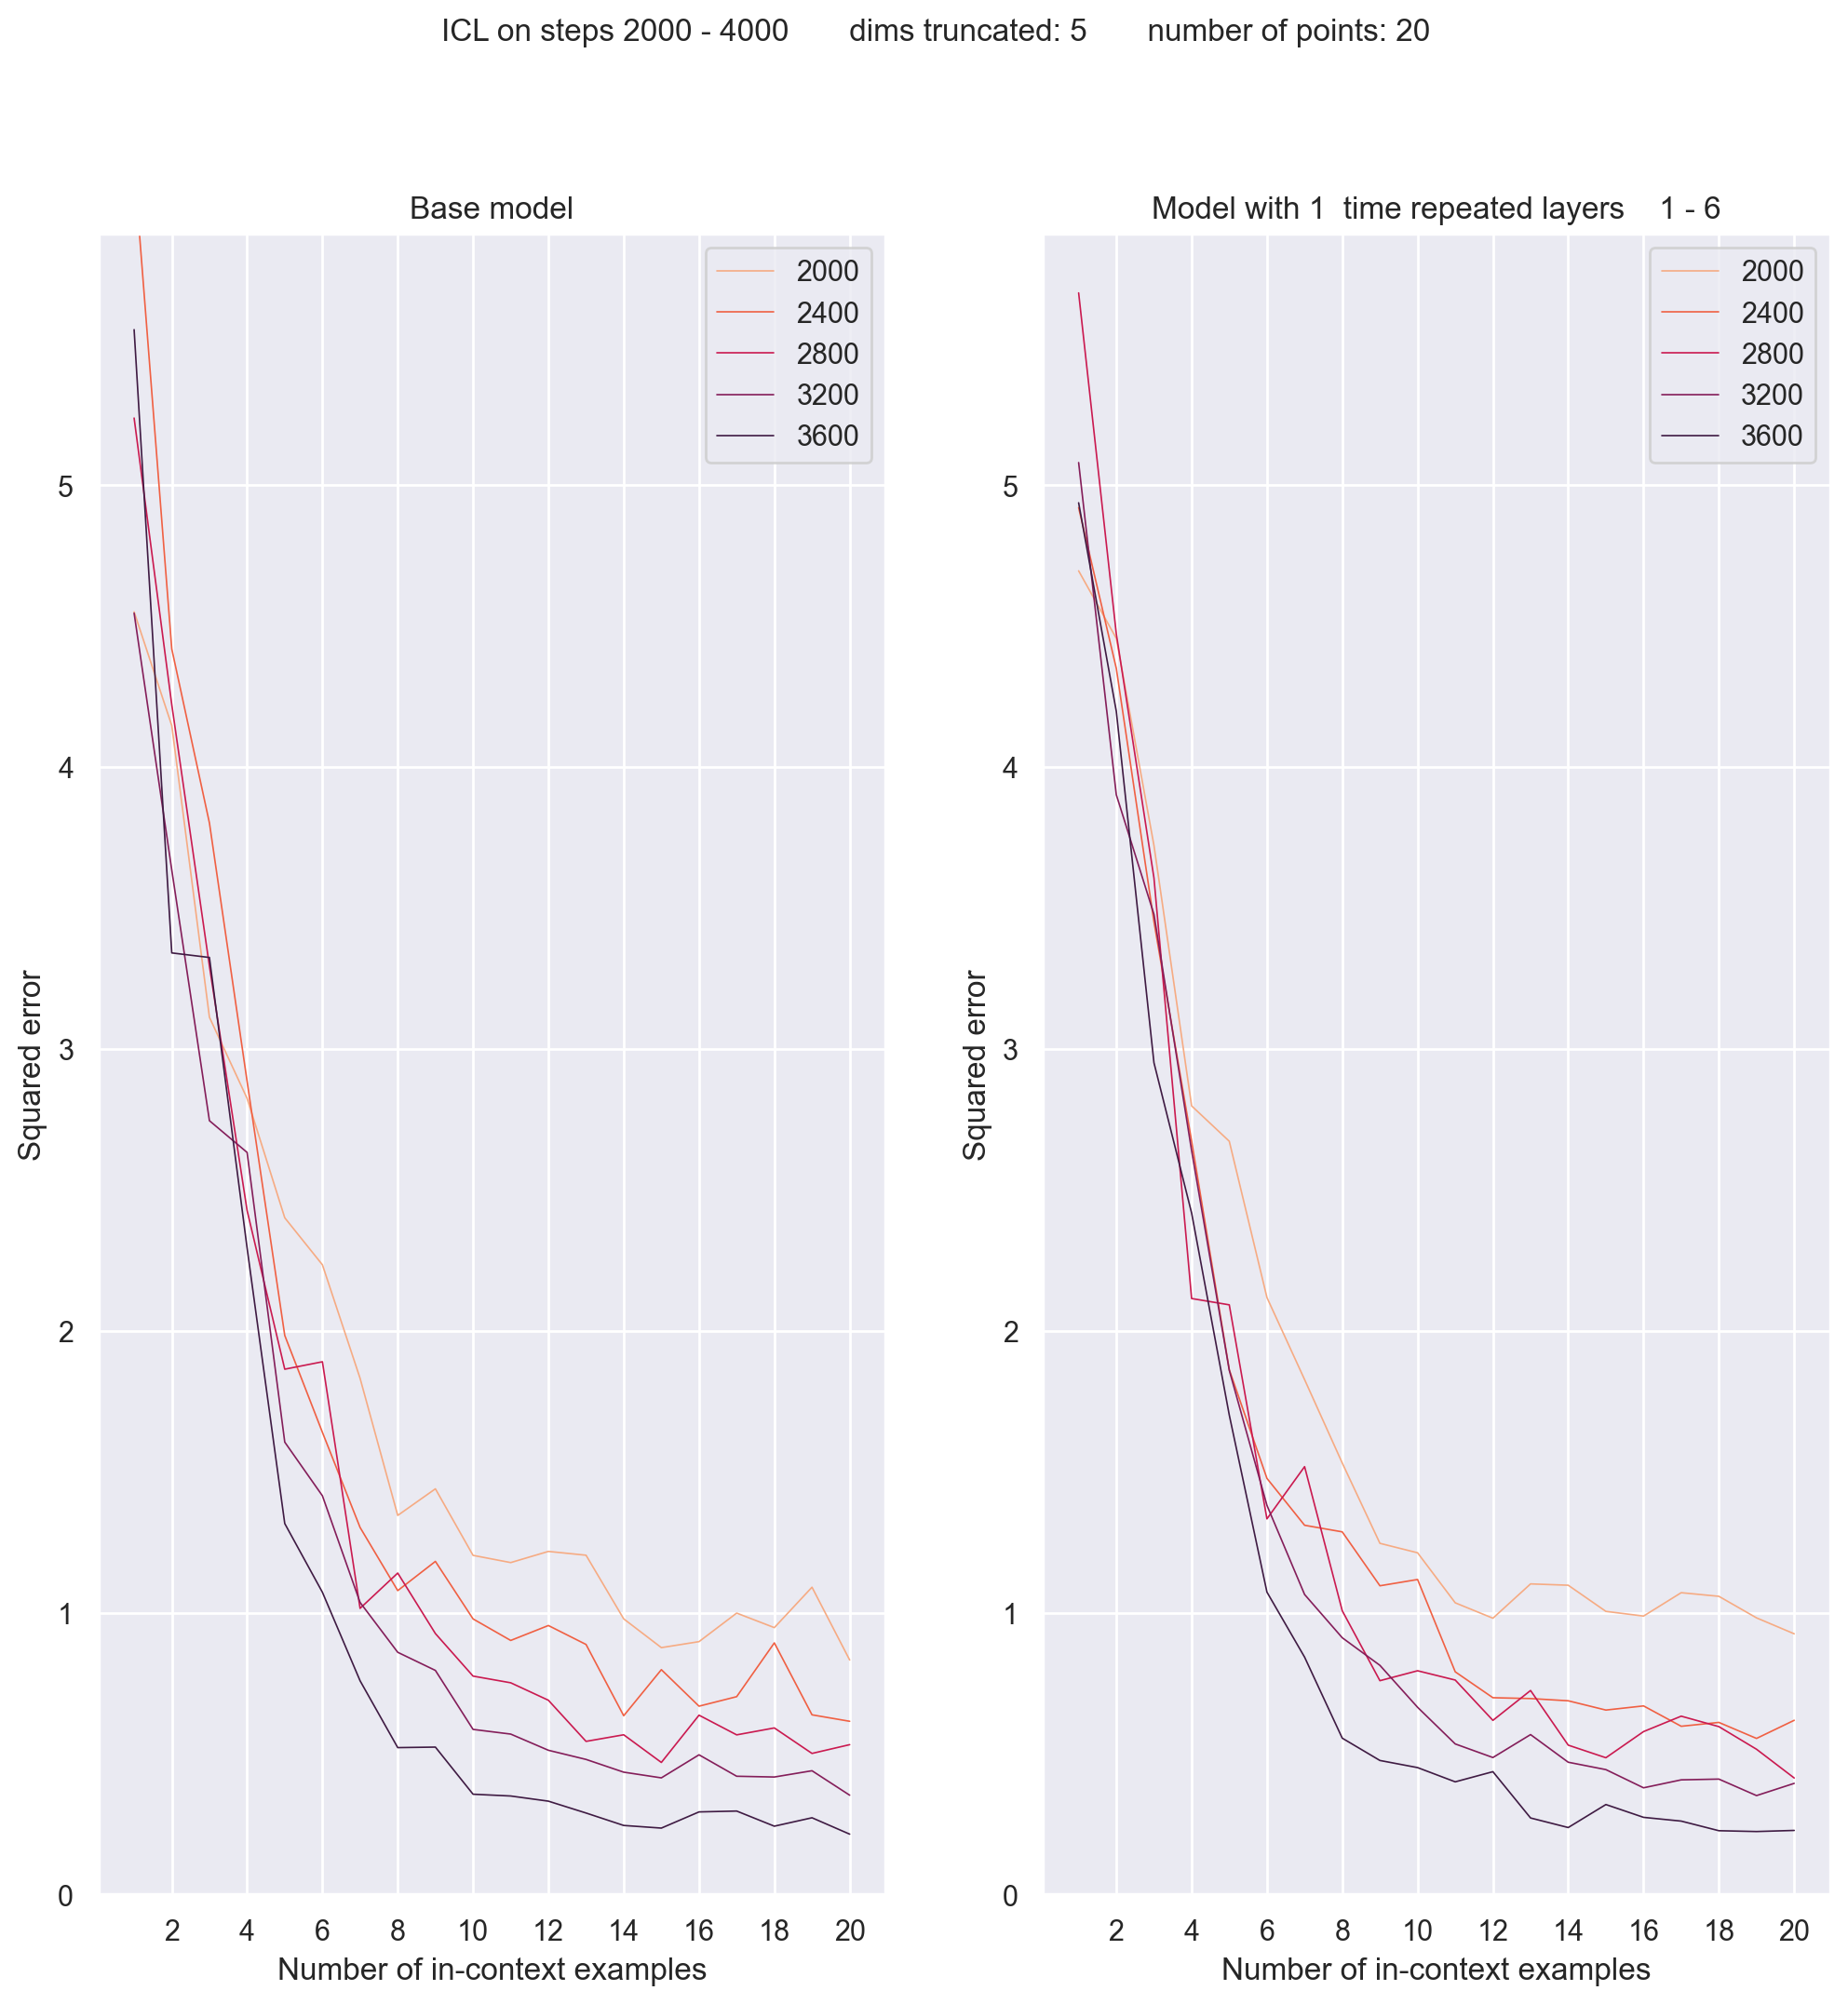

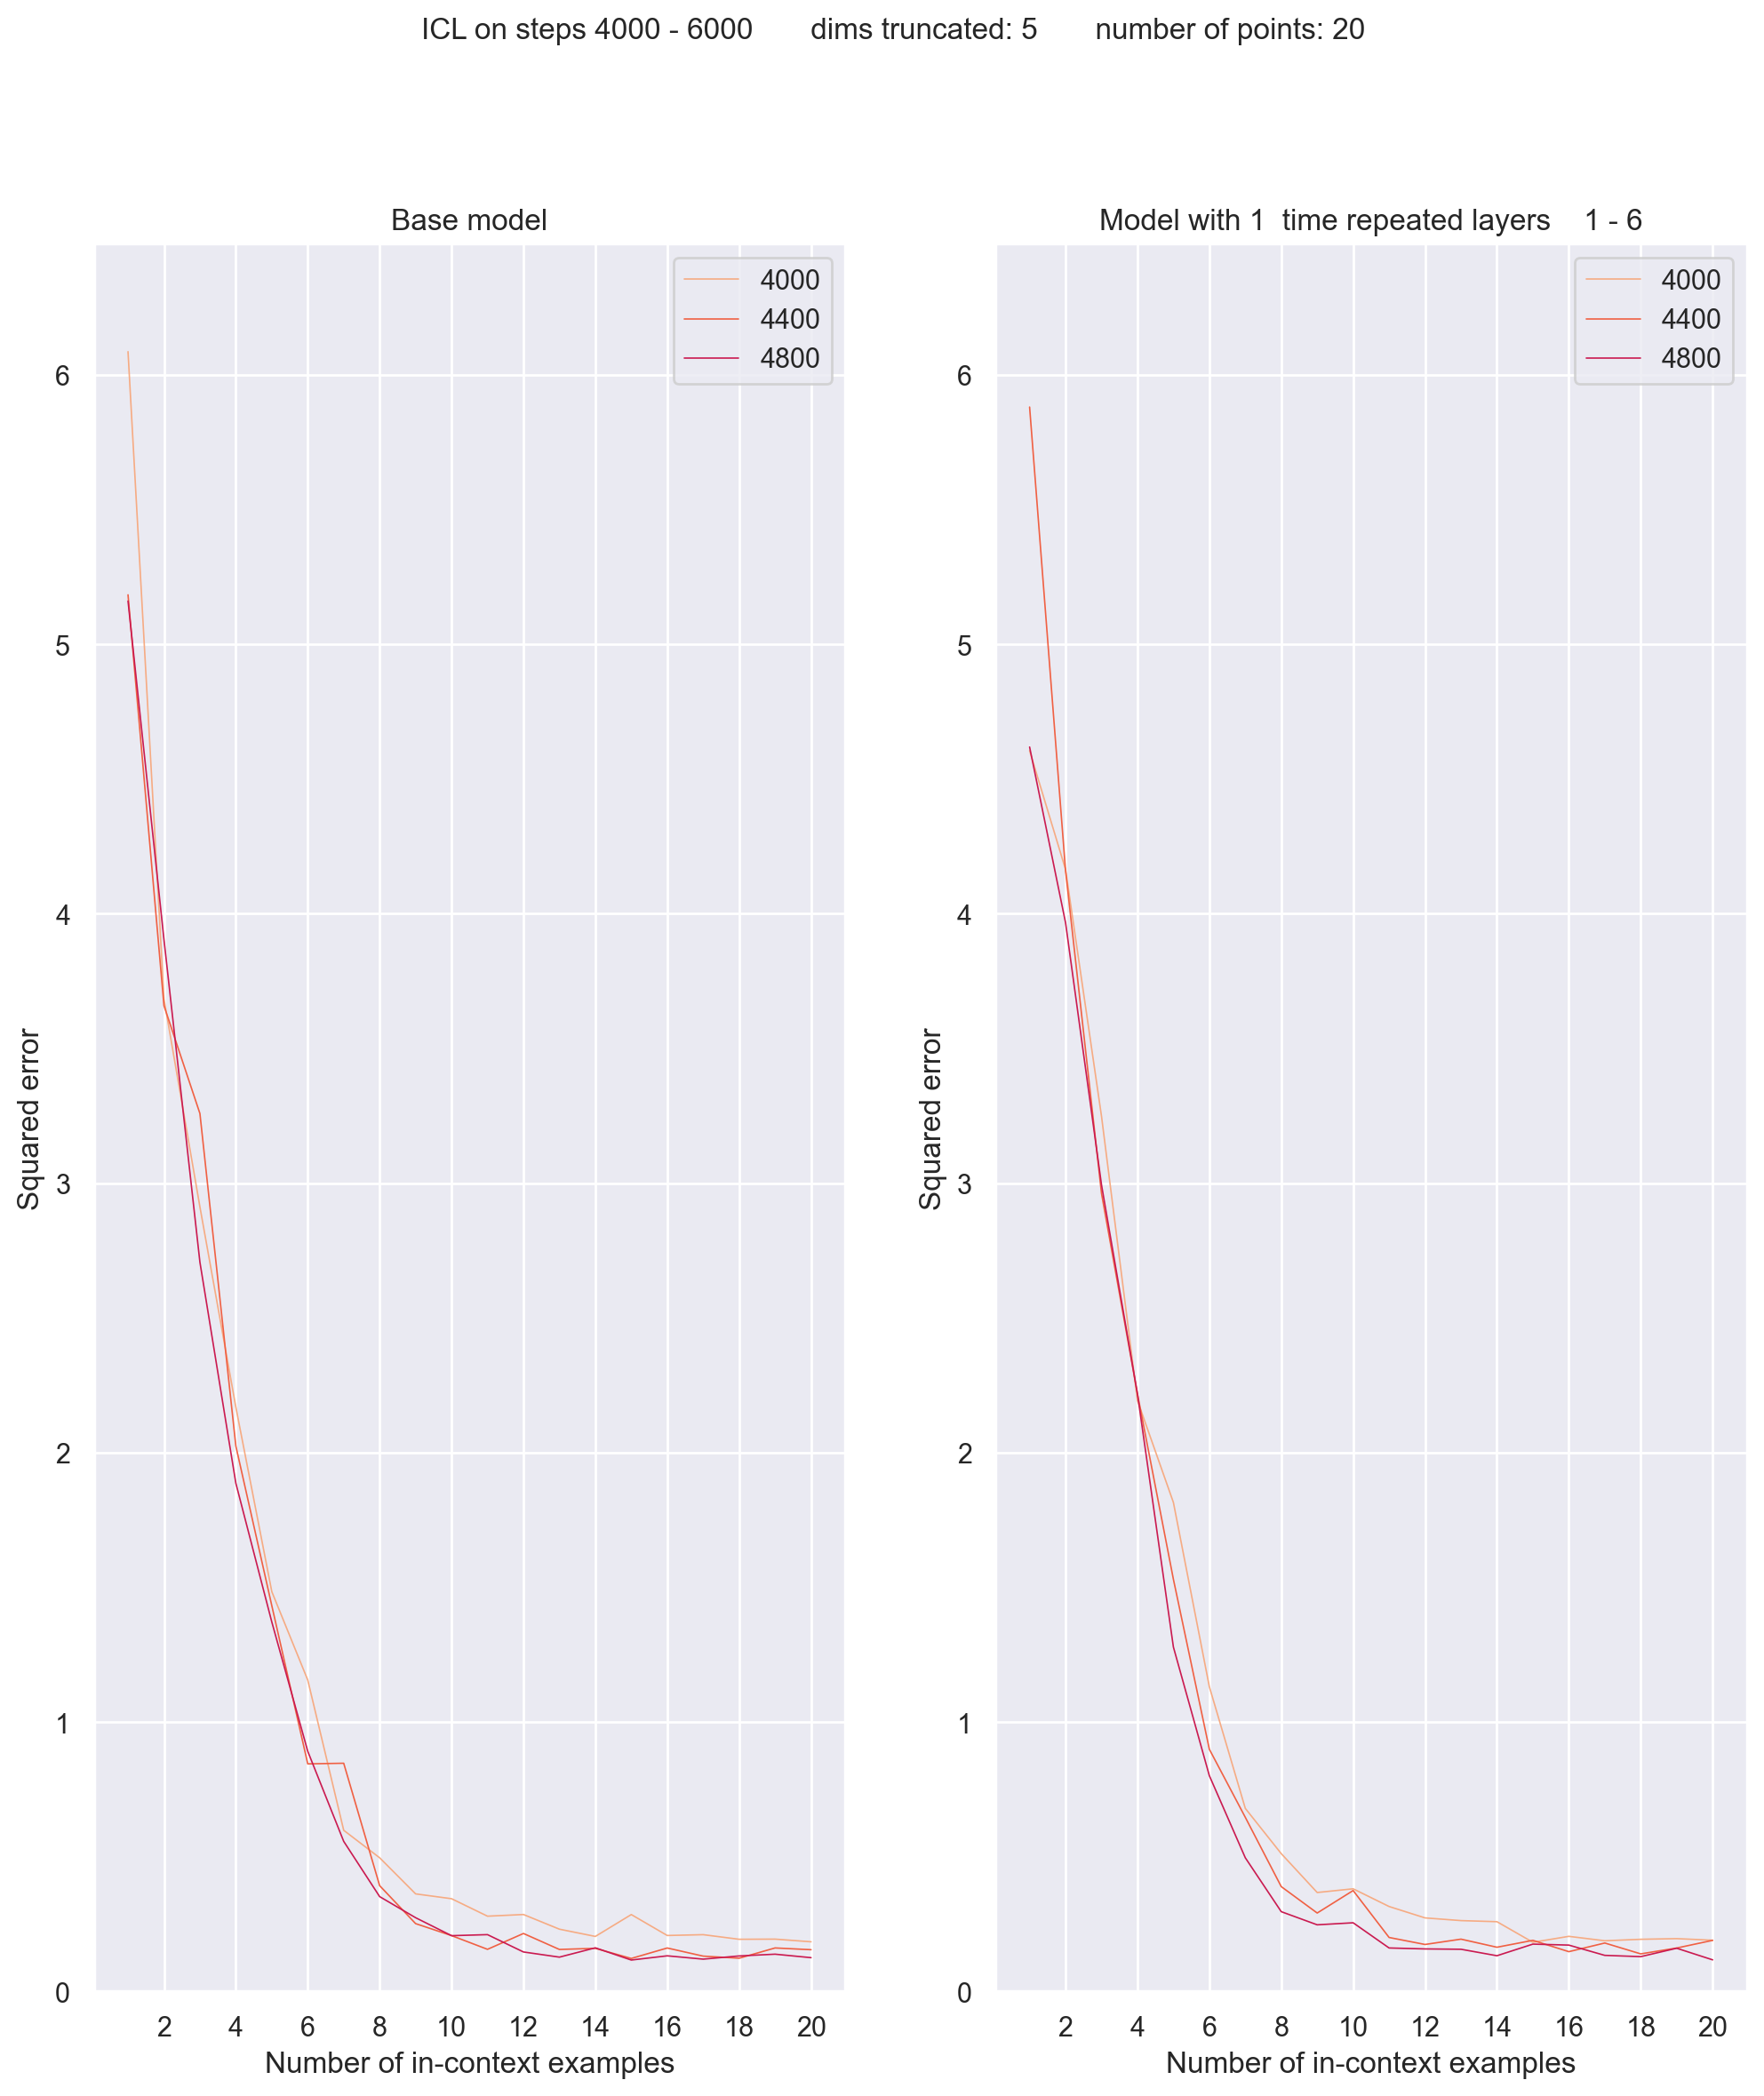

In [2]:
clean_dirs_by_name(conf.out_dir, 'baseline')   
#используйте, чтобы чистить директории
exp1 = Experiment(conf, short_name = 'baseline')
exp1.run_experiment()


Видно, что трансформер учится.
Попробуем мешать слои каждые 10 итераций
Это покажет, что регрессию трансформер может решать с любым порядком слоев.
Нет 'кодирующих' и 'декодирующих' слоев как в модели статьи.

Running experiment with params:
    log_model_weights: True
    transform_conf:
        switch_params: None
        duplicate_params: [1, 6, 1]
        full_backbone_copy: False
        no_layernorm_full_backbone_copy: False
        first_n_layers: None
        new_backbone_training: False
        readout2_training: False
        model_variants: ['modified', 'full_backbone + no_final_layer_norm']
        transform_variants: ['duplicate_layers', 'switch_layers']
        transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x00000241B944D0D0>
    auto_transform_conf:
        permute_bounds_params: [1, 6]
        permute_interval: 10
        permute_model: True
        auto_transform_variants: ['auto_permute_layers', 'auto_custom_permute']
        use_custom_permute: False
        auto_transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x00000241B9534F70>
    short_description: permute_baseline


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


17.682946 M parameters


wandb: Currently logged in as: enemo_ce-warch (use `wandb login --relogin` to force relogin)


''

step 0: train loss 5.1564, train loss 2 5.1564


wandb: WARNING Step must only increase in log calls.  Step 0 < 201; dropping {'loss1': tensor(5.1564), 'loss2': tensor(5.1564)}.


step 200: train loss 4.9536, train loss 2 4.9536


wandb: WARNING Step must only increase in log calls.  Step 200 < 201; dropping {'loss1': tensor(4.9536), 'loss2': tensor(4.9536)}.


step 400: train loss 5.1288, train loss 2 5.1288


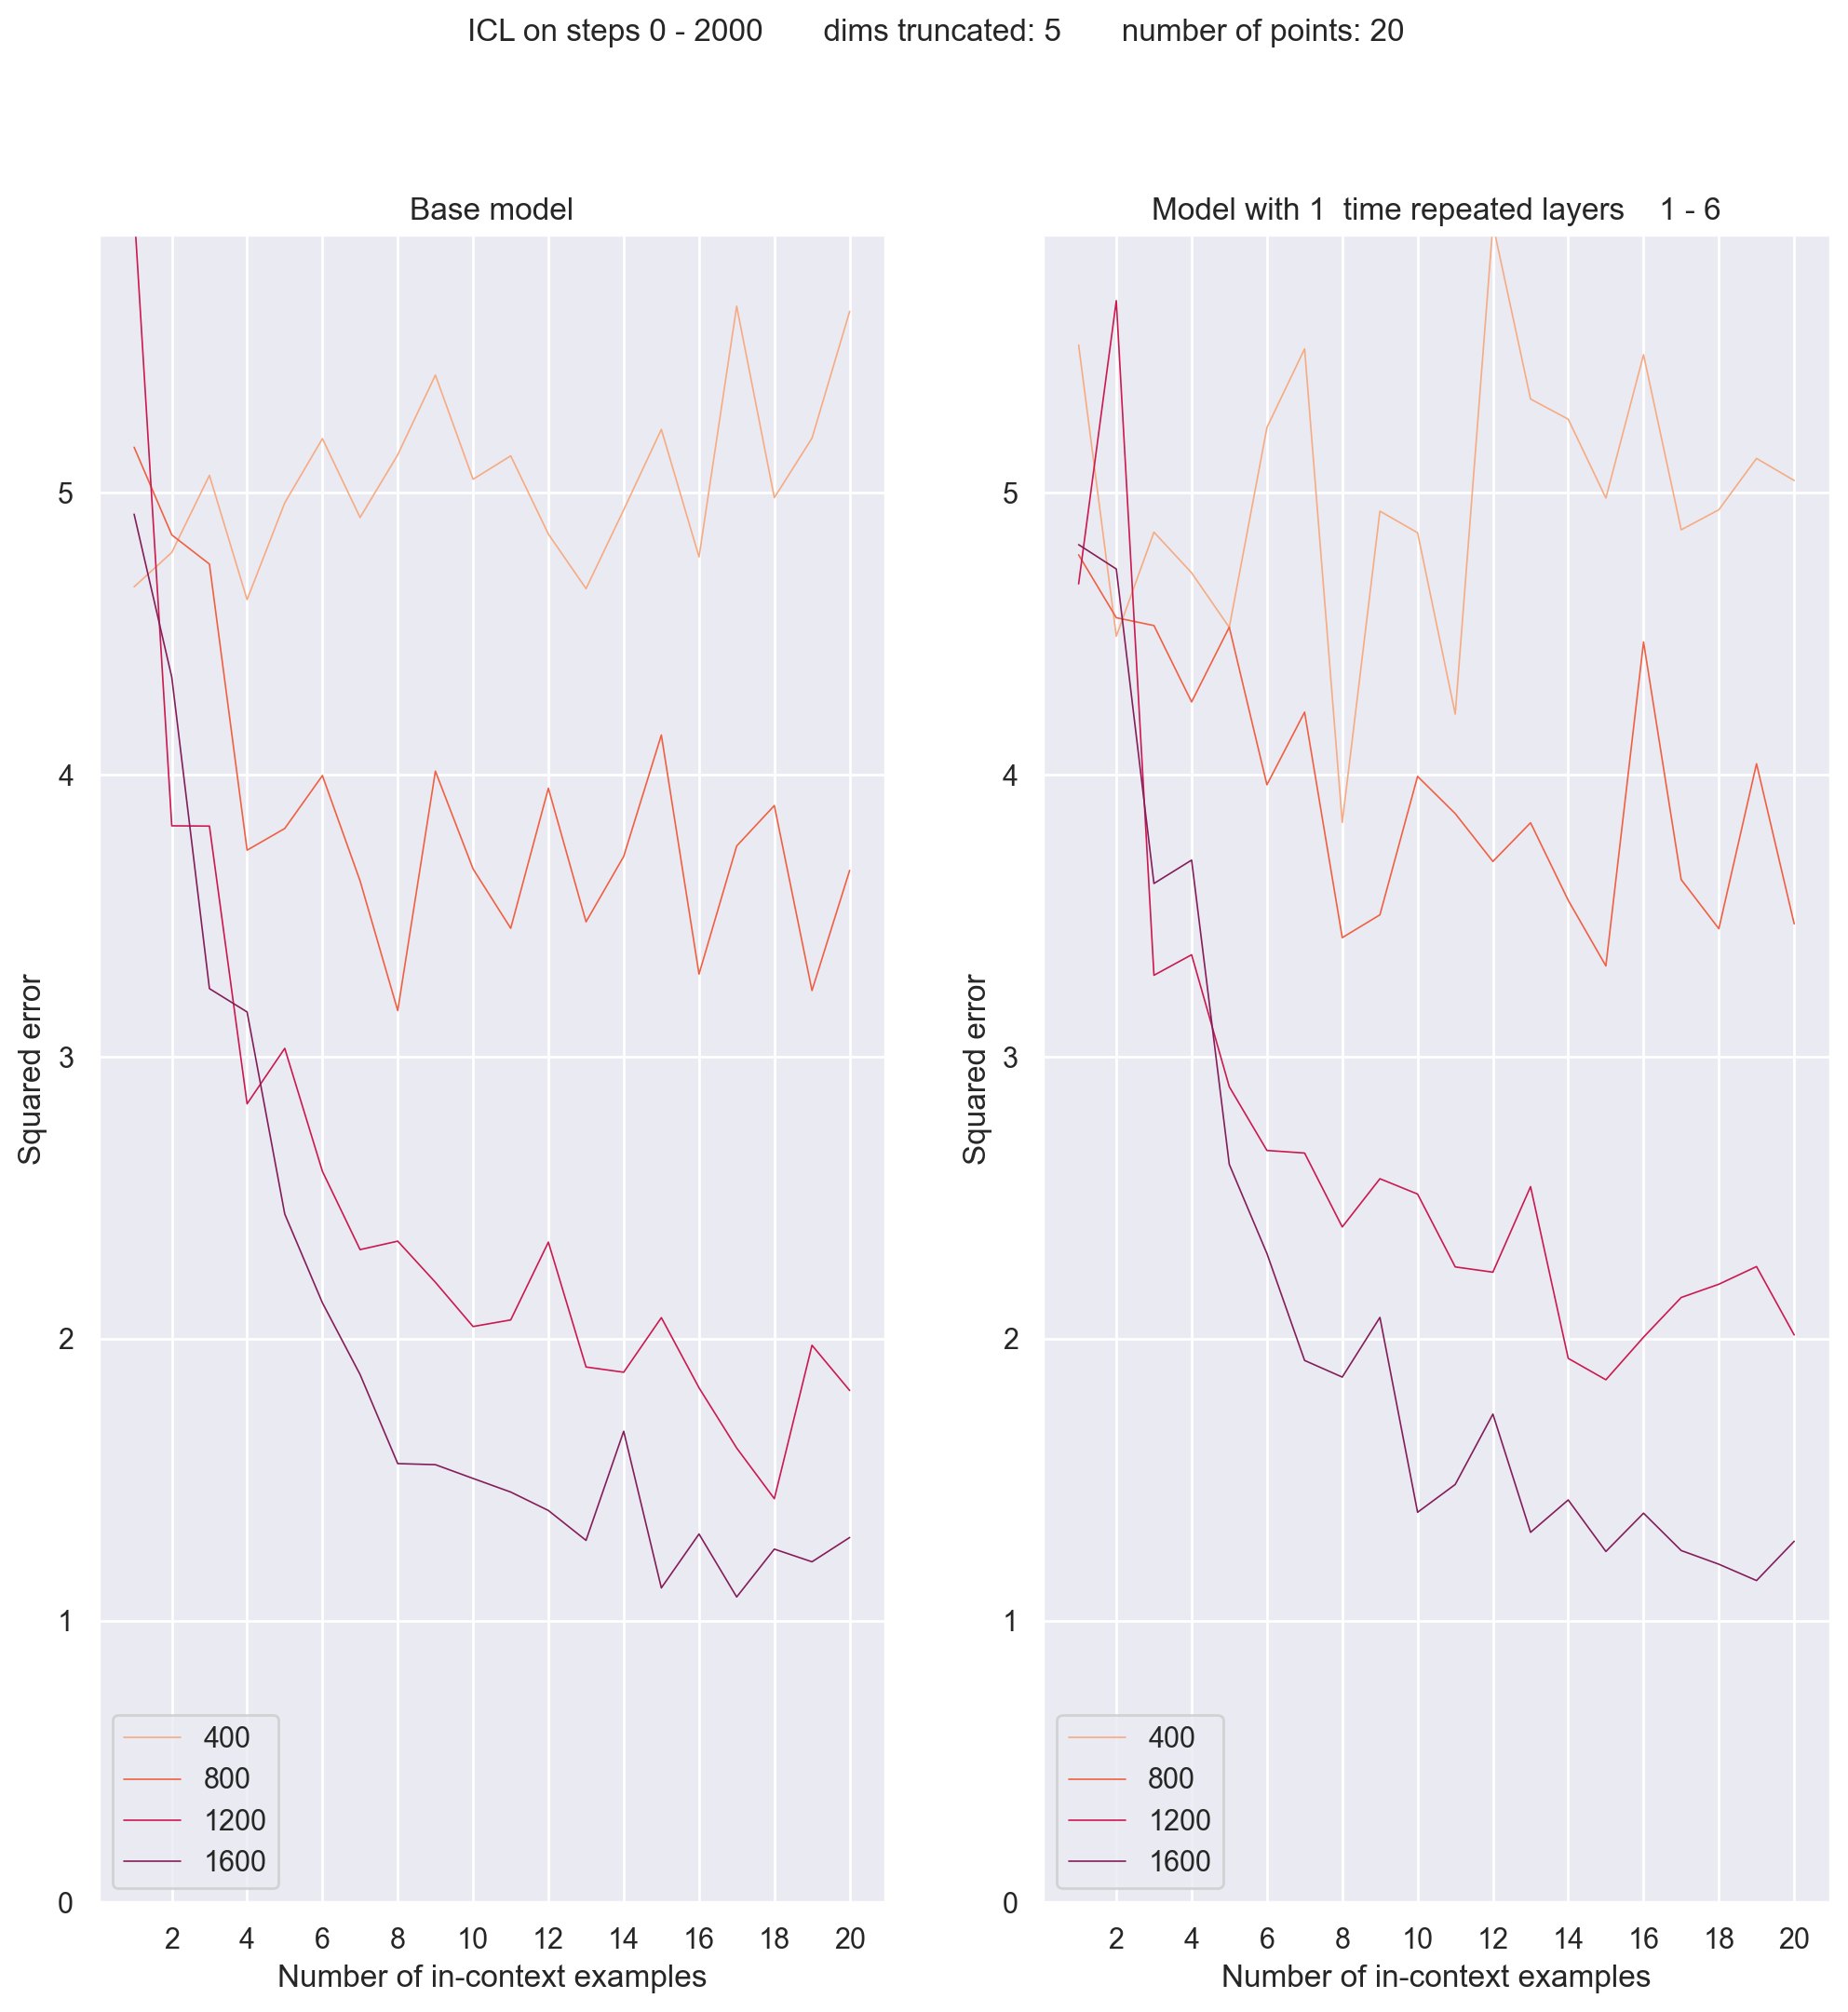

step 600: train loss 4.8461, train loss 2 4.8461
step 800: train loss 3.8710, train loss 2 3.8710
step 1000: train loss 2.9011, train loss 2 2.9011
step 1200: train loss 2.5828, train loss 2 2.5828
step 1400: train loss 2.3843, train loss 2 2.3843
step 1600: train loss 2.0756, train loss 2 2.0756
step 1800: train loss 1.8137, train loss 2 1.8137
step 2000: train loss 1.5546, train loss 2 1.5546


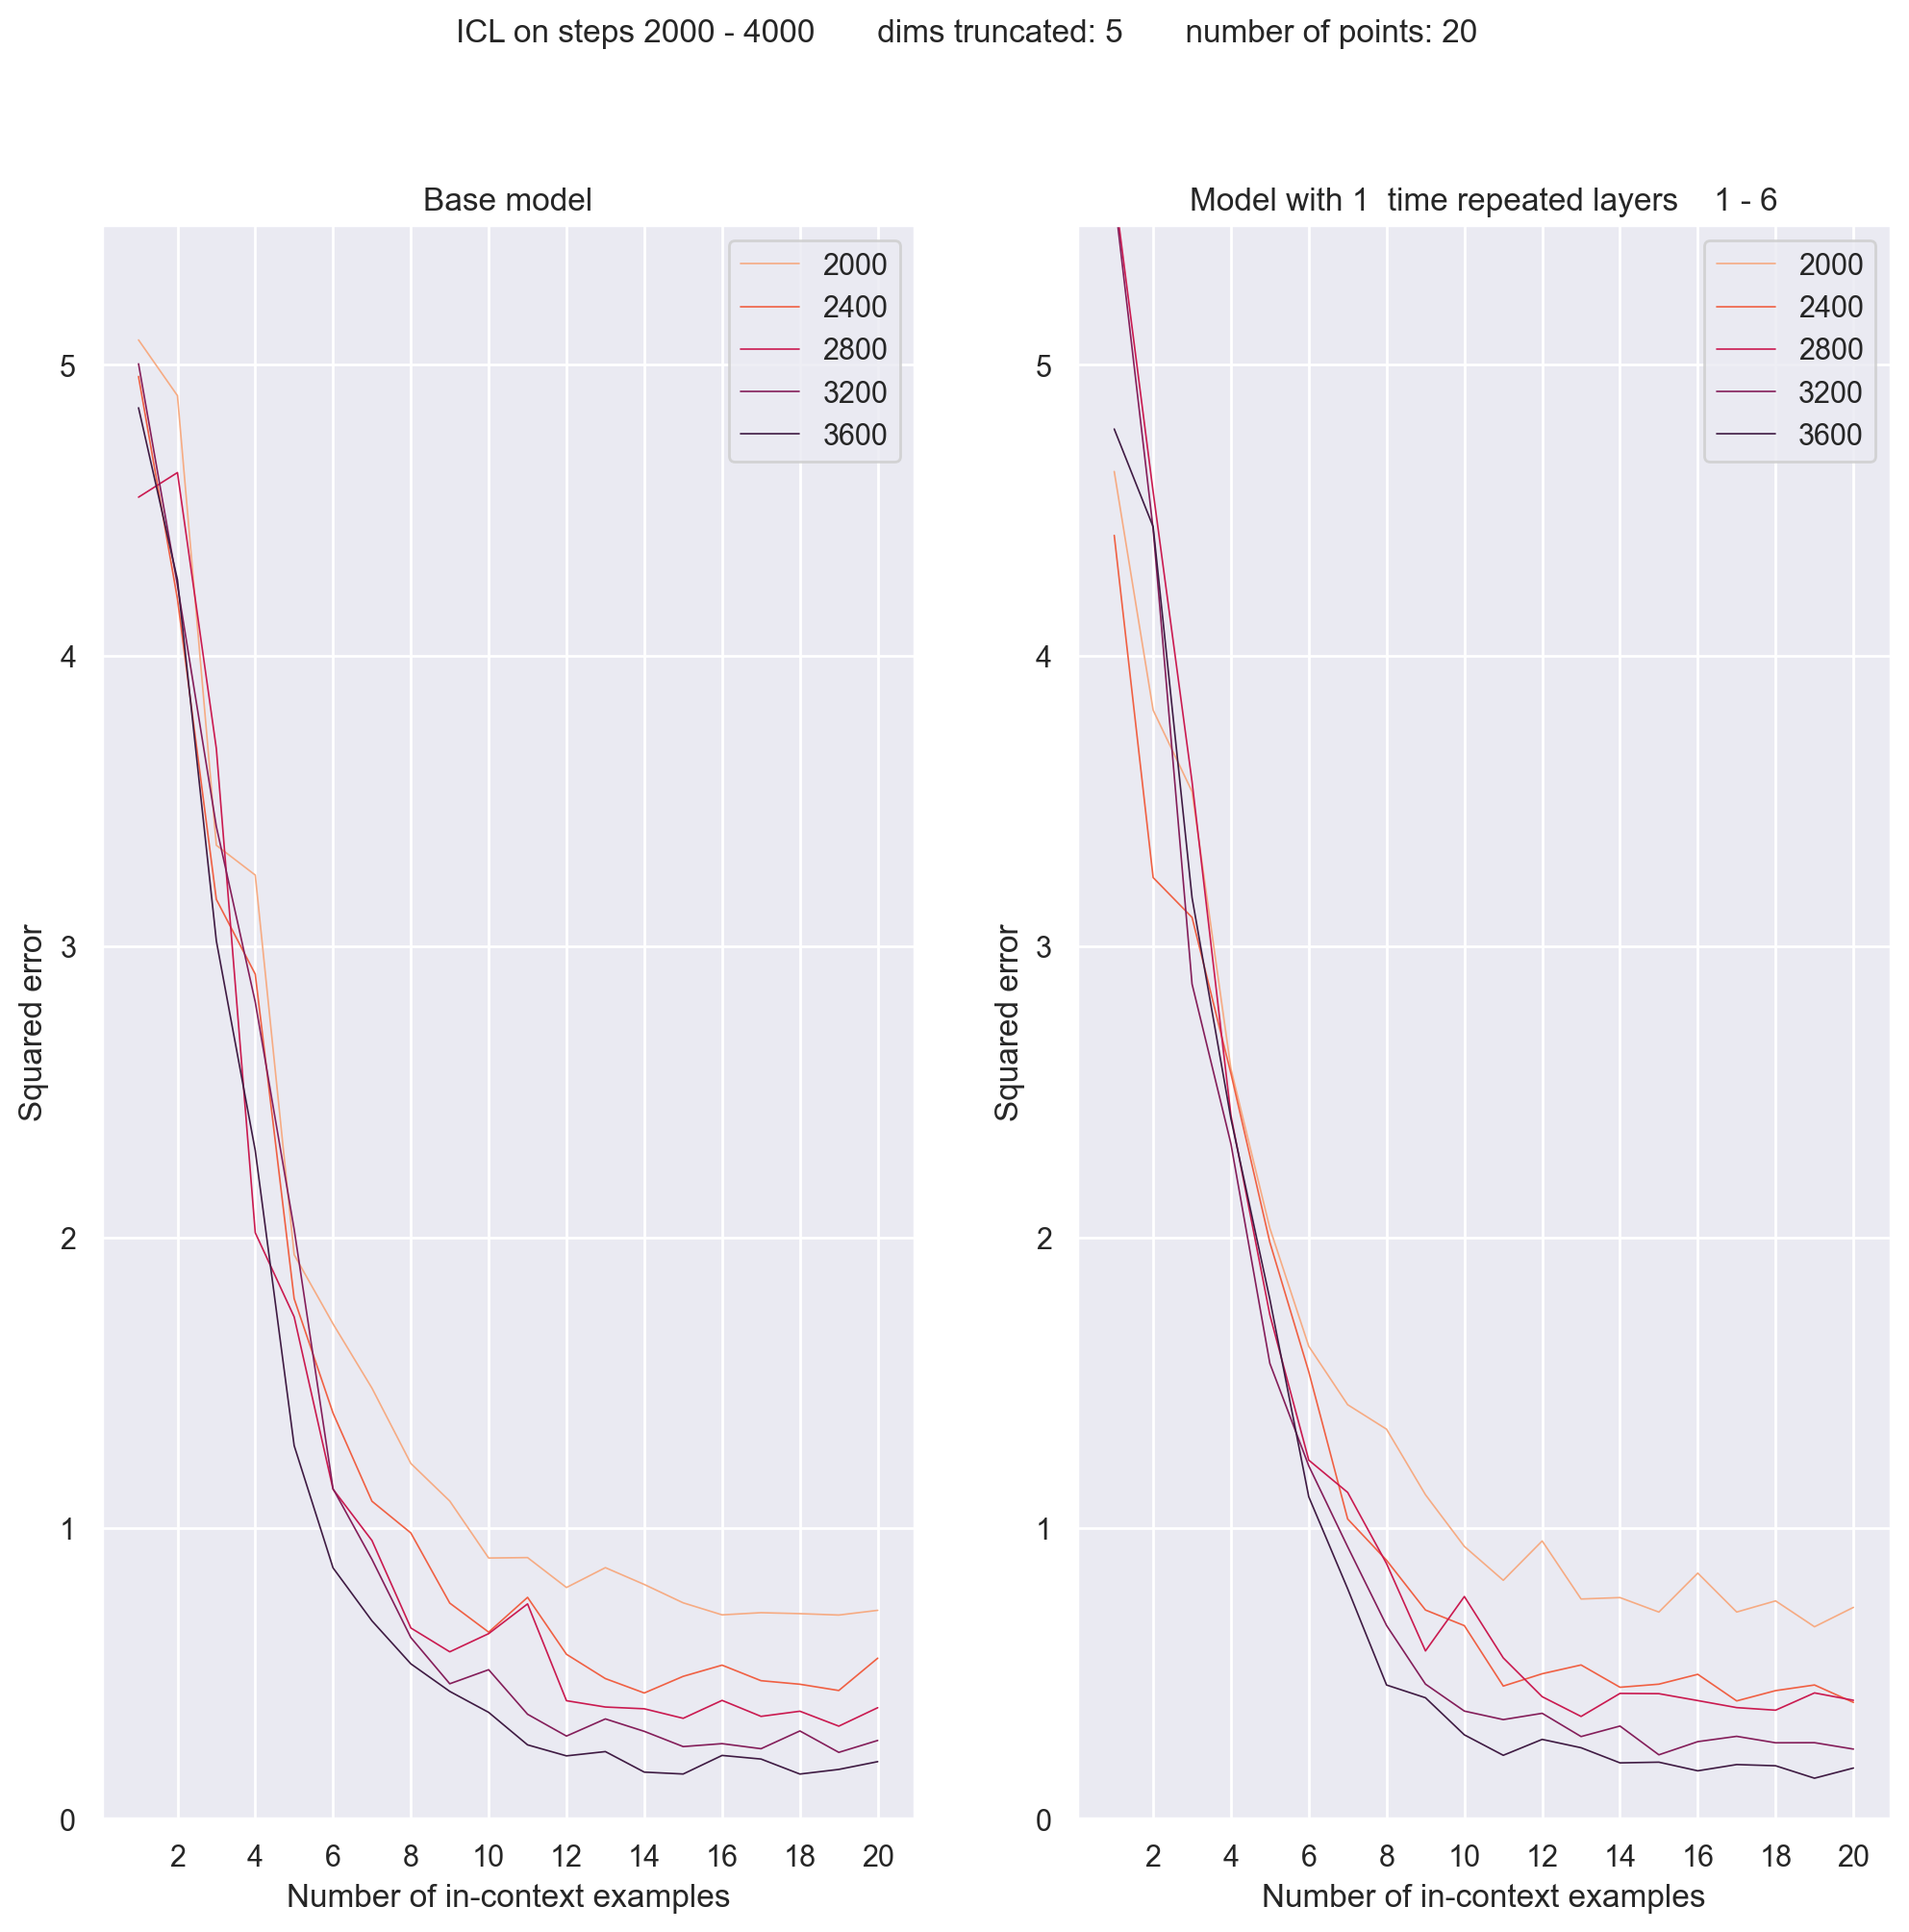

step 2200: train loss 1.4205, train loss 2 1.4205
step 2400: train loss 1.3485, train loss 2 1.3485
step 2600: train loss 1.3177, train loss 2 1.3177
step 2800: train loss 1.1958, train loss 2 1.1958
step 3000: train loss 1.1622, train loss 2 1.1622
step 3200: train loss 1.1601, train loss 2 1.1601
step 3400: train loss 1.1469, train loss 2 1.1469
step 3600: train loss 1.0463, train loss 2 1.0463
step 3800: train loss 1.0986, train loss 2 1.0986
step 4000: train loss 1.0333, train loss 2 1.0333


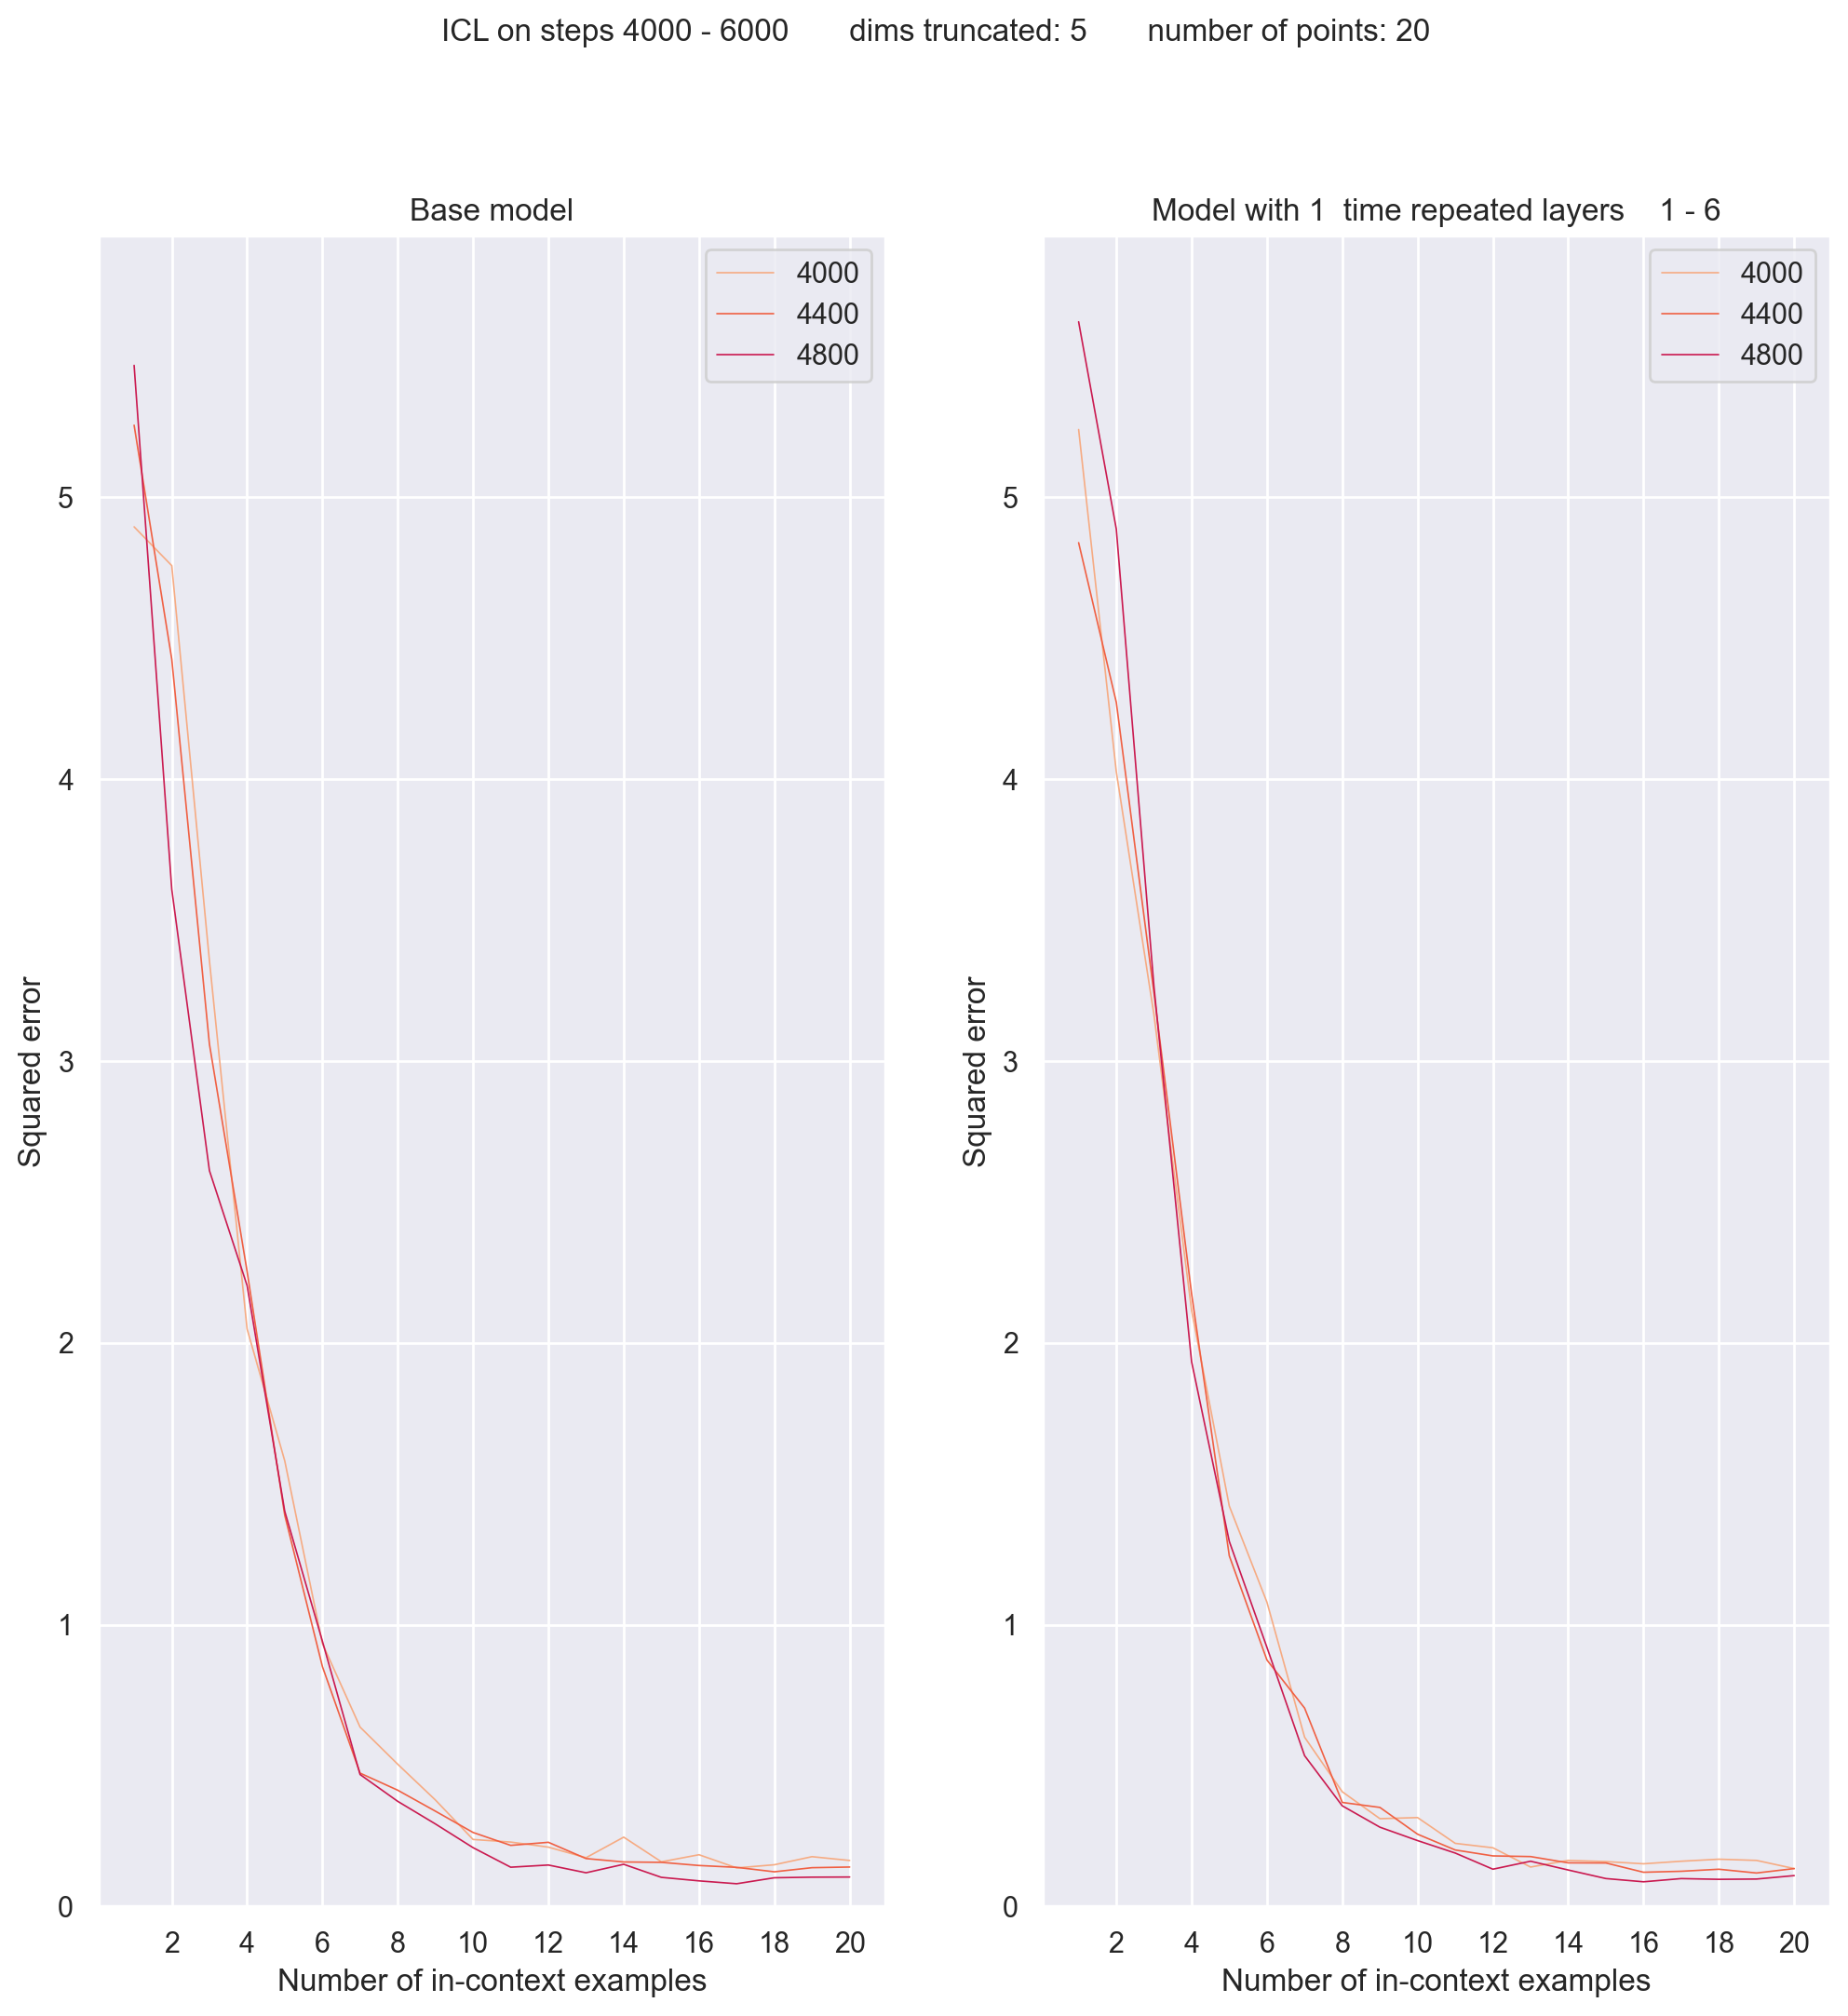

step 4200: train loss 1.0029, train loss 2 1.0029
step 4400: train loss 1.0151, train loss 2 1.0151
step 4600: train loss 1.0026, train loss 2 1.0026
step 4800: train loss 0.9499, train loss 2 0.9499
step 4999: train loss 0.9641, train loss 2 0.9641


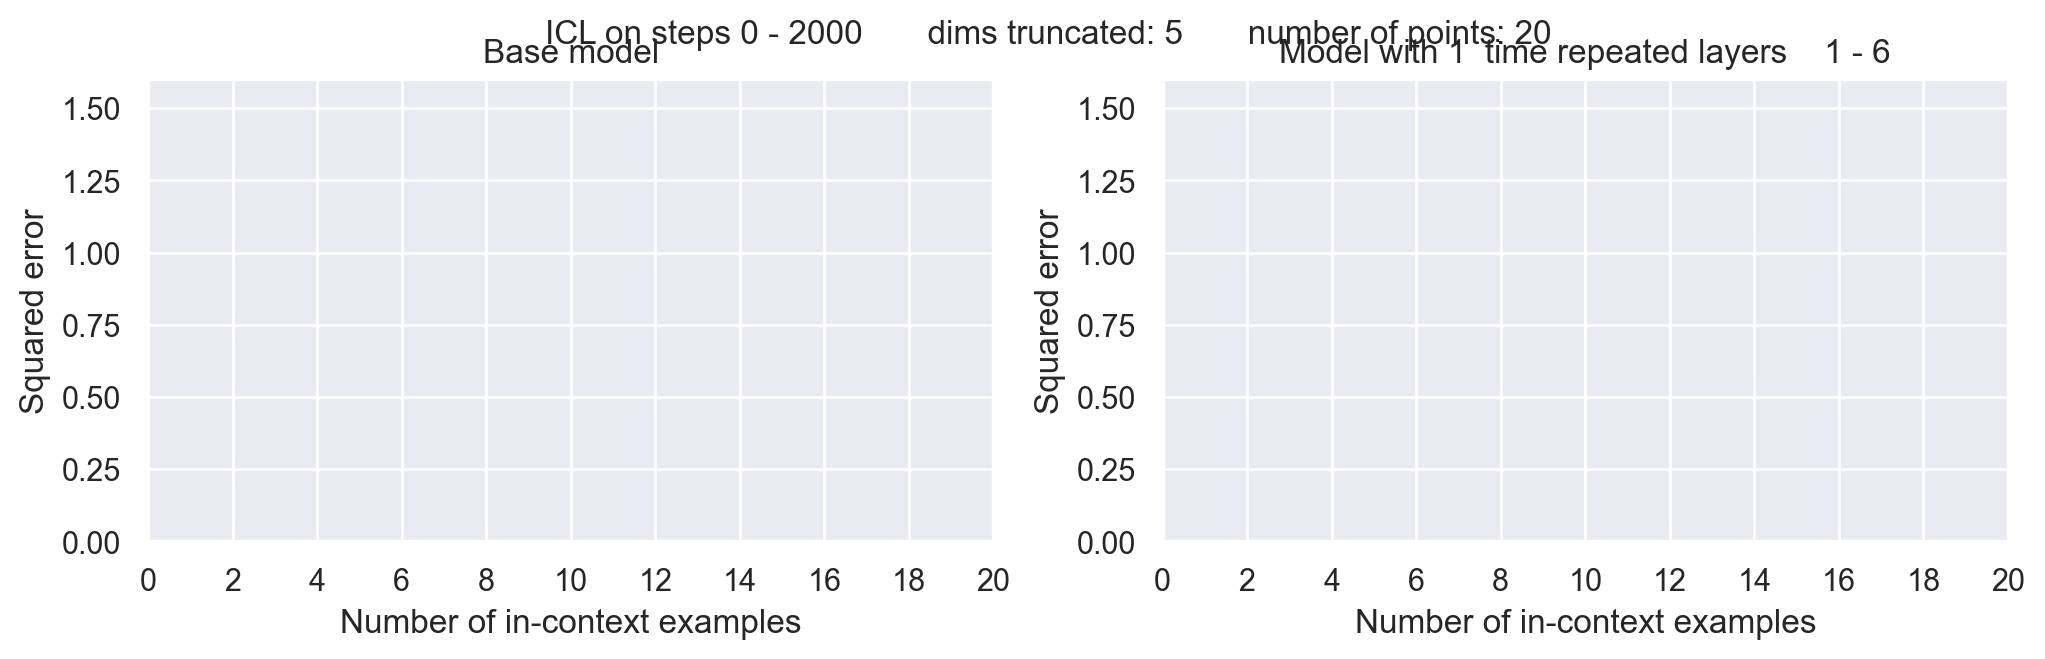

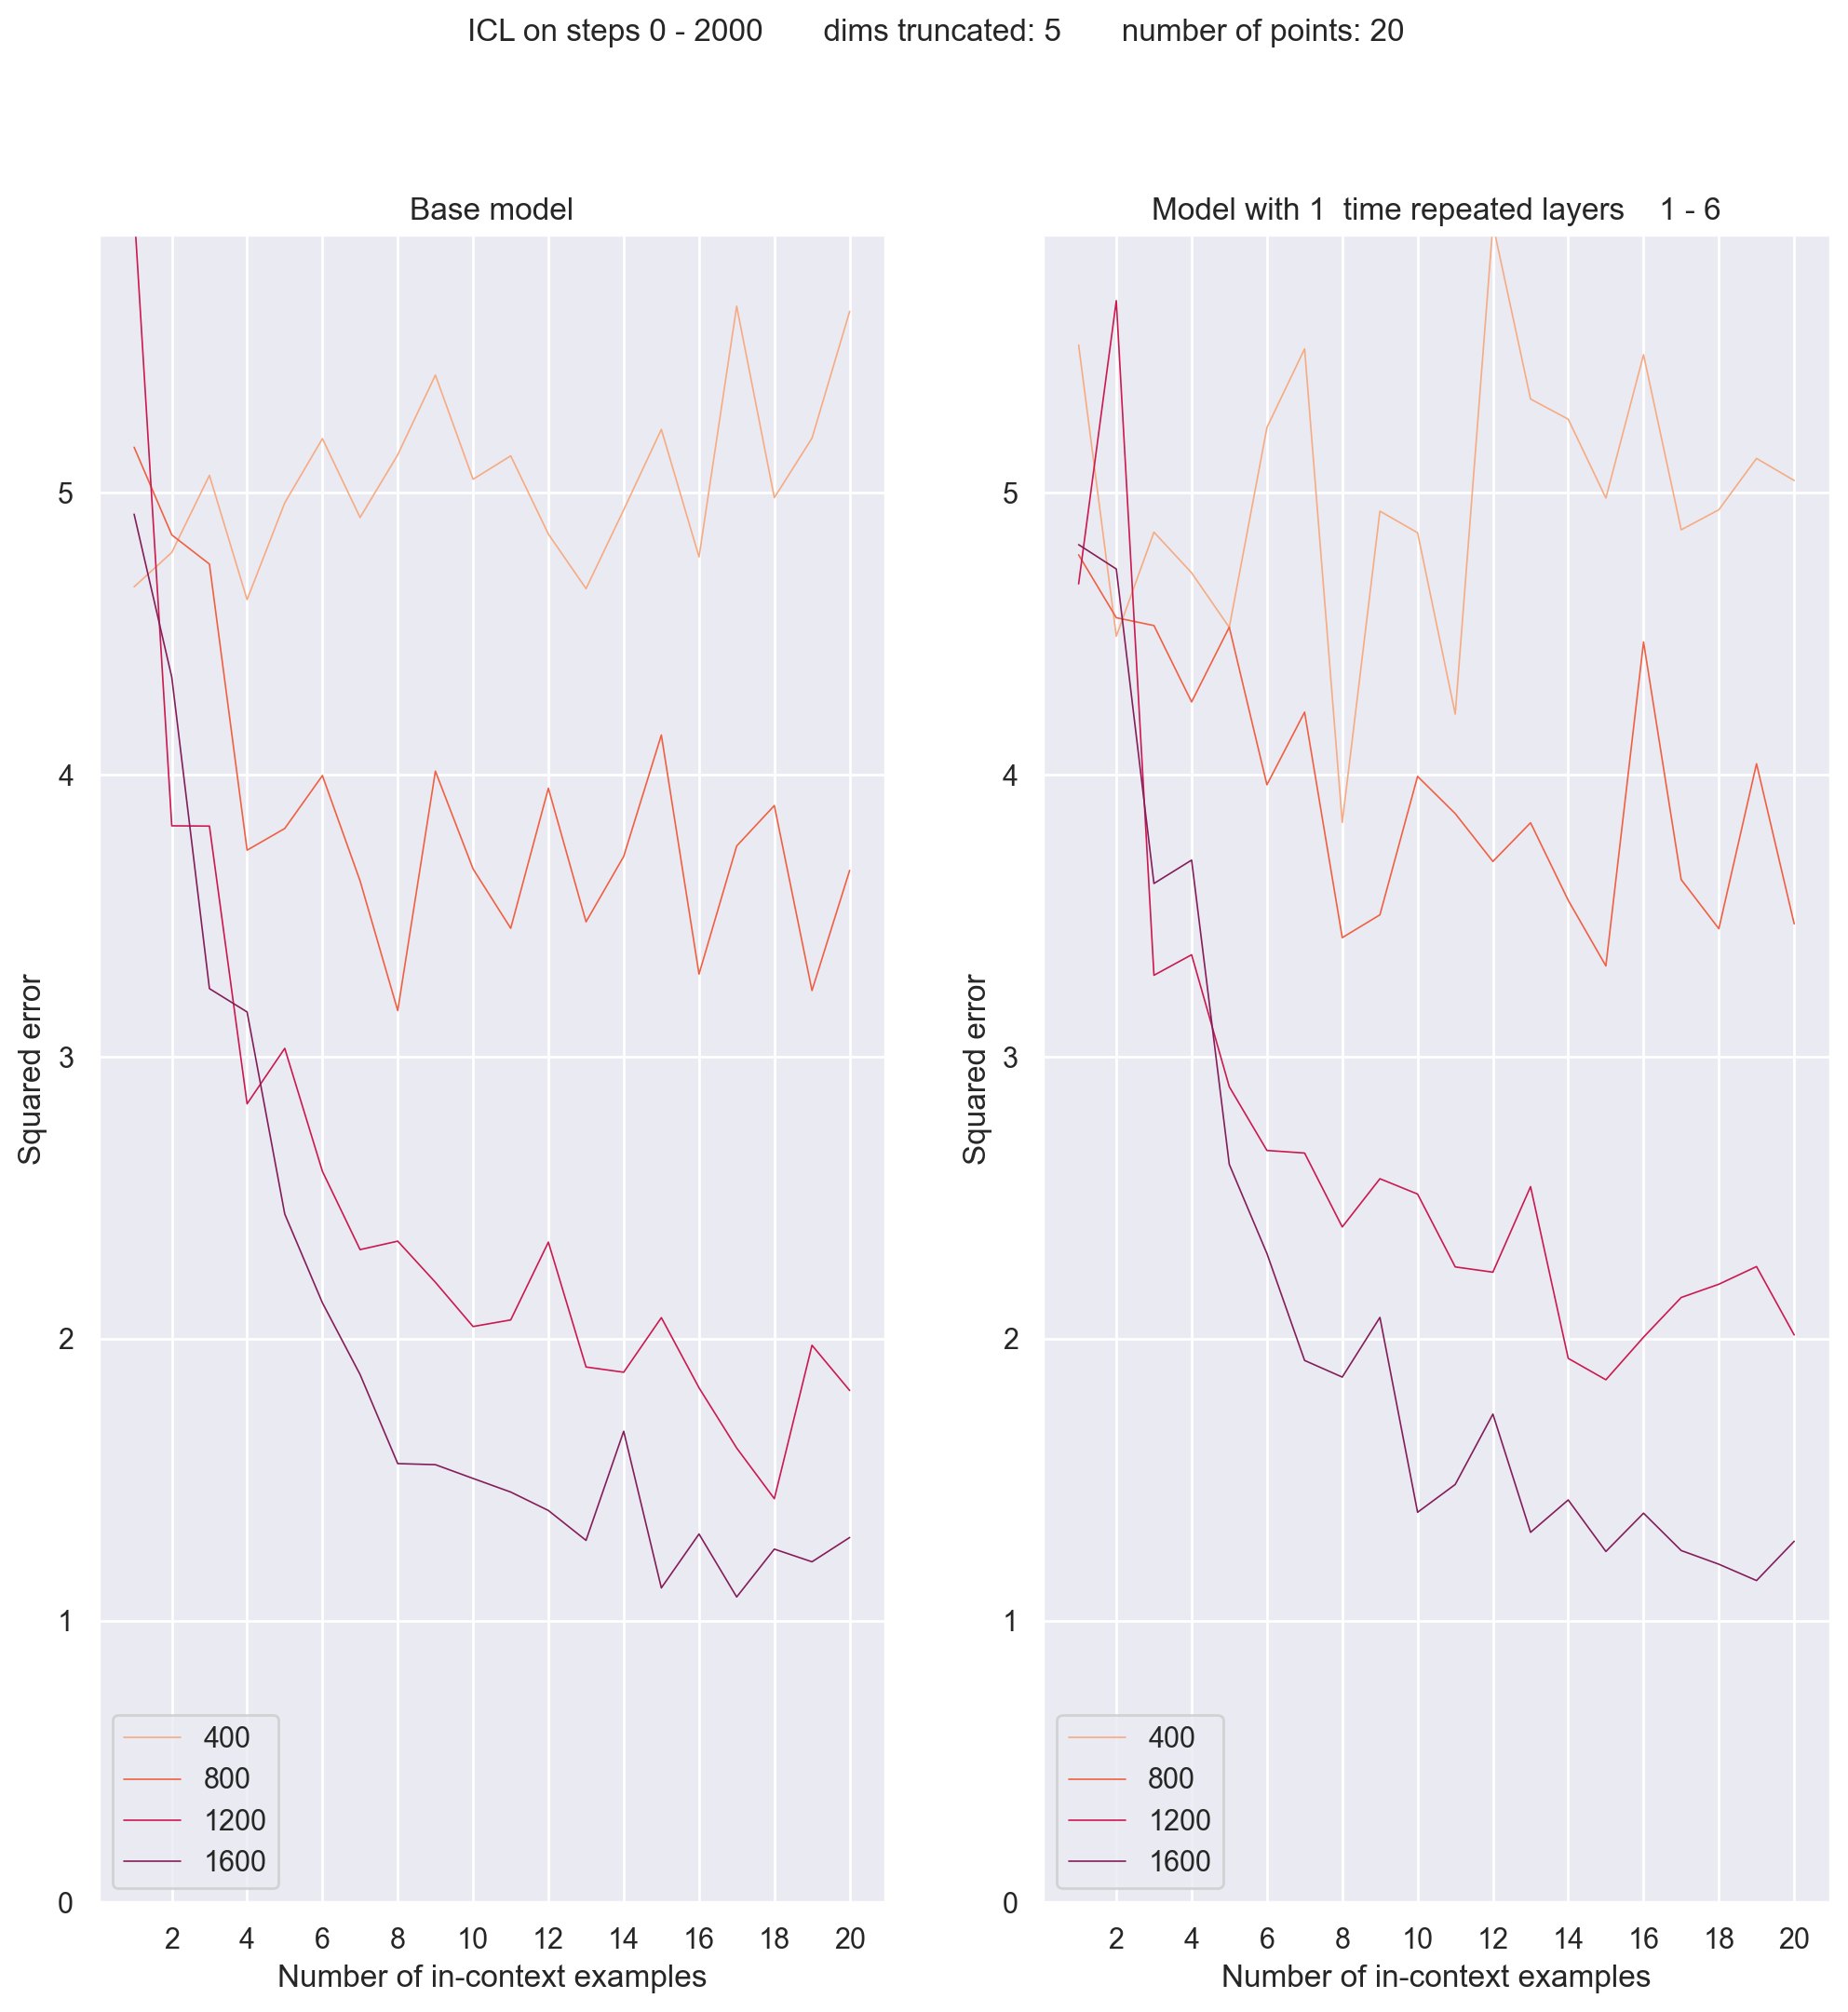

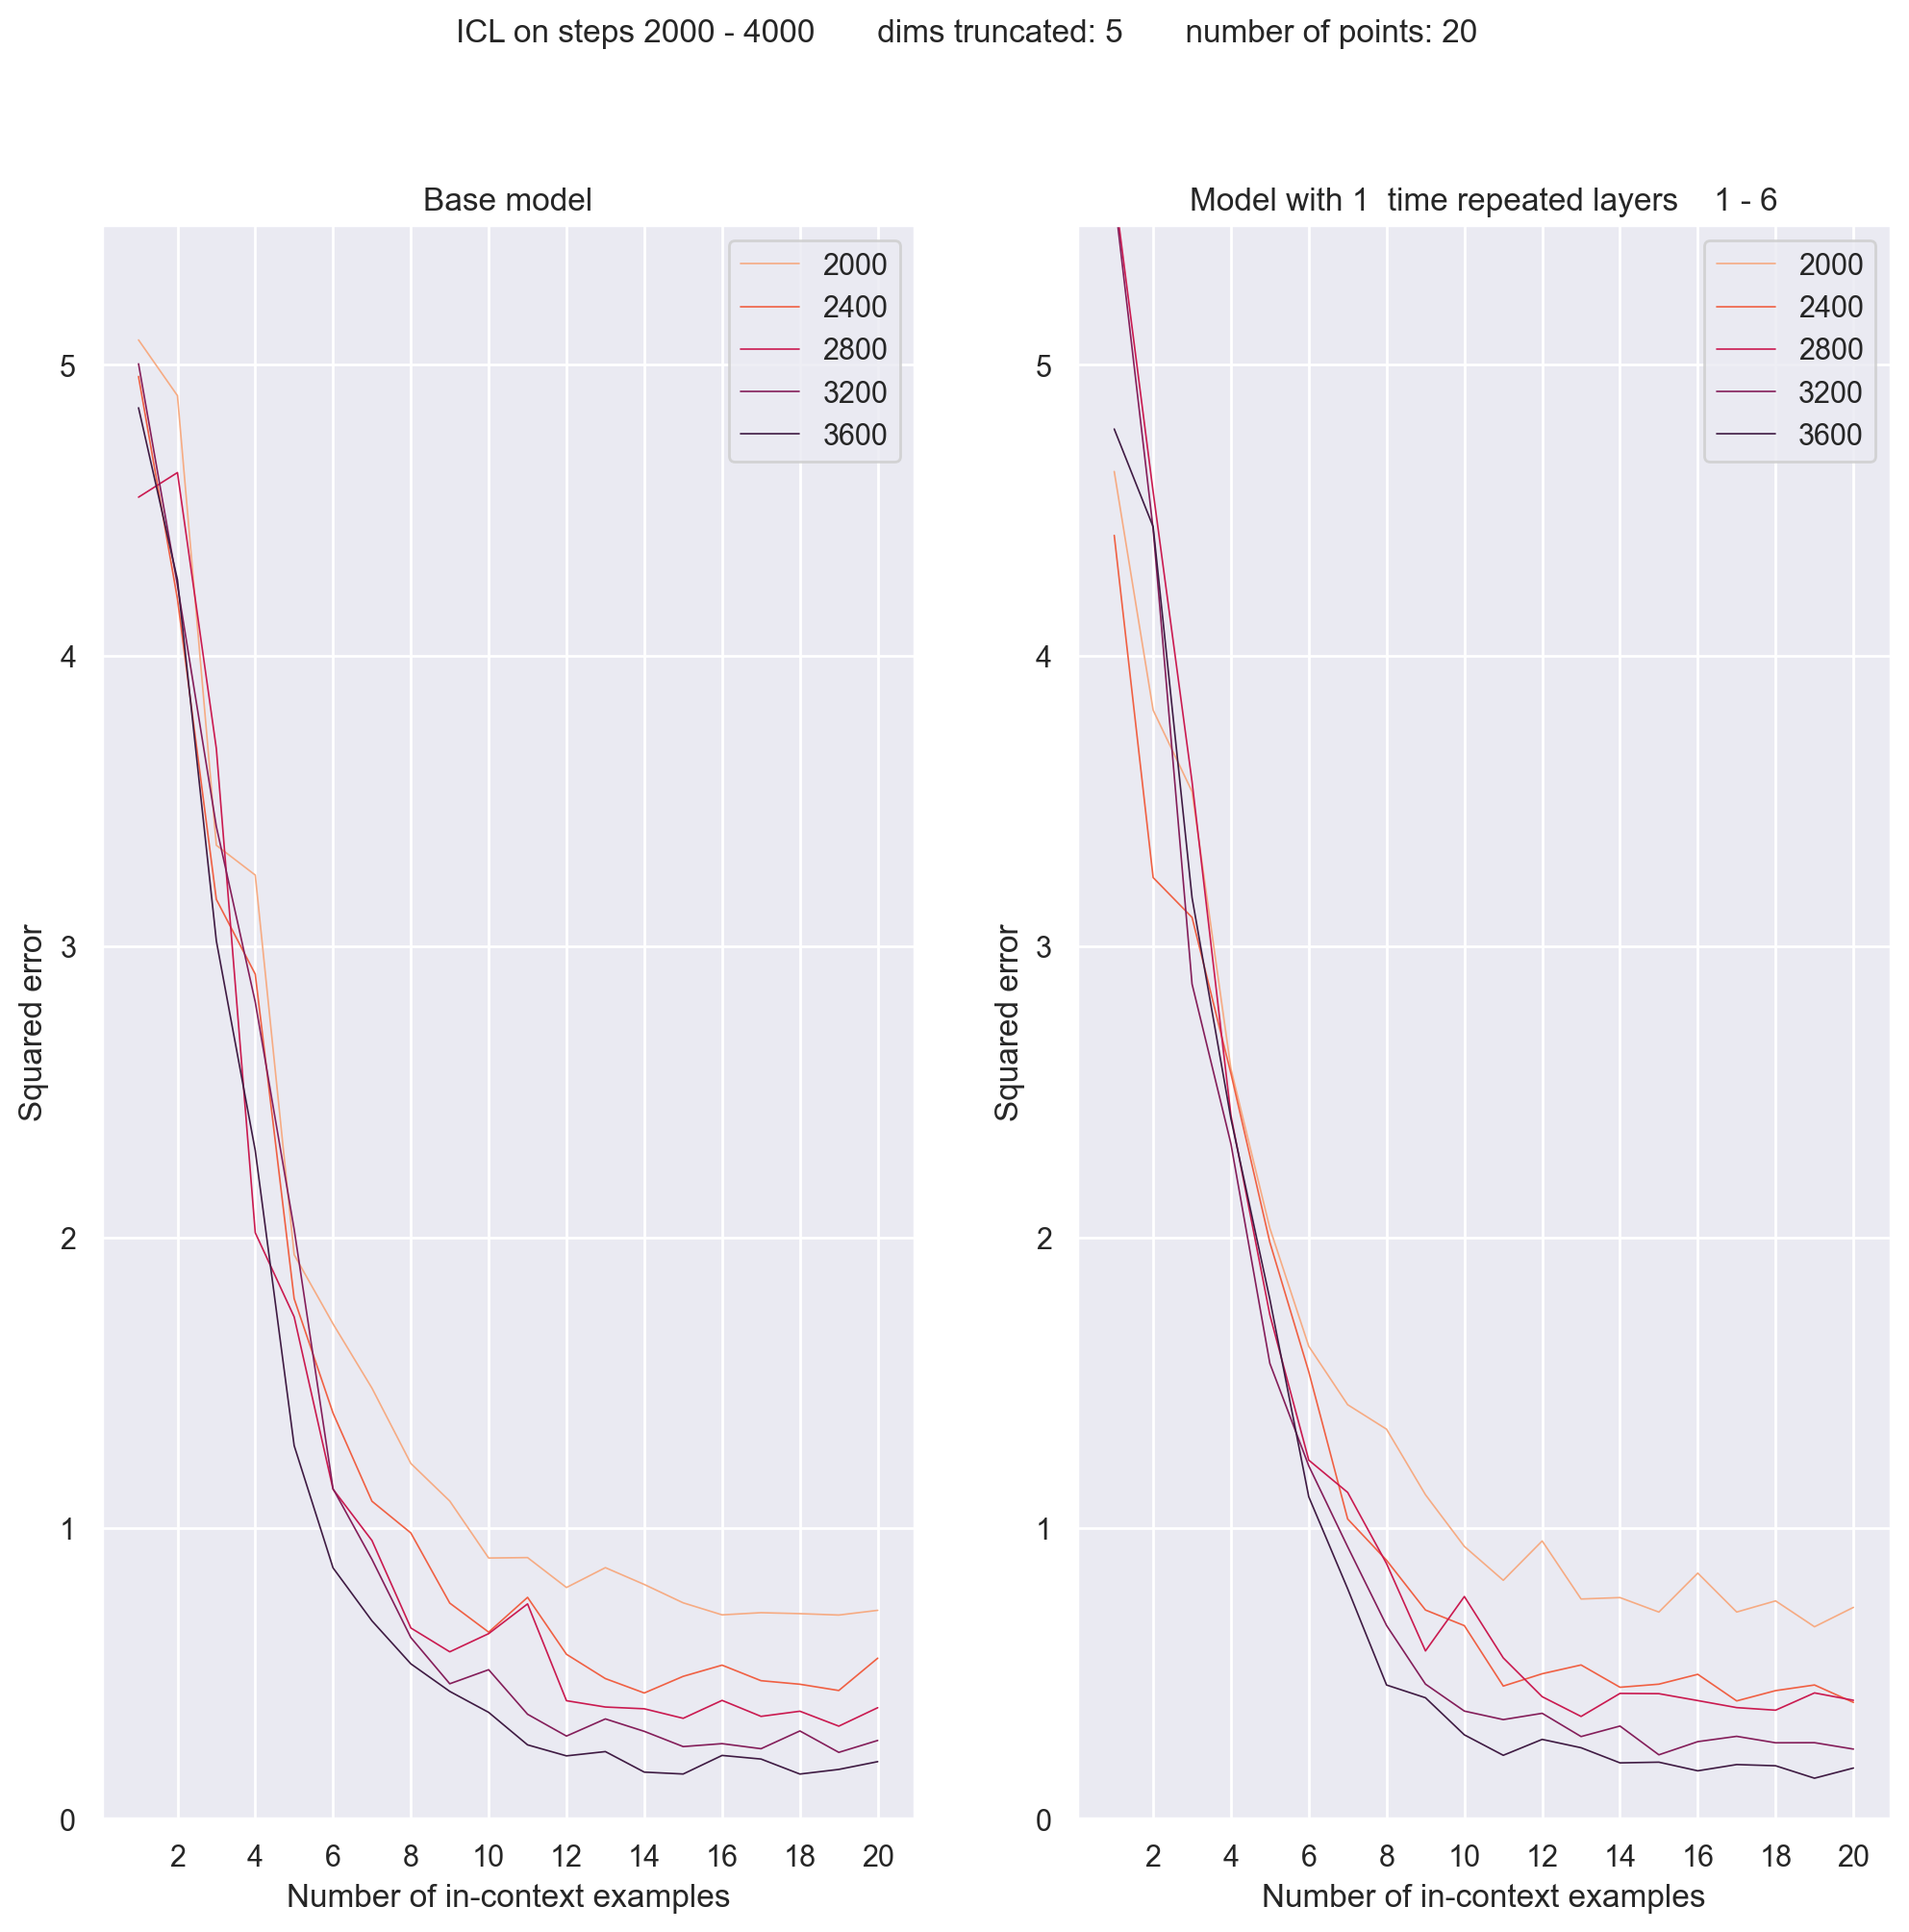

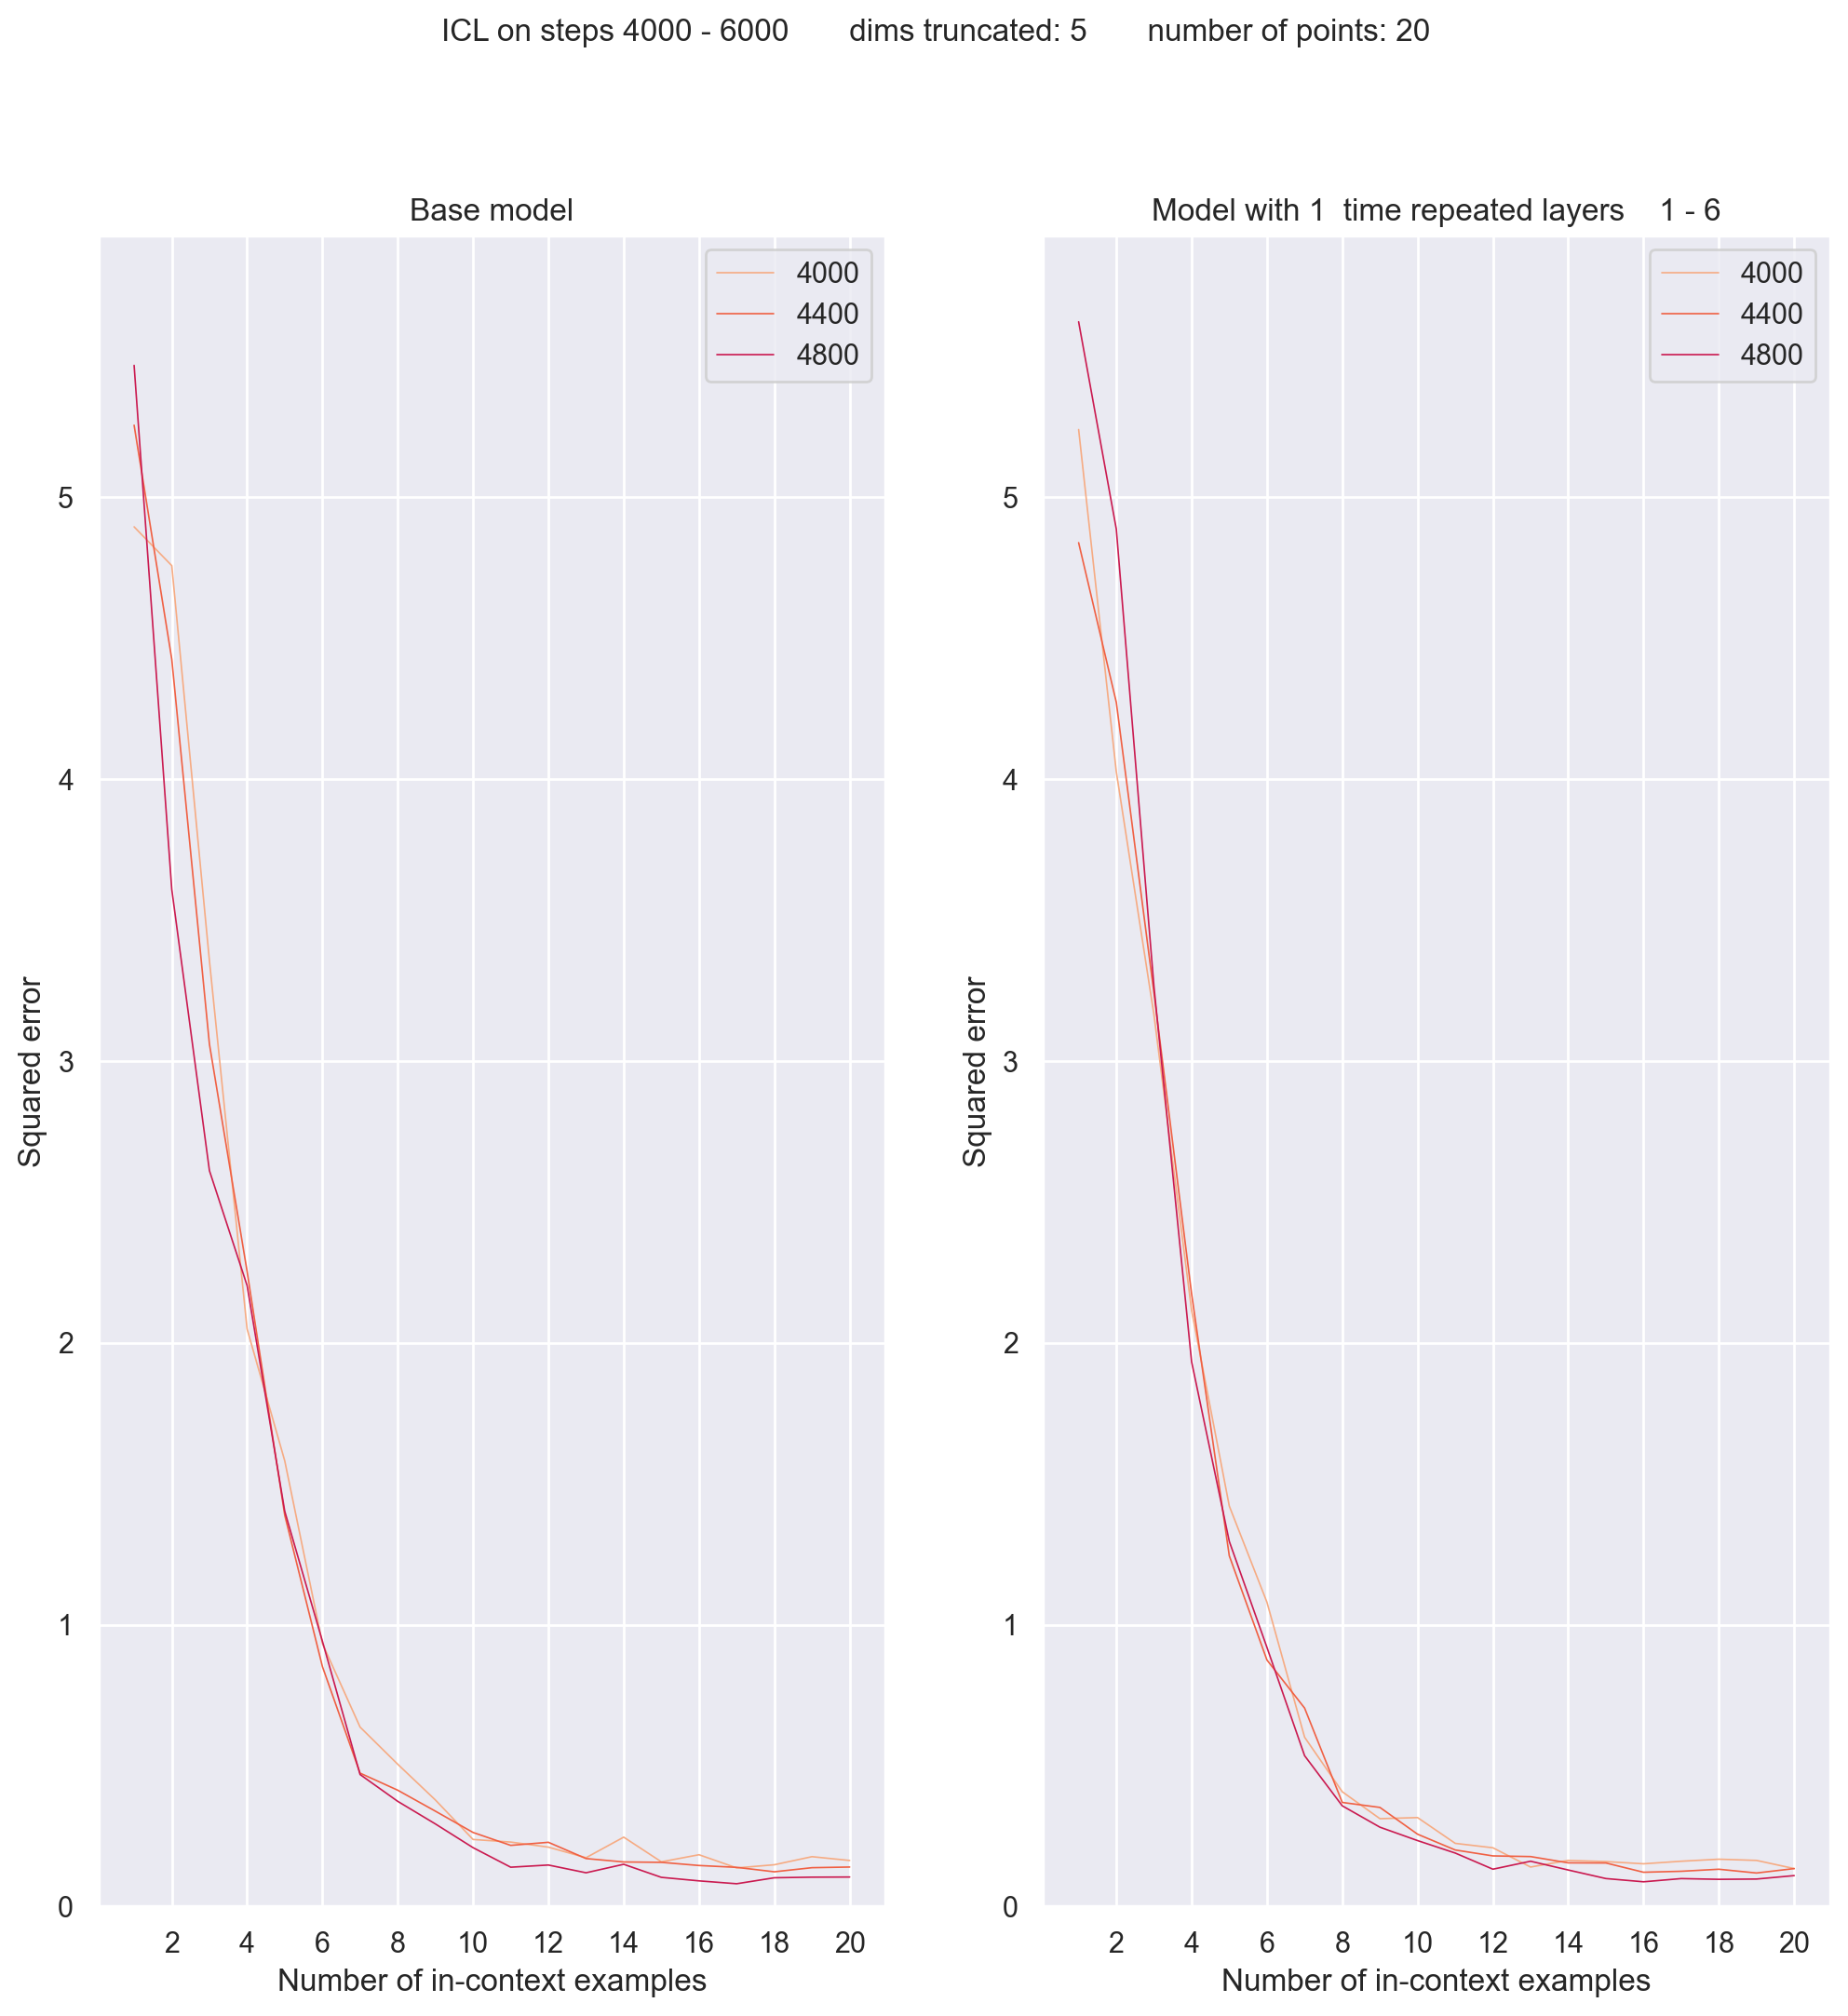

In [2]:
import yaml
short_name = 'permute_baseline'
update = 'permute_model: True'
update = yaml.safe_load(update)

clean_dirs_by_name(conf.out_dir, short_name)   
exp2 = Experiment(conf, short_name = short_name)
exp2.customize_experiment(update=update)
exp2.run_experiment()

Удваиваем все слои и это внезапно не оказывается хорошо, хотя по логике авторов 2 статьи слои должны выполнять одну и ту же задачу.
Важно, что основная модель в процессе перемешивается и это значит, что любой слой участвует в итерации метода Ньютона

Running experiment with params:
    log_model_weights: True
    transform_conf:
        switch_params: None
        duplicate_params: [1, 6, 2]
        full_backbone_copy: False
        no_layernorm_full_backbone_copy: False
        first_n_layers: None
        new_backbone_training: False
        readout2_training: True
        model_variants: ['modified', 'full_backbone + no_final_layer_norm']
        transform_variants: ['duplicate_layers', 'switch_layers']
        transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x0000020E8819D700>
    auto_transform_conf:
        permute_bounds_params: [1, 6]
        permute_interval: 10
        permute_model: True
        auto_transform_variants: ['auto_permute_layers', 'auto_custom_permute']
        use_custom_permute: False
        auto_transform_func: <function variant.<locals>.decorator.<locals>.wrapper at 0x0000020E88283F70>
    short_description: permute_duplicate_baseline
17.682946 M parameters


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: enemo_ce-warch (use `wandb login --relogin` to force relogin)


''

step 0: train loss 4.8956, train loss 2 4.8863
step 200: train loss 4.9871, train loss 2 5.0141
step 400: train loss 3.7711, train loss 2 4.0622


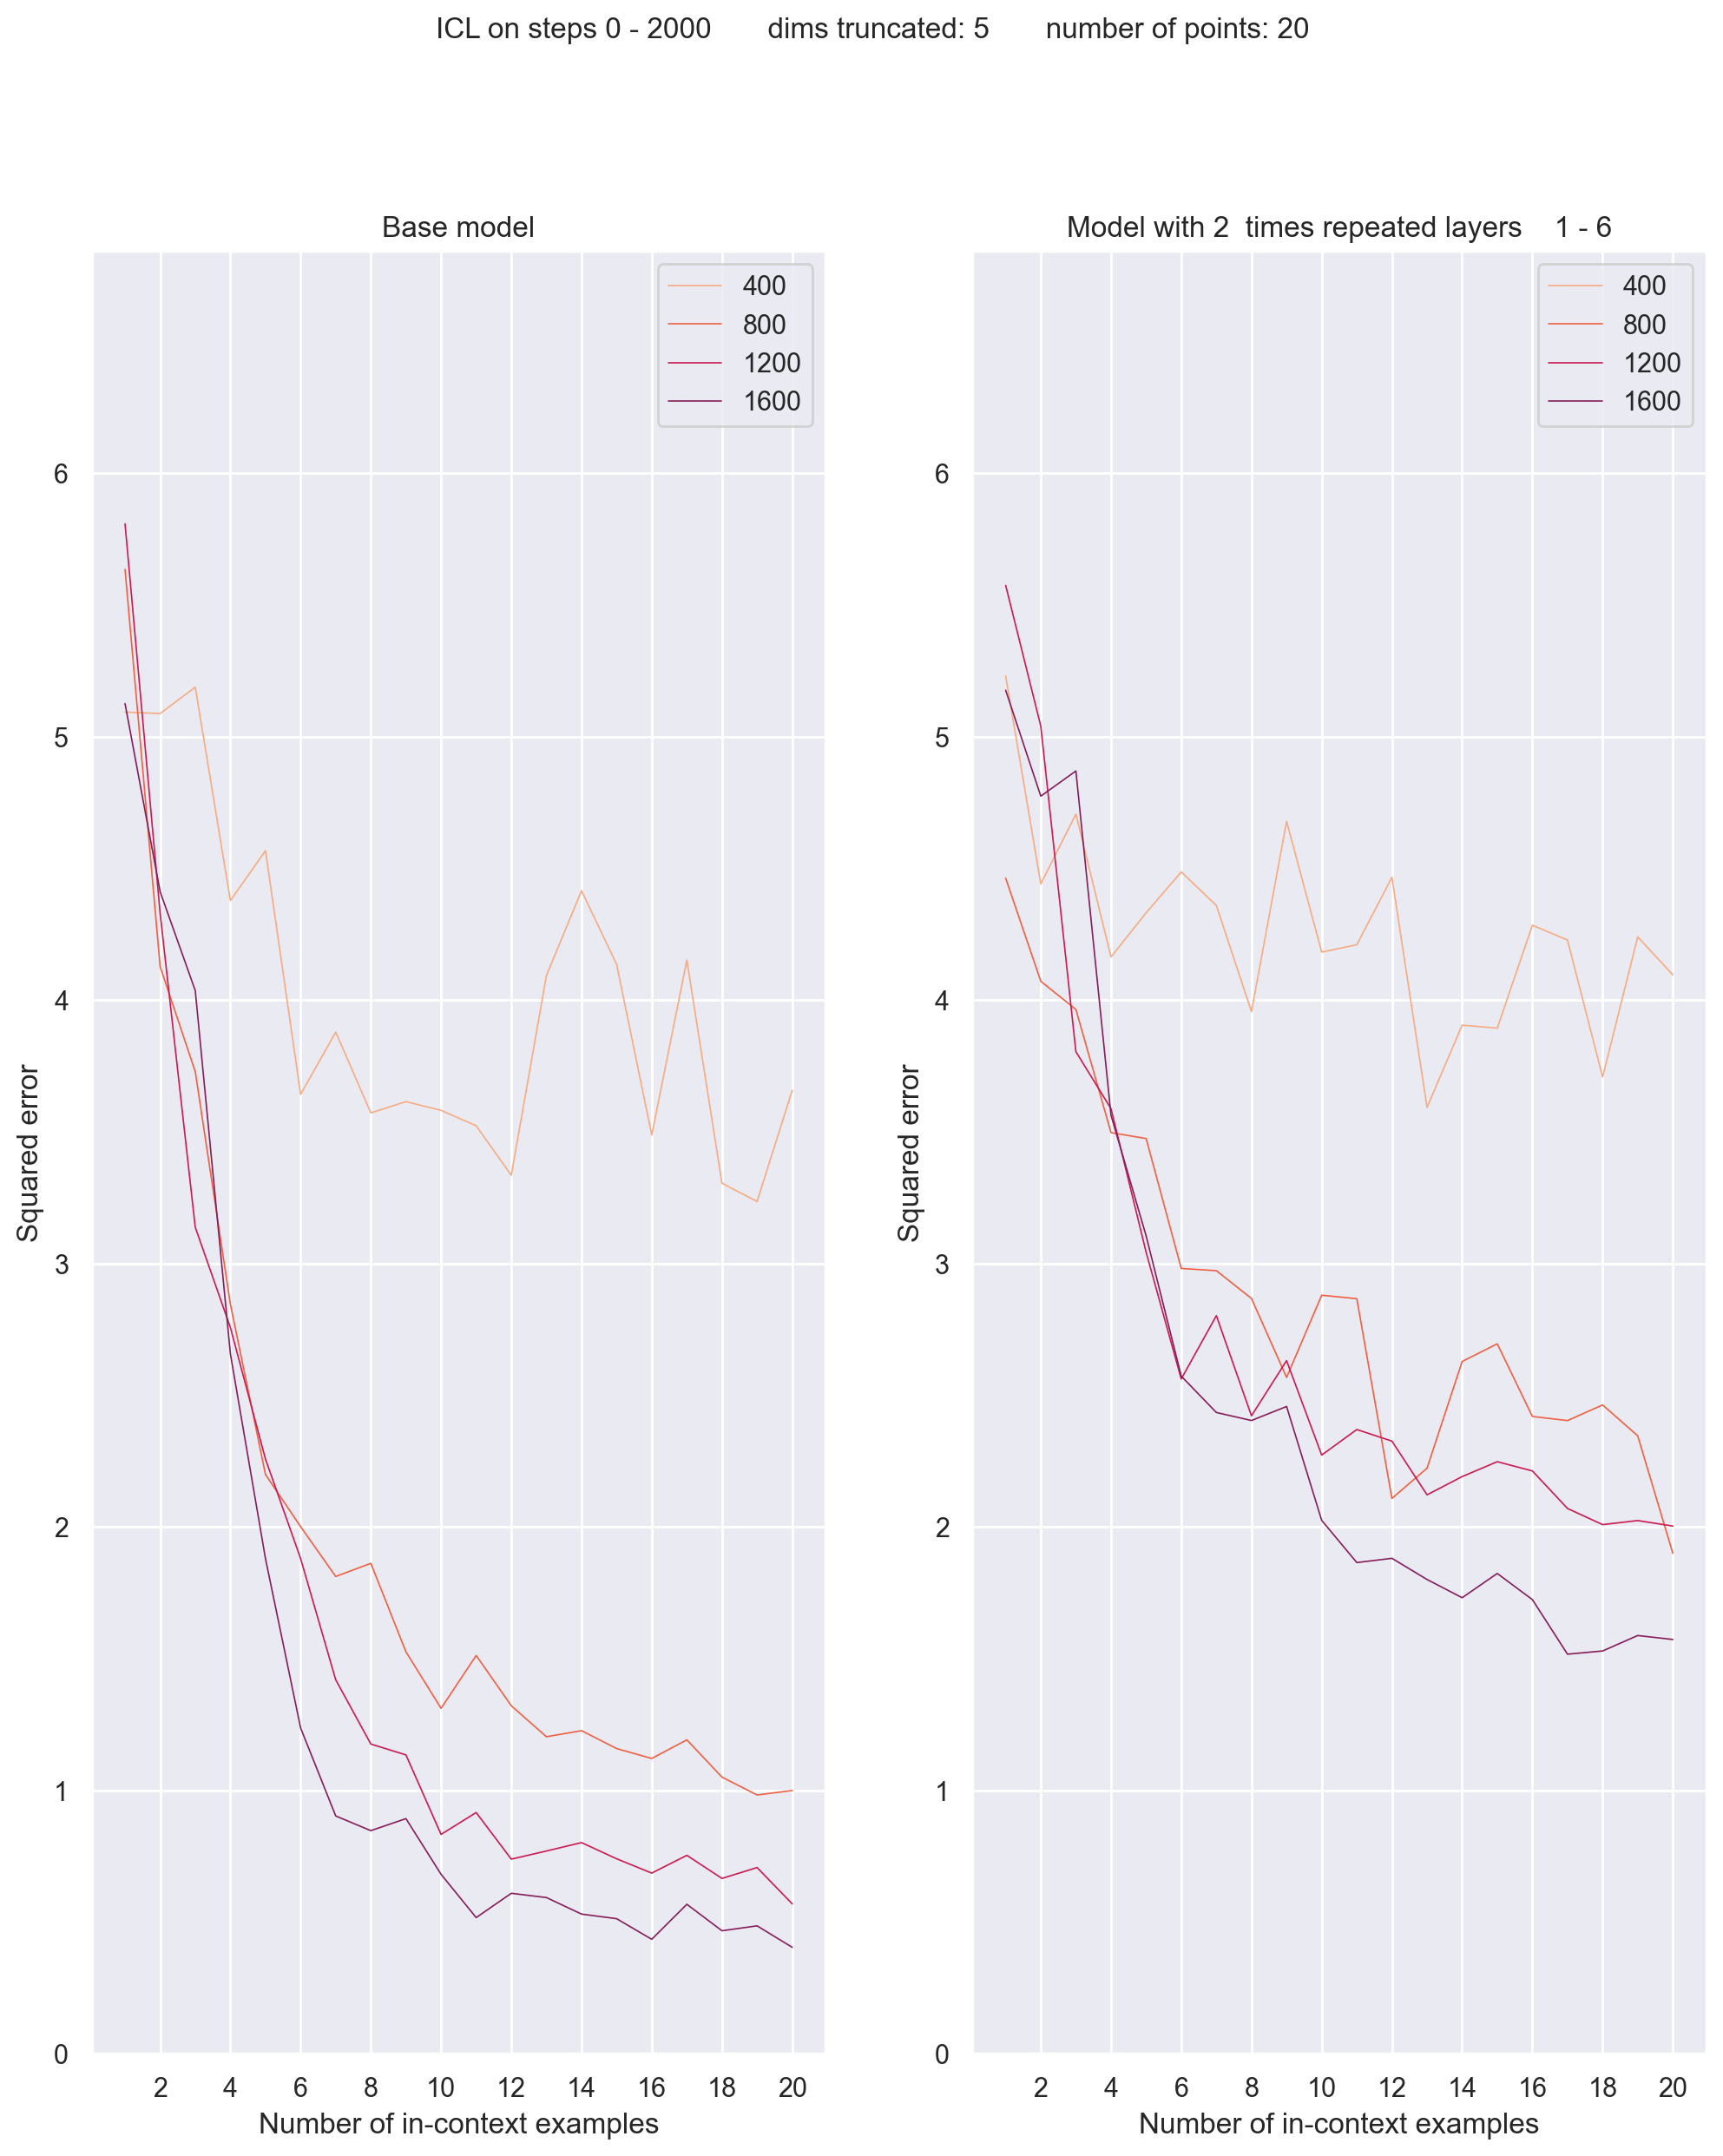

step 600: train loss 2.3728, train loss 2 3.3081
step 800: train loss 1.9163, train loss 2 2.9873
step 1000: train loss 1.7890, train loss 2 2.8999
step 1200: train loss 1.5928, train loss 2 2.7943
step 1400: train loss 1.4021, train loss 2 2.4725
step 1600: train loss 1.3185, train loss 2 2.3649
step 1800: train loss 1.2763, train loss 2 2.4375
step 2000: train loss 1.1020, train loss 2 2.2877


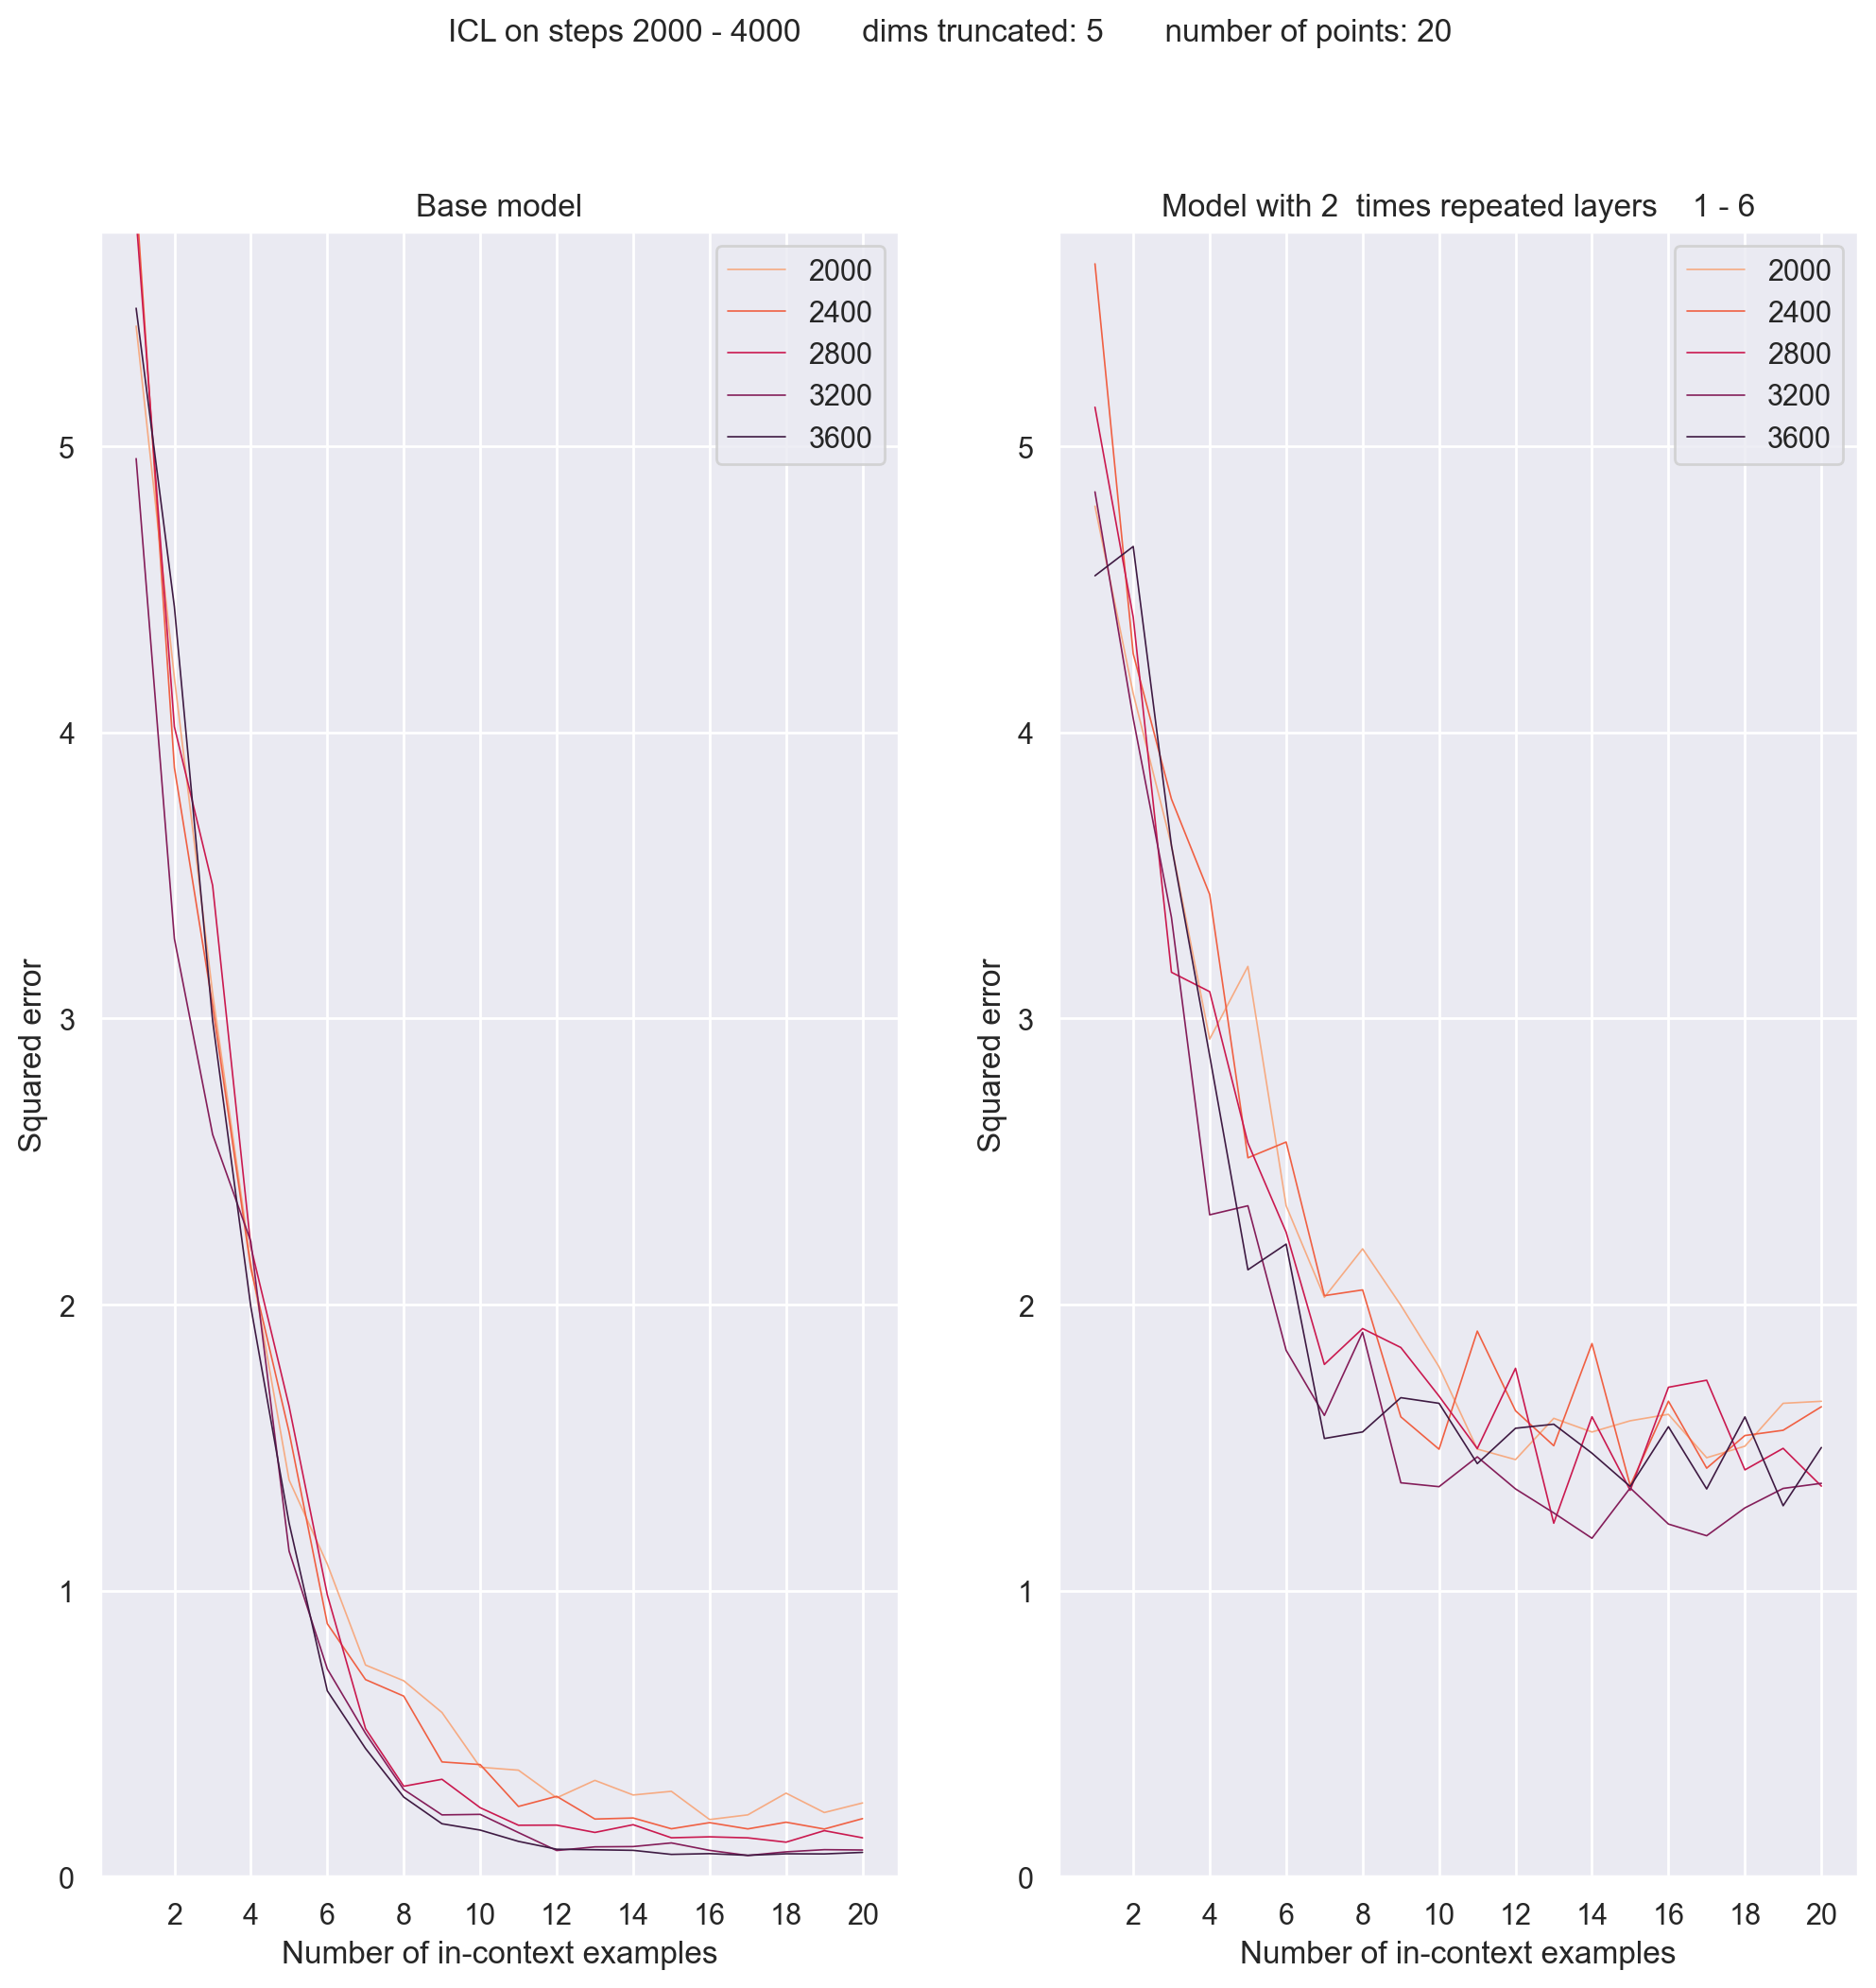

step 2200: train loss 1.1036, train loss 2 2.3103
step 2400: train loss 1.0358, train loss 2 2.1940
step 2600: train loss 0.9891, train loss 2 2.1801
step 2800: train loss 0.9992, train loss 2 2.1976
step 3000: train loss 0.9587, train loss 2 2.1829
step 3200: train loss 0.9321, train loss 2 2.0754
step 3400: train loss 0.9365, train loss 2 2.1615
step 3600: train loss 0.8979, train loss 2 2.1275
step 3800: train loss 0.8761, train loss 2 2.0630
step 4000: train loss 0.8802, train loss 2 1.9910


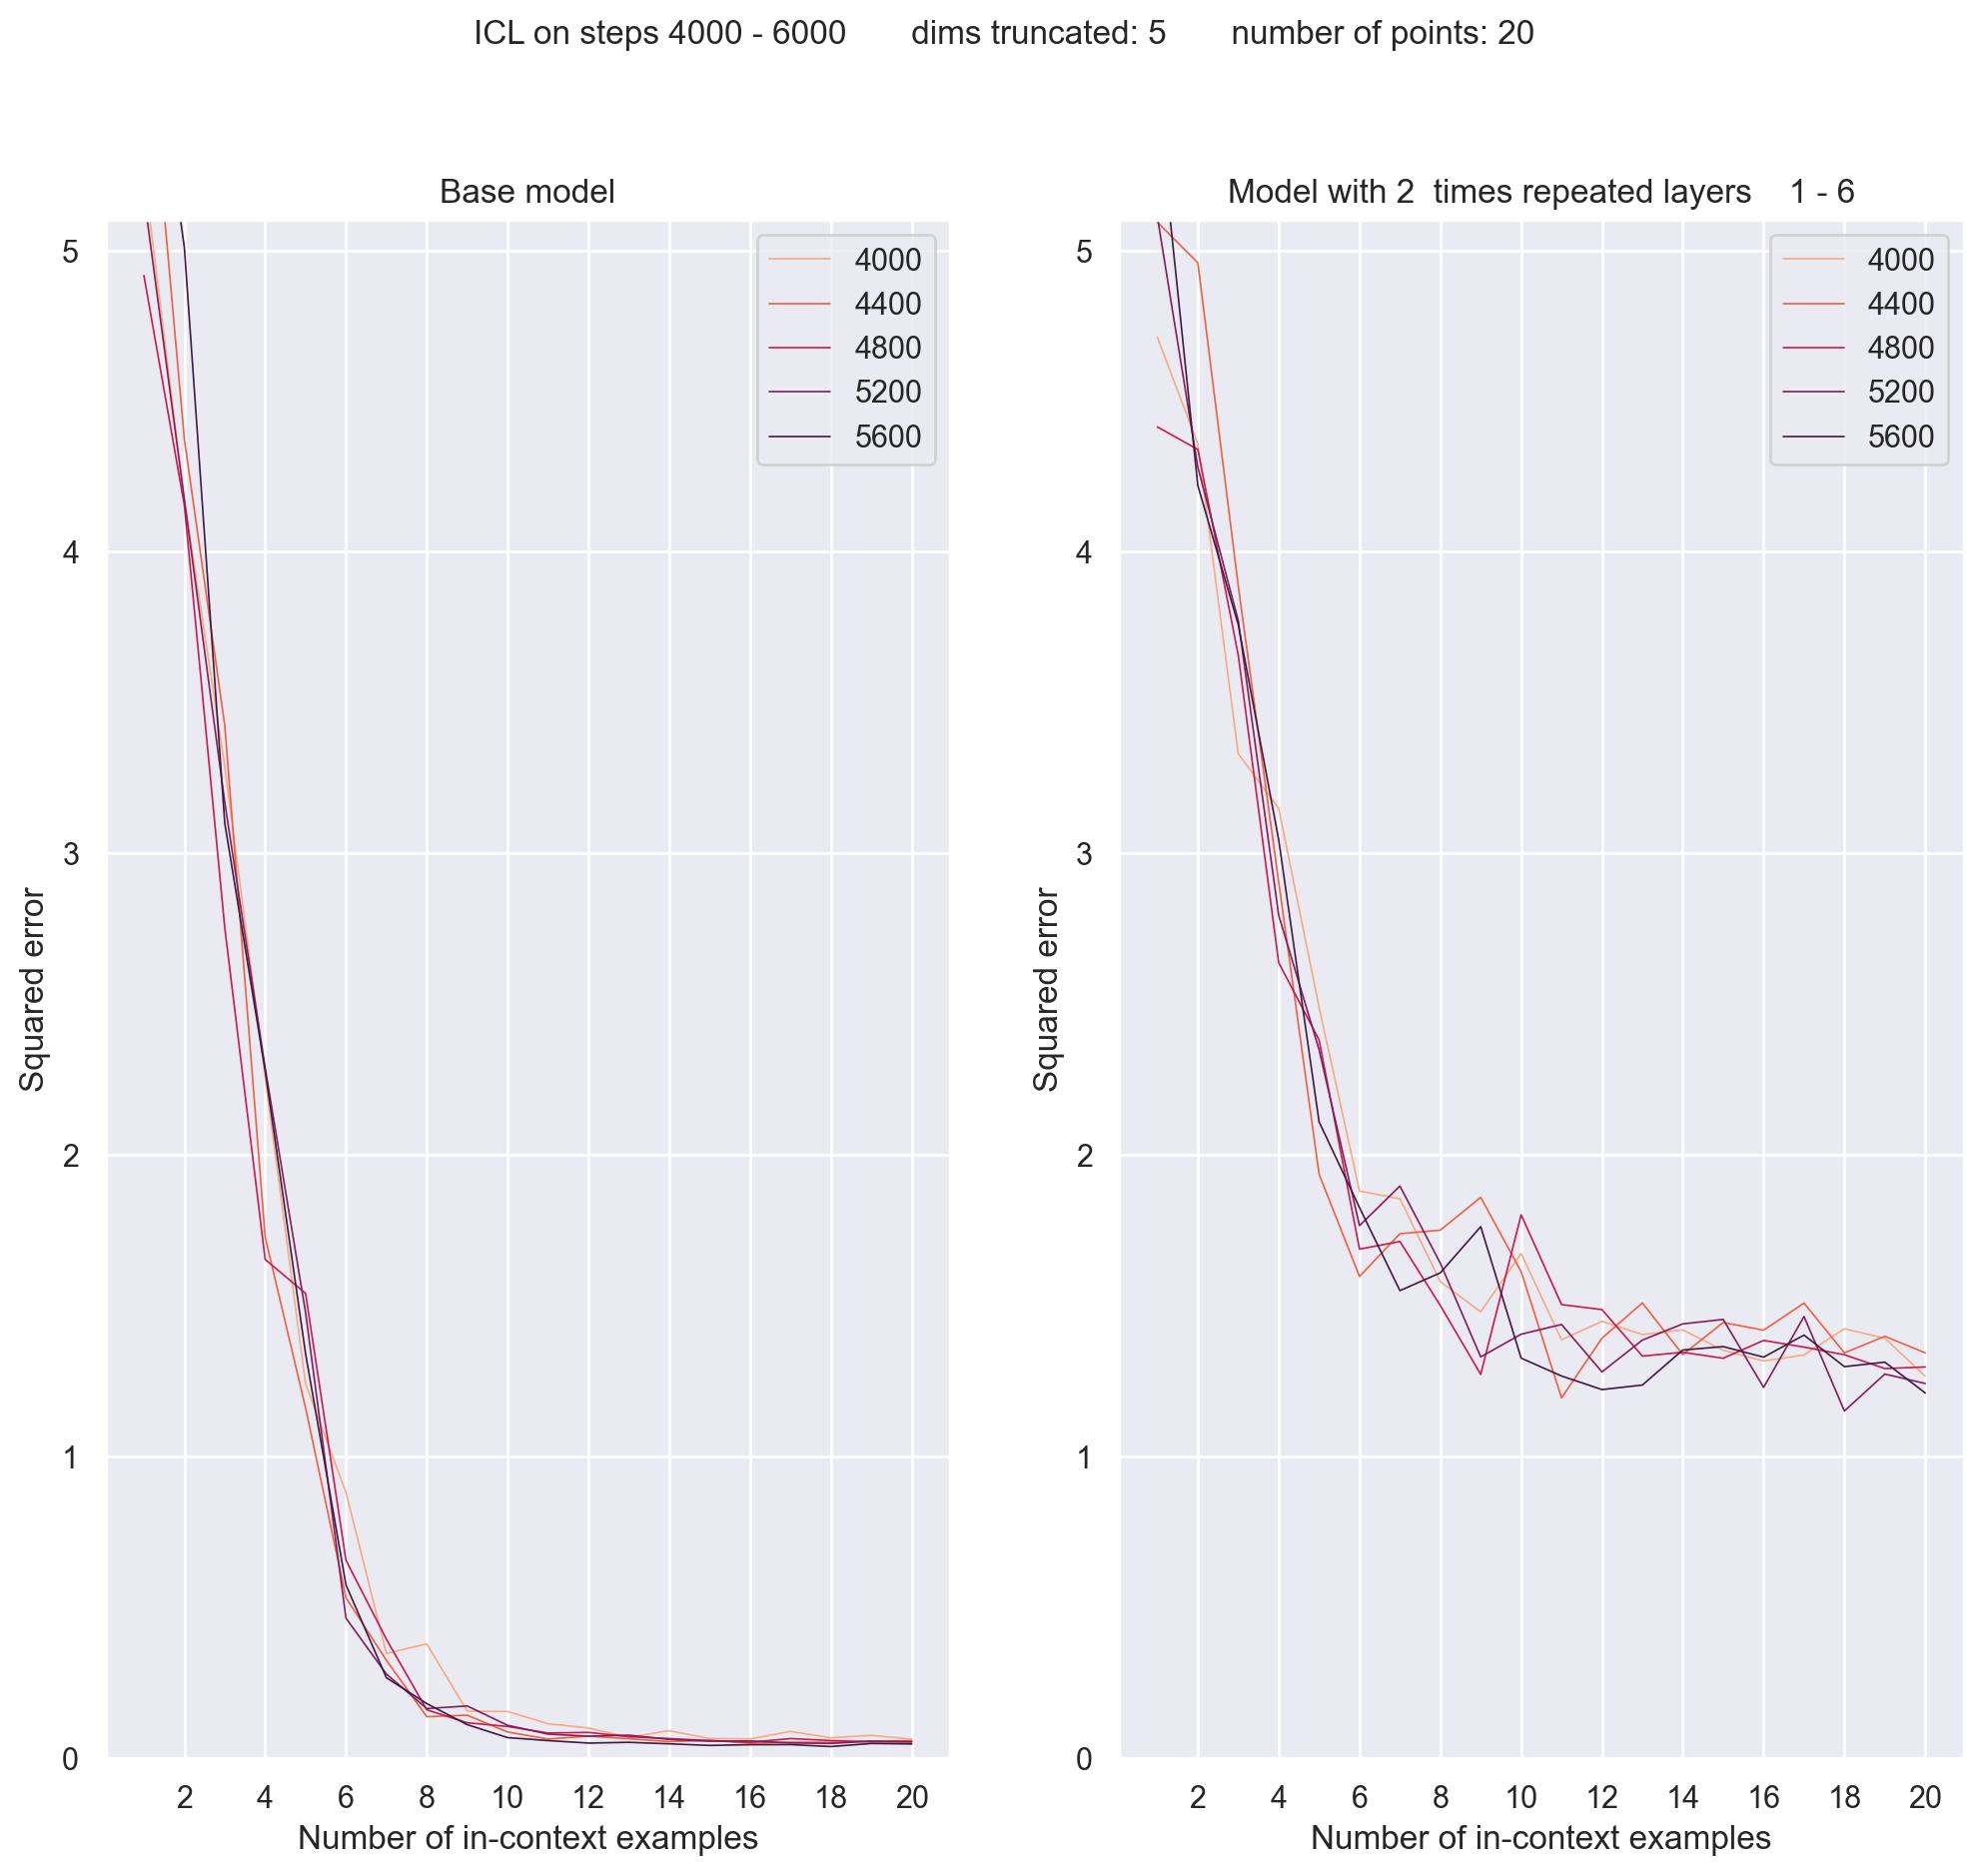

step 4200: train loss 0.8666, train loss 2 2.0092
step 4400: train loss 0.9193, train loss 2 2.0737
step 4600: train loss 0.8801, train loss 2 2.0489
step 4800: train loss 0.8535, train loss 2 1.9981
step 5000: train loss 0.8566, train loss 2 1.9887
step 5200: train loss 0.8899, train loss 2 1.9847
step 5400: train loss 0.8631, train loss 2 2.0340
step 5600: train loss 0.8289, train loss 2 1.9274
step 5800: train loss 0.8706, train loss 2 1.9356
step 6000: train loss 0.8485, train loss 2 1.9308


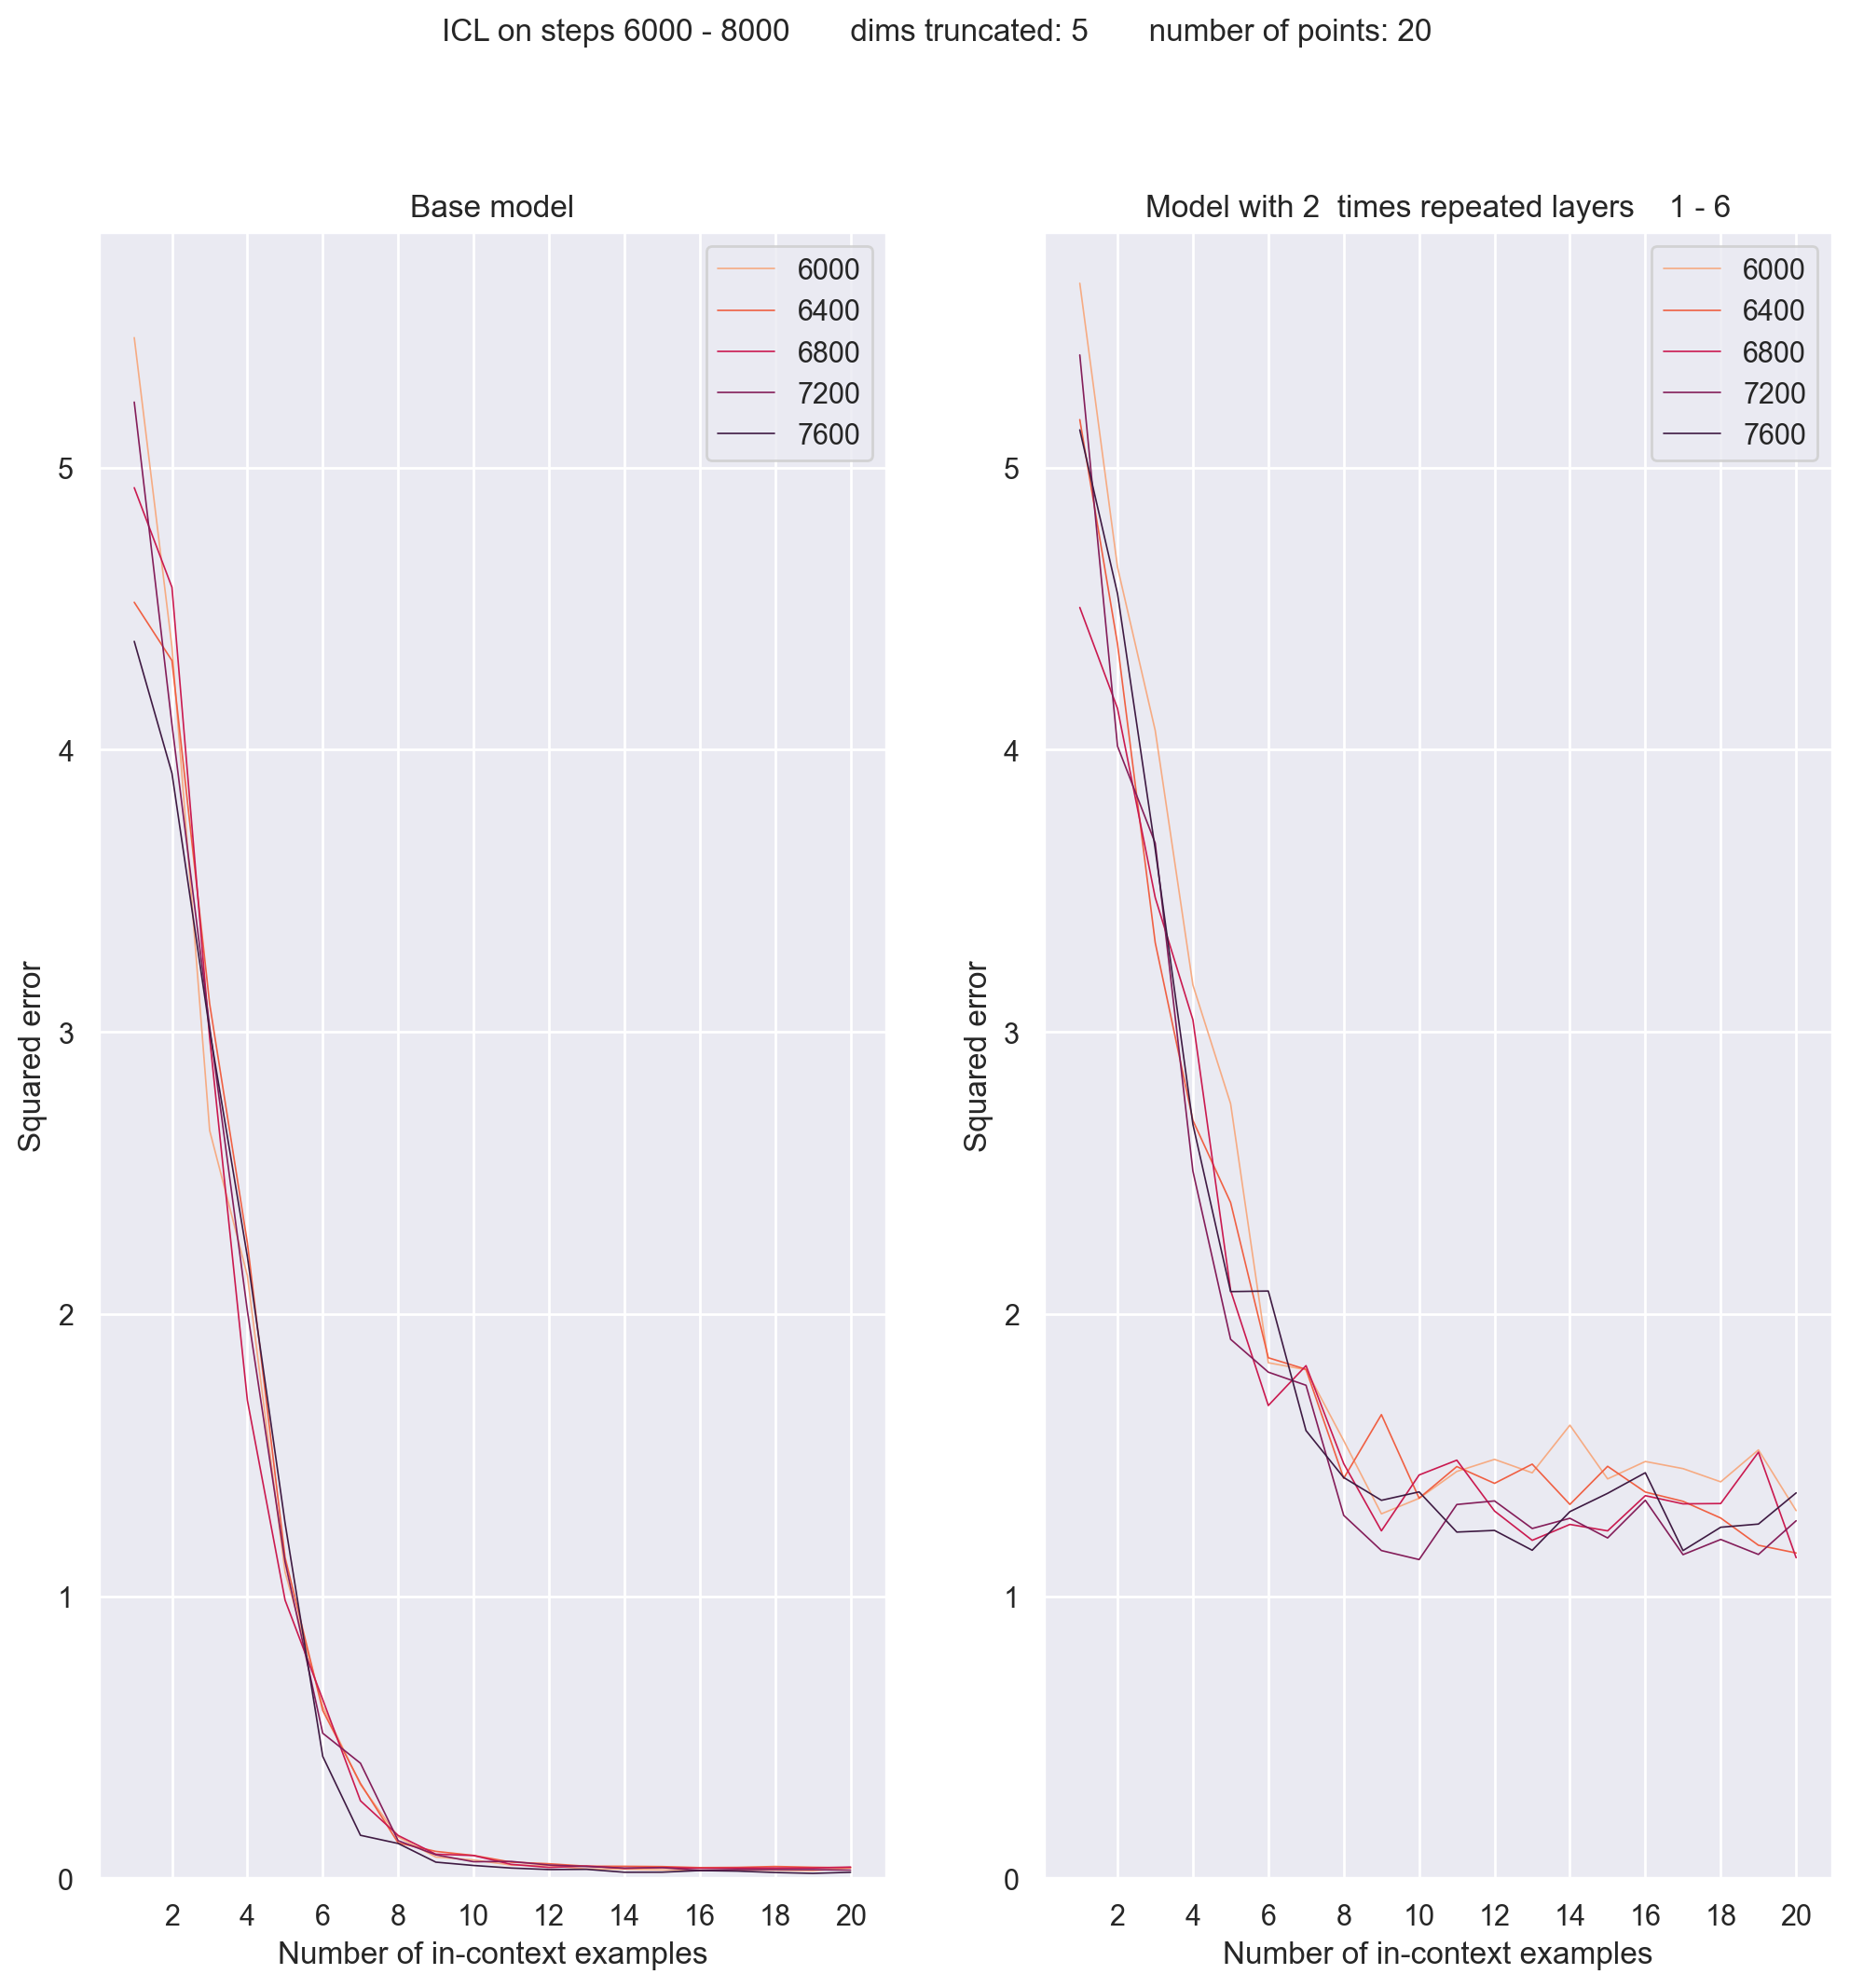

step 6200: train loss 0.8611, train loss 2 1.9353
step 6400: train loss 0.8493, train loss 2 1.9963
step 6600: train loss 0.8083, train loss 2 1.9048
step 6800: train loss 0.8537, train loss 2 1.9796
step 7000: train loss 0.8476, train loss 2 1.9068
step 7200: train loss 0.8088, train loss 2 1.7877
step 7400: train loss 0.8392, train loss 2 1.8769
step 7600: train loss 0.8224, train loss 2 1.8738
step 7800: train loss 0.8395, train loss 2 1.9125
step 8000: train loss 0.8249, train loss 2 1.8783


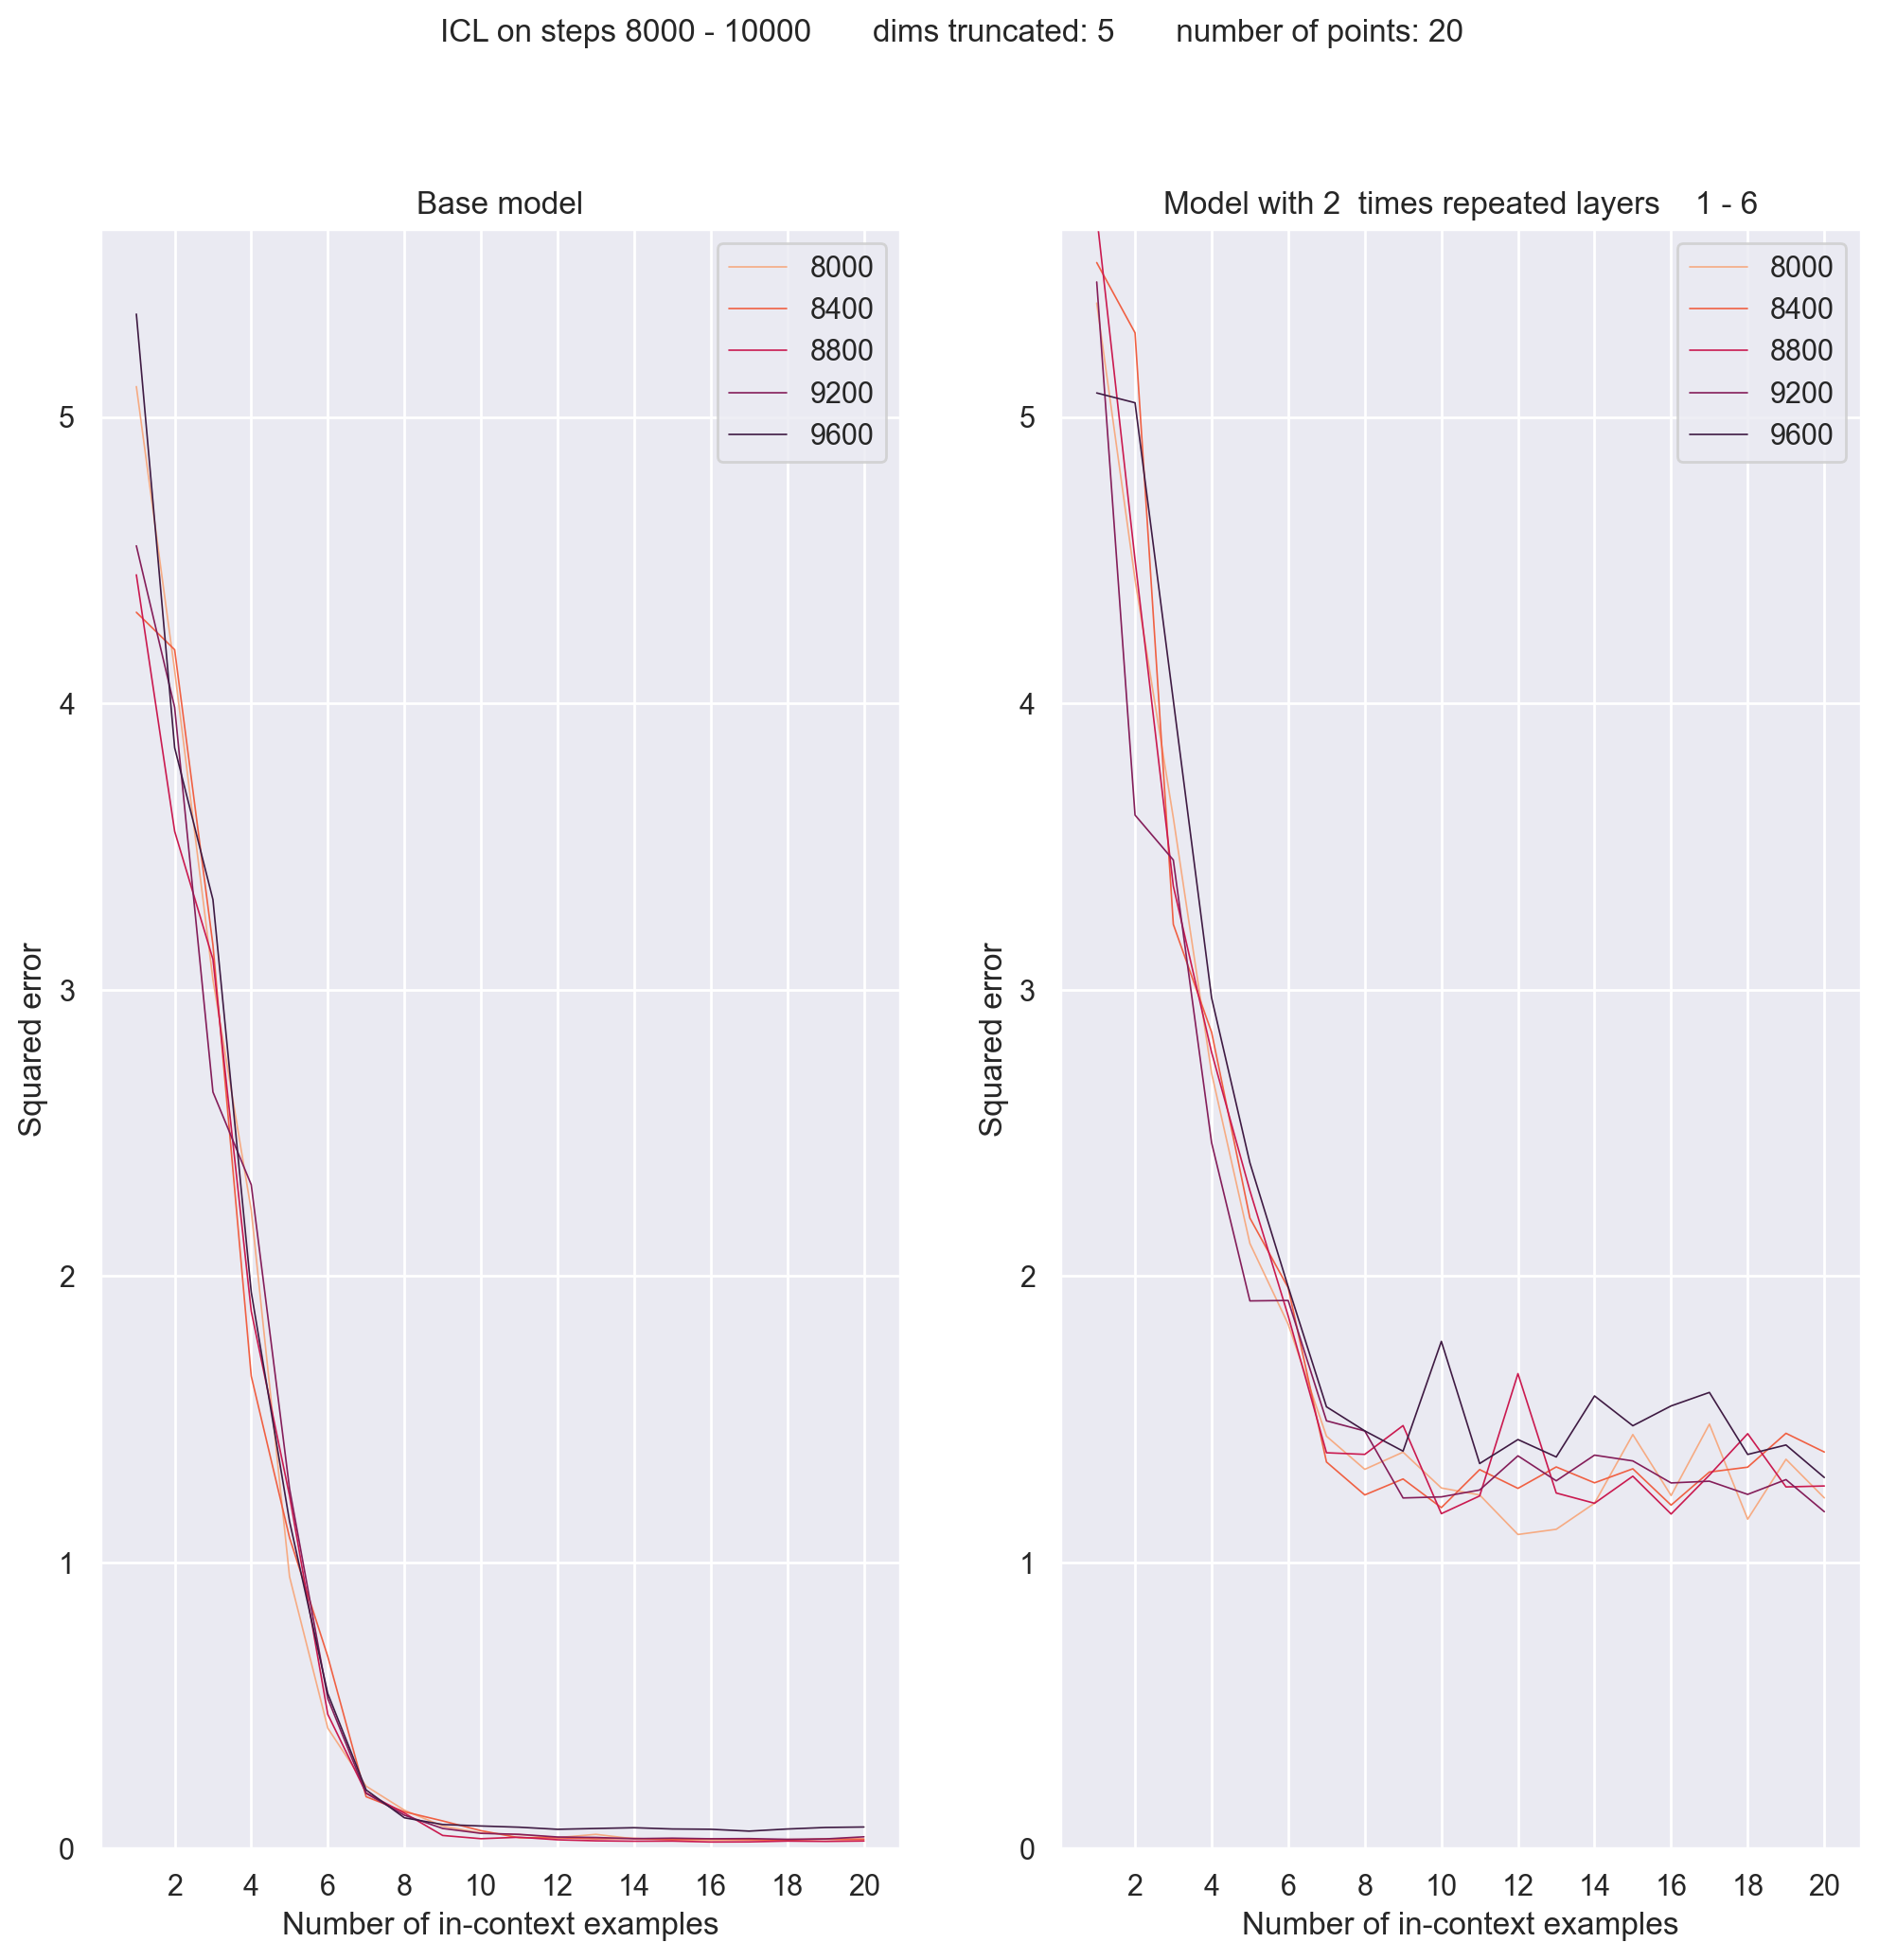

step 8200: train loss 0.8041, train loss 2 1.8769
step 8400: train loss 0.8209, train loss 2 1.8529
step 8600: train loss 0.8235, train loss 2 1.9004
step 8800: train loss 0.8349, train loss 2 1.8896
step 9000: train loss 0.8389, train loss 2 1.8730
step 9200: train loss 0.8650, train loss 2 1.9578
step 9400: train loss 0.8057, train loss 2 1.8008
step 9600: train loss 0.8645, train loss 2 1.9999
step 9800: train loss 0.8013, train loss 2 1.8104
step 9999: train loss 0.8051, train loss 2 1.7961


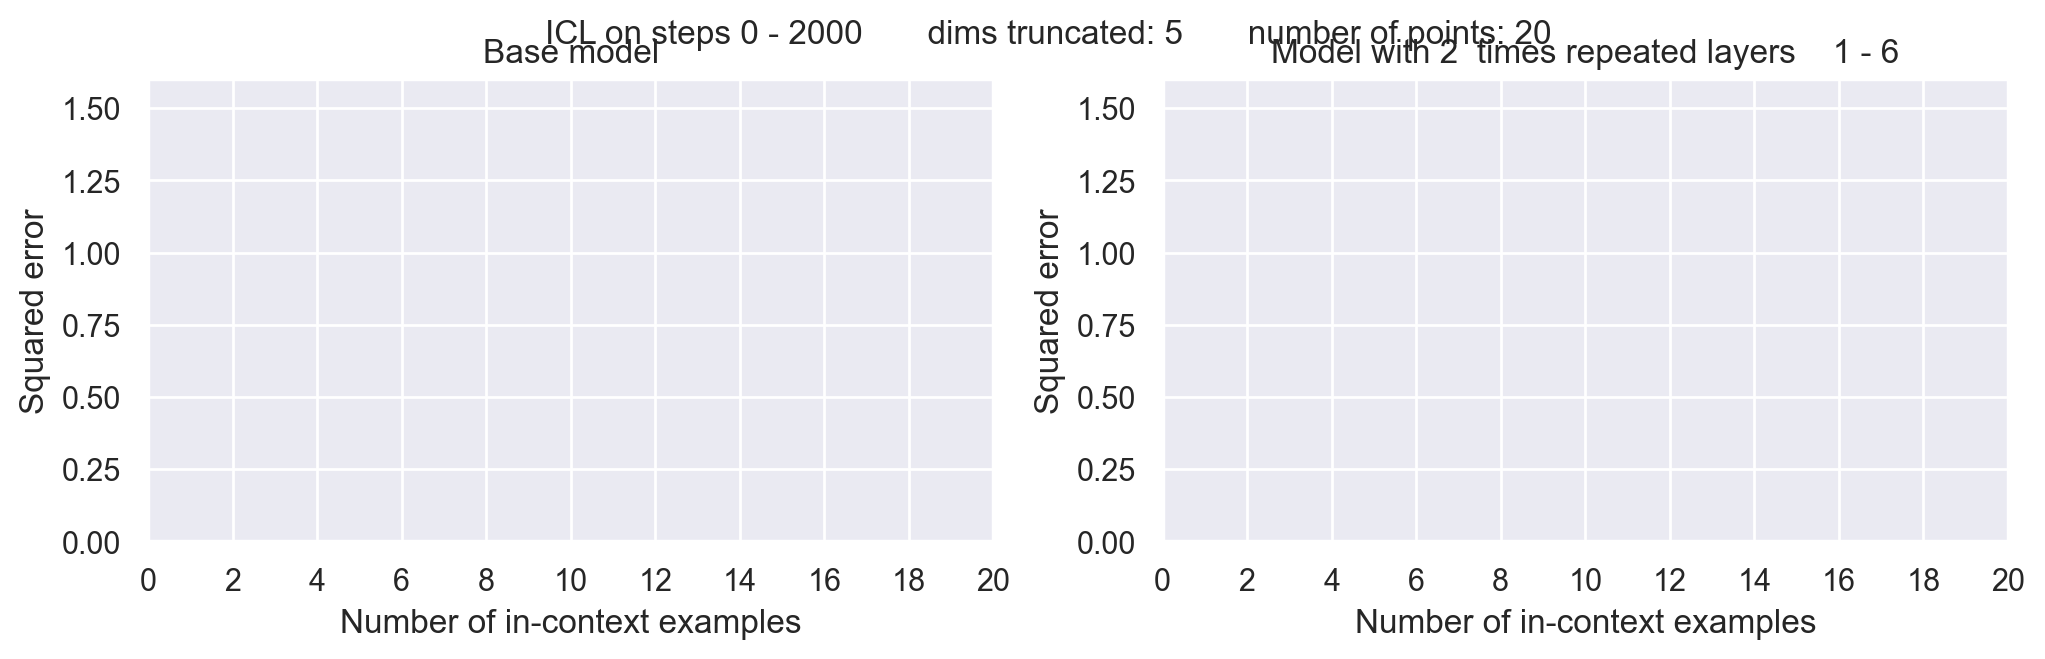

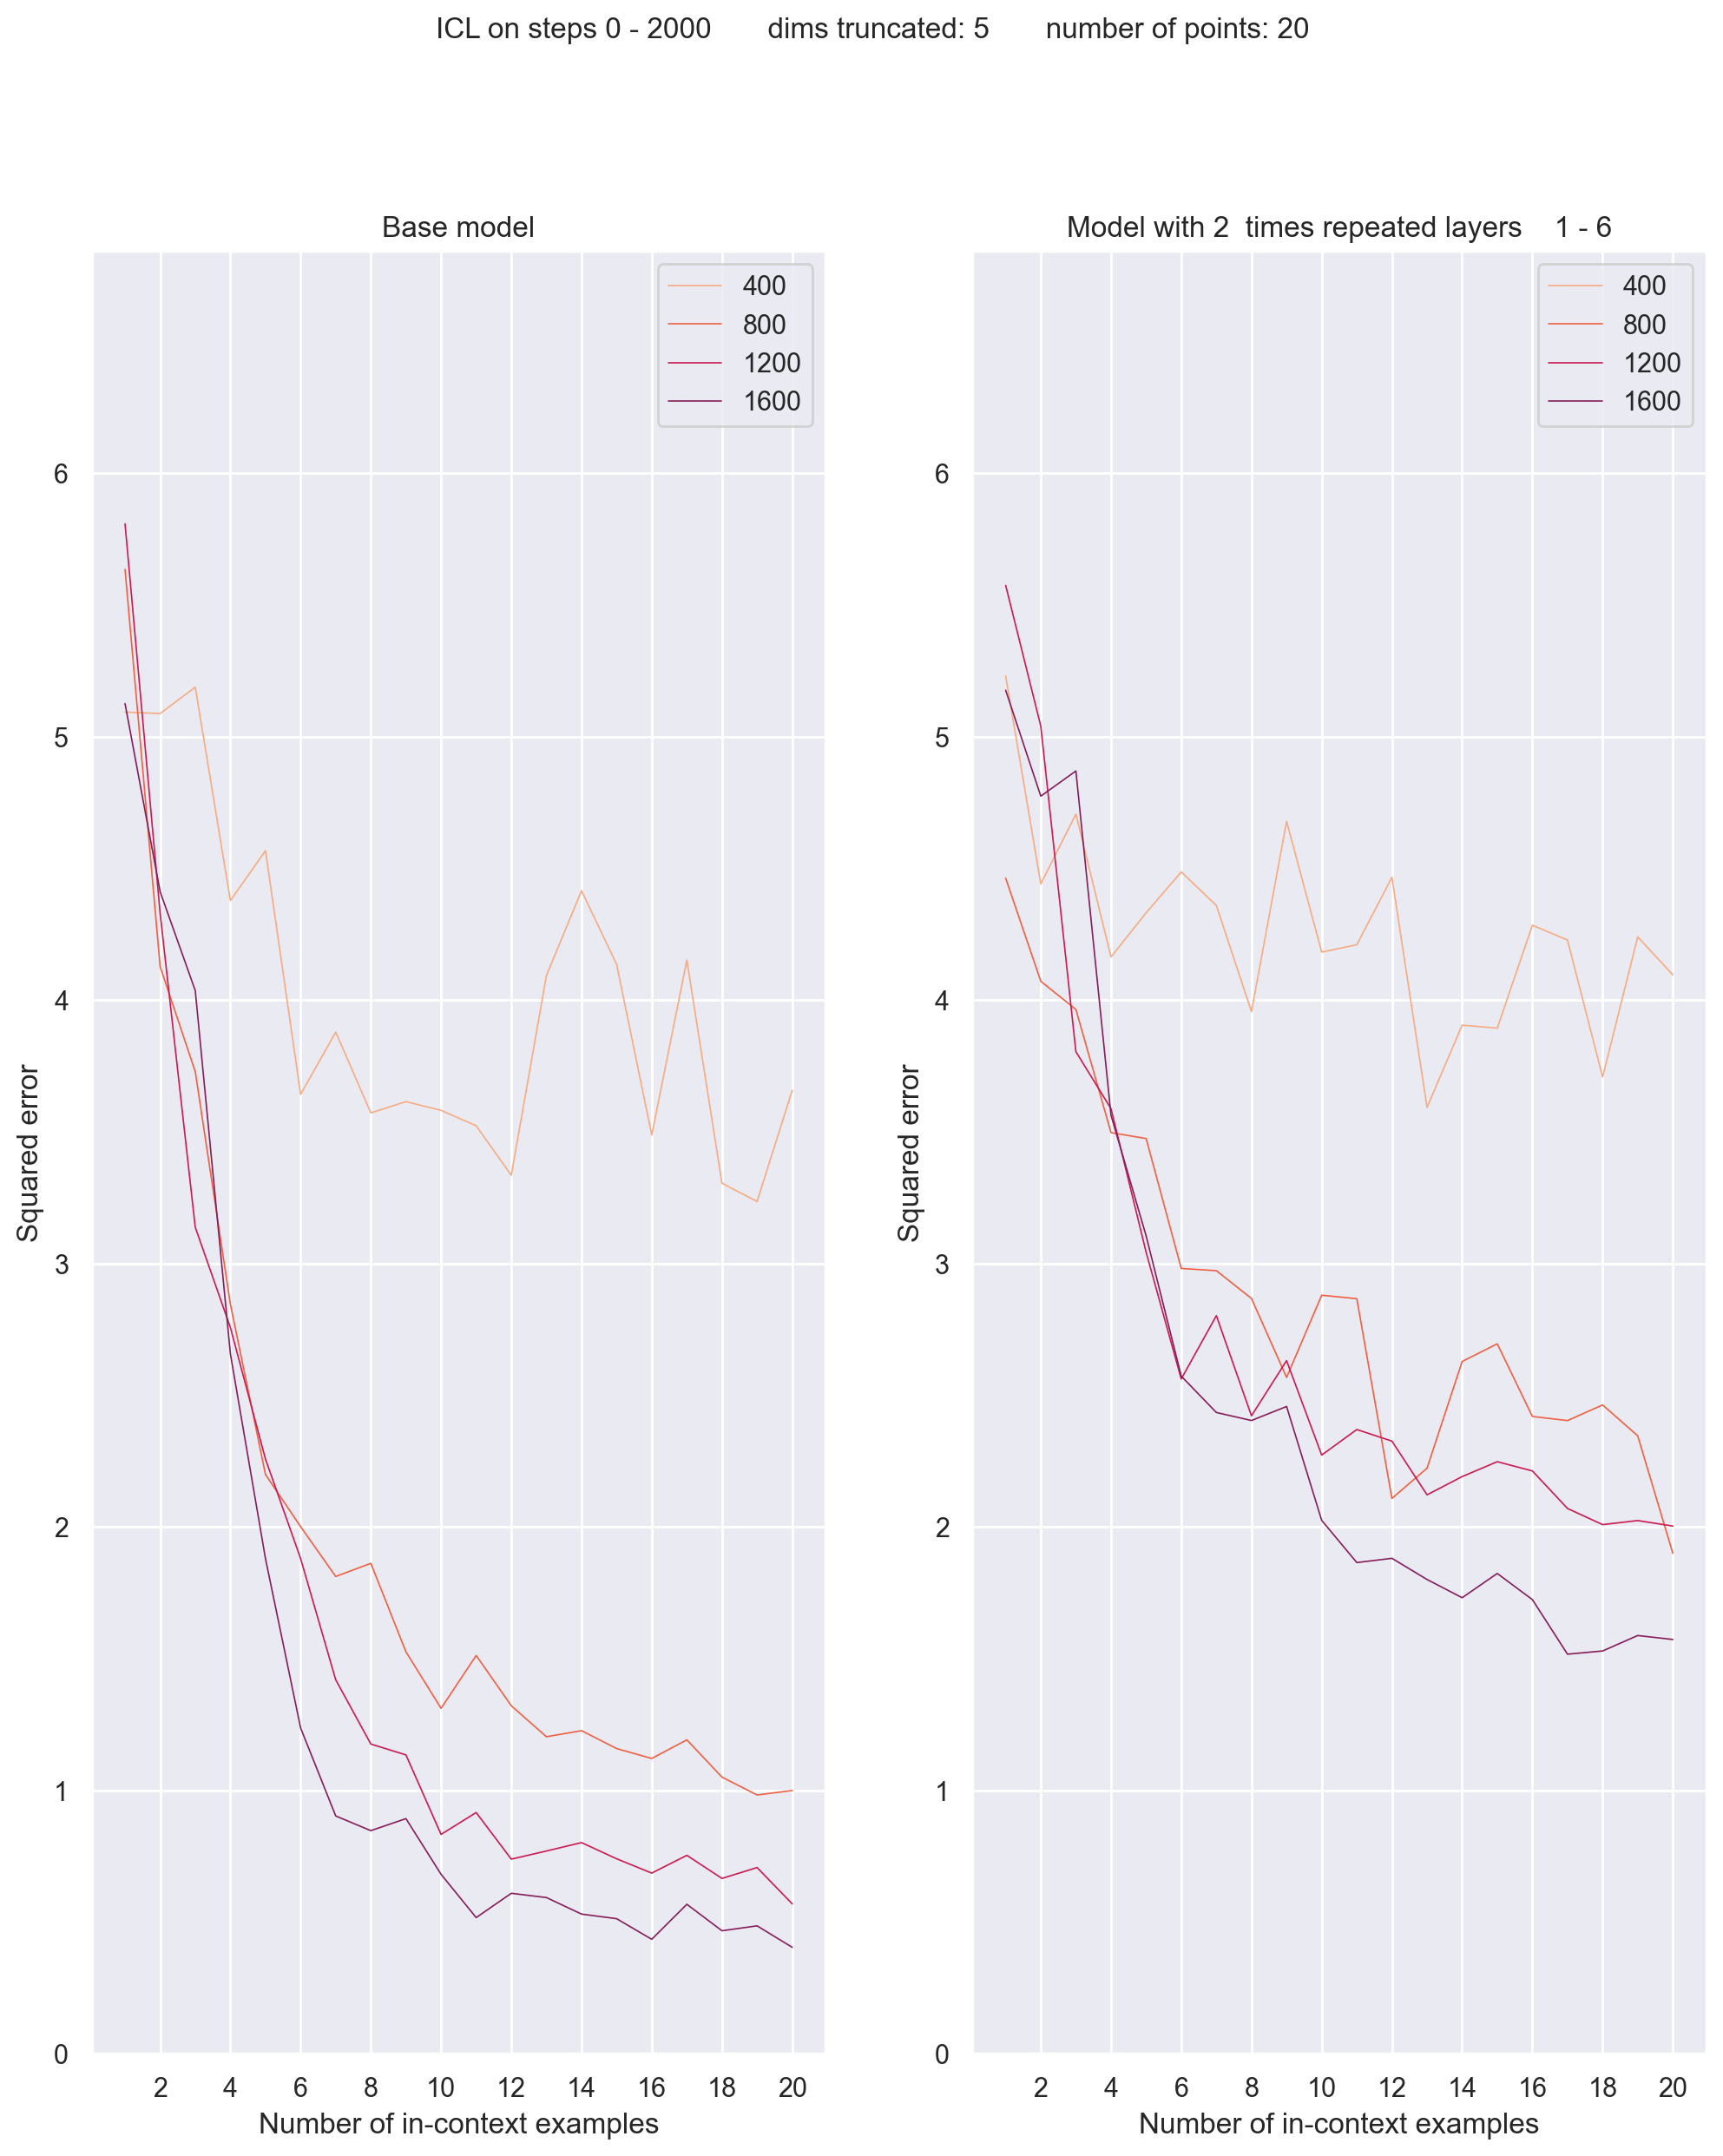

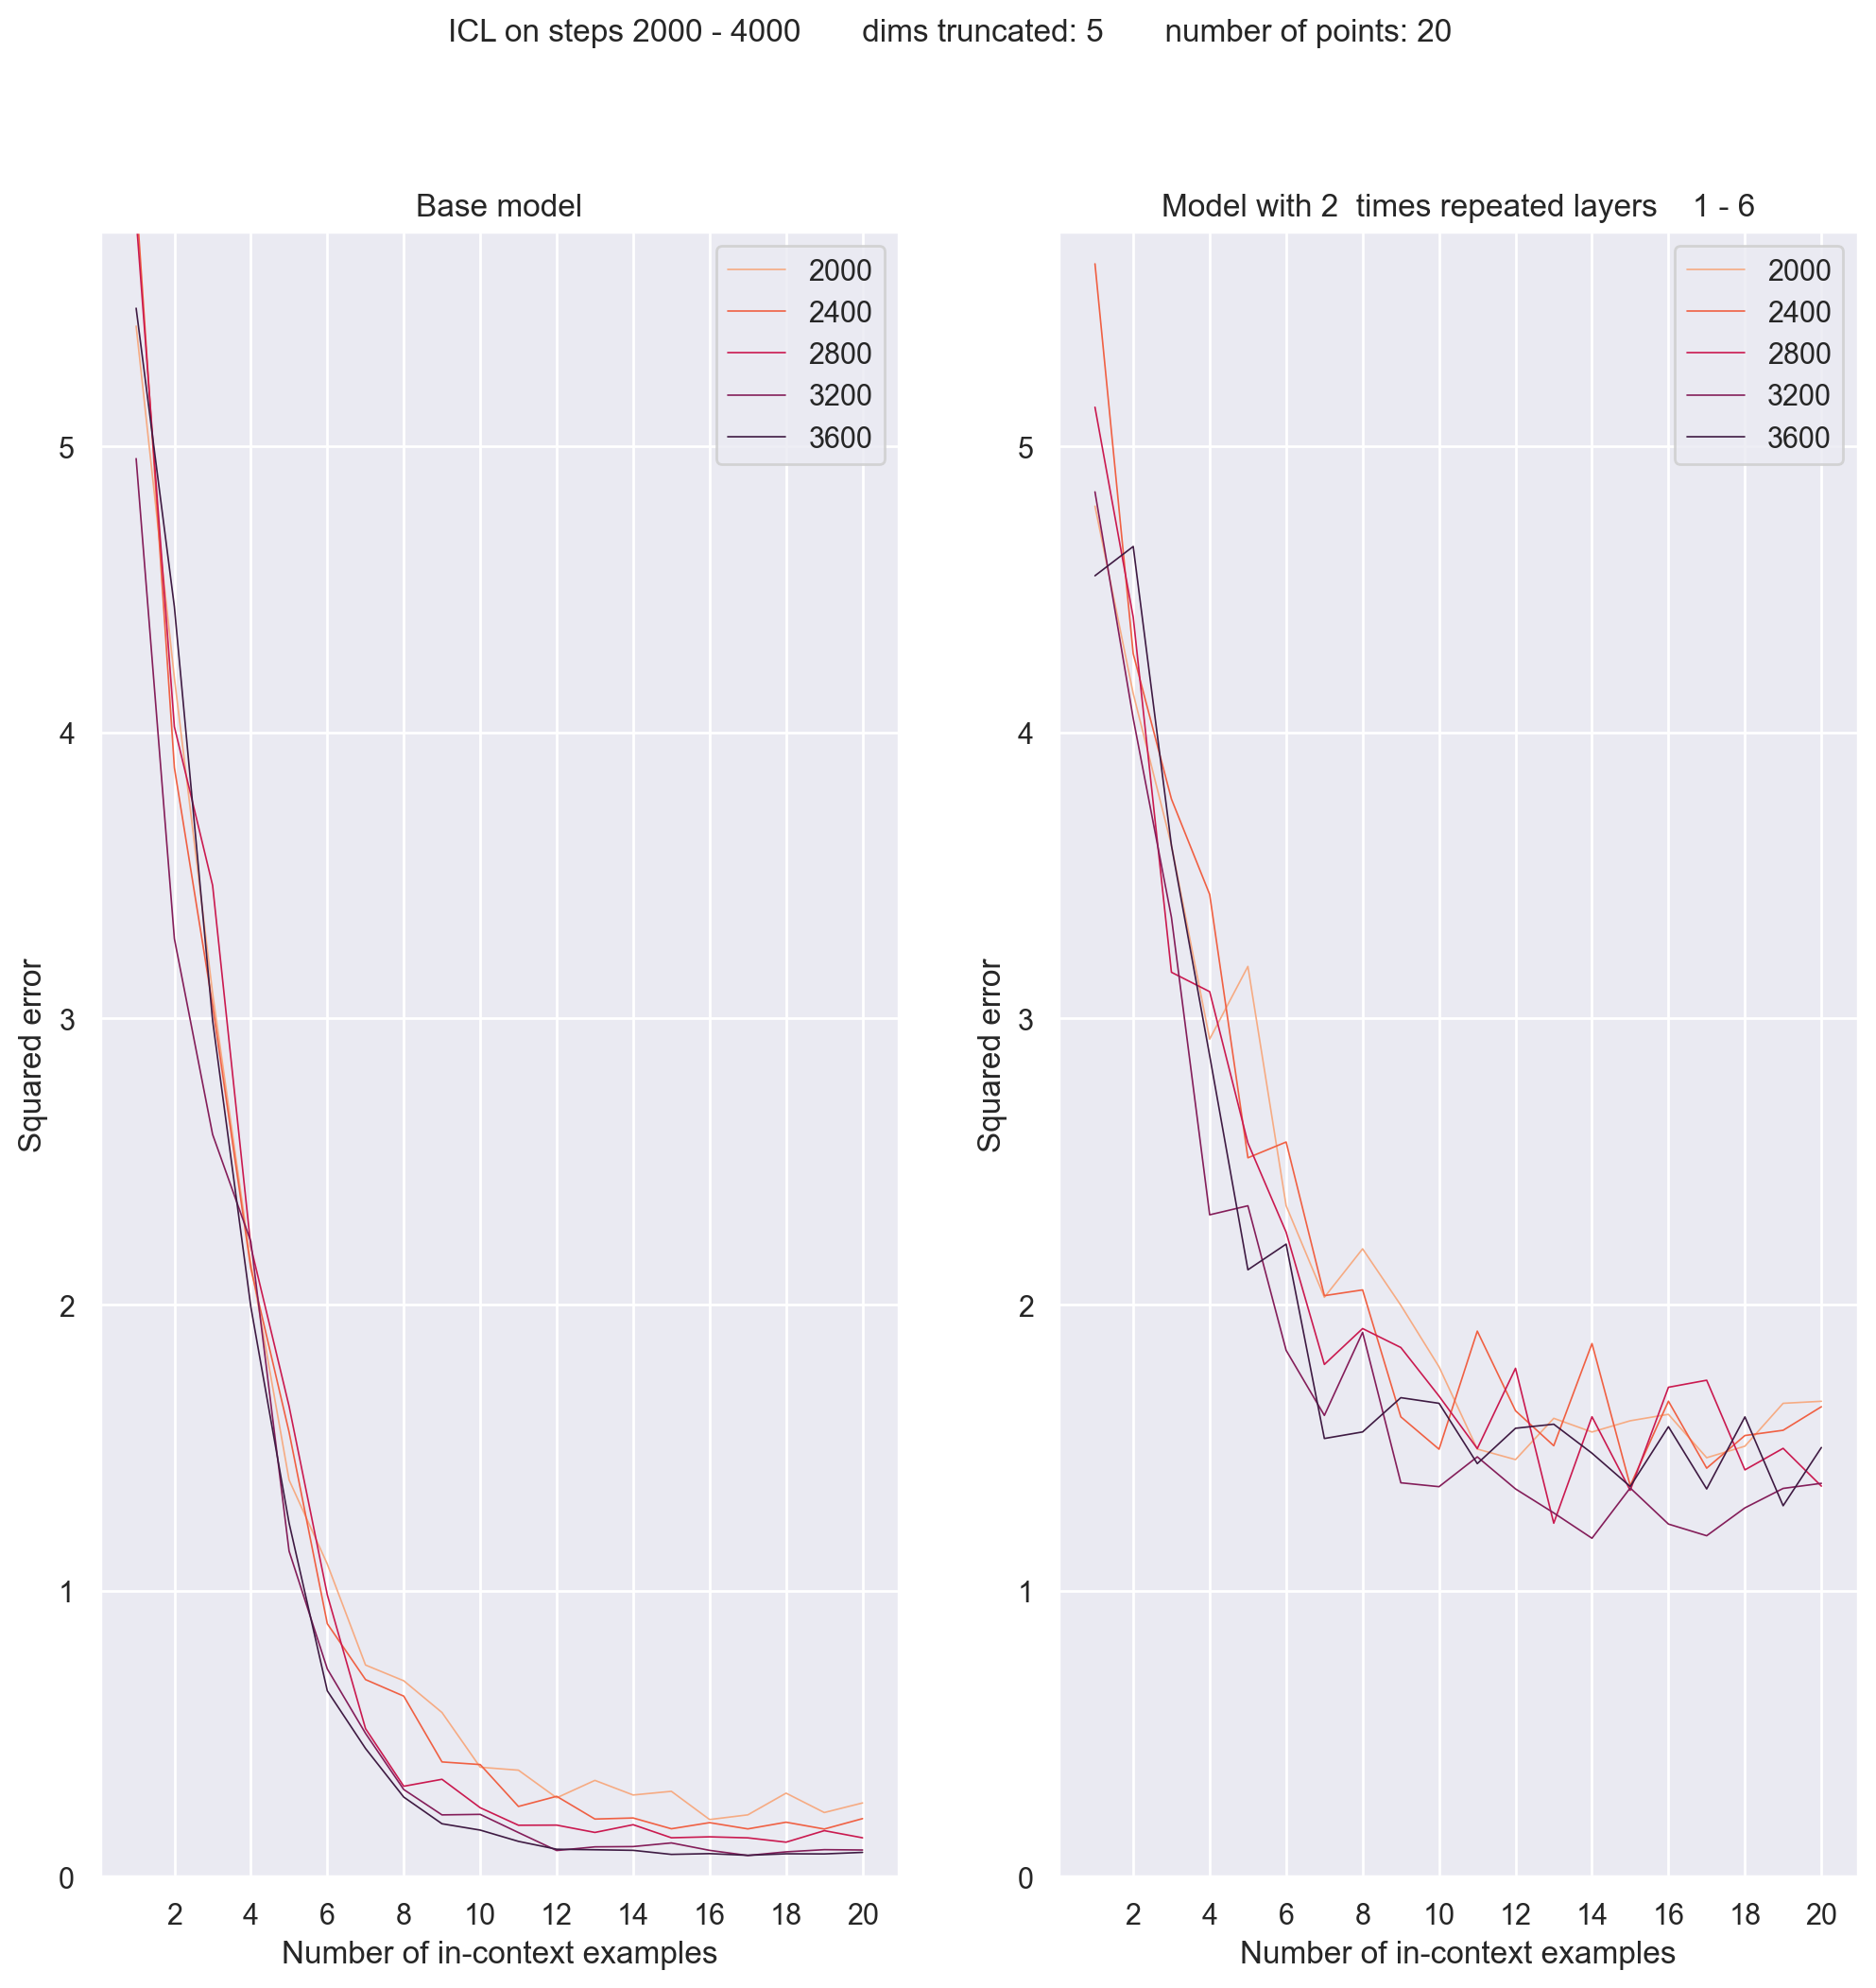

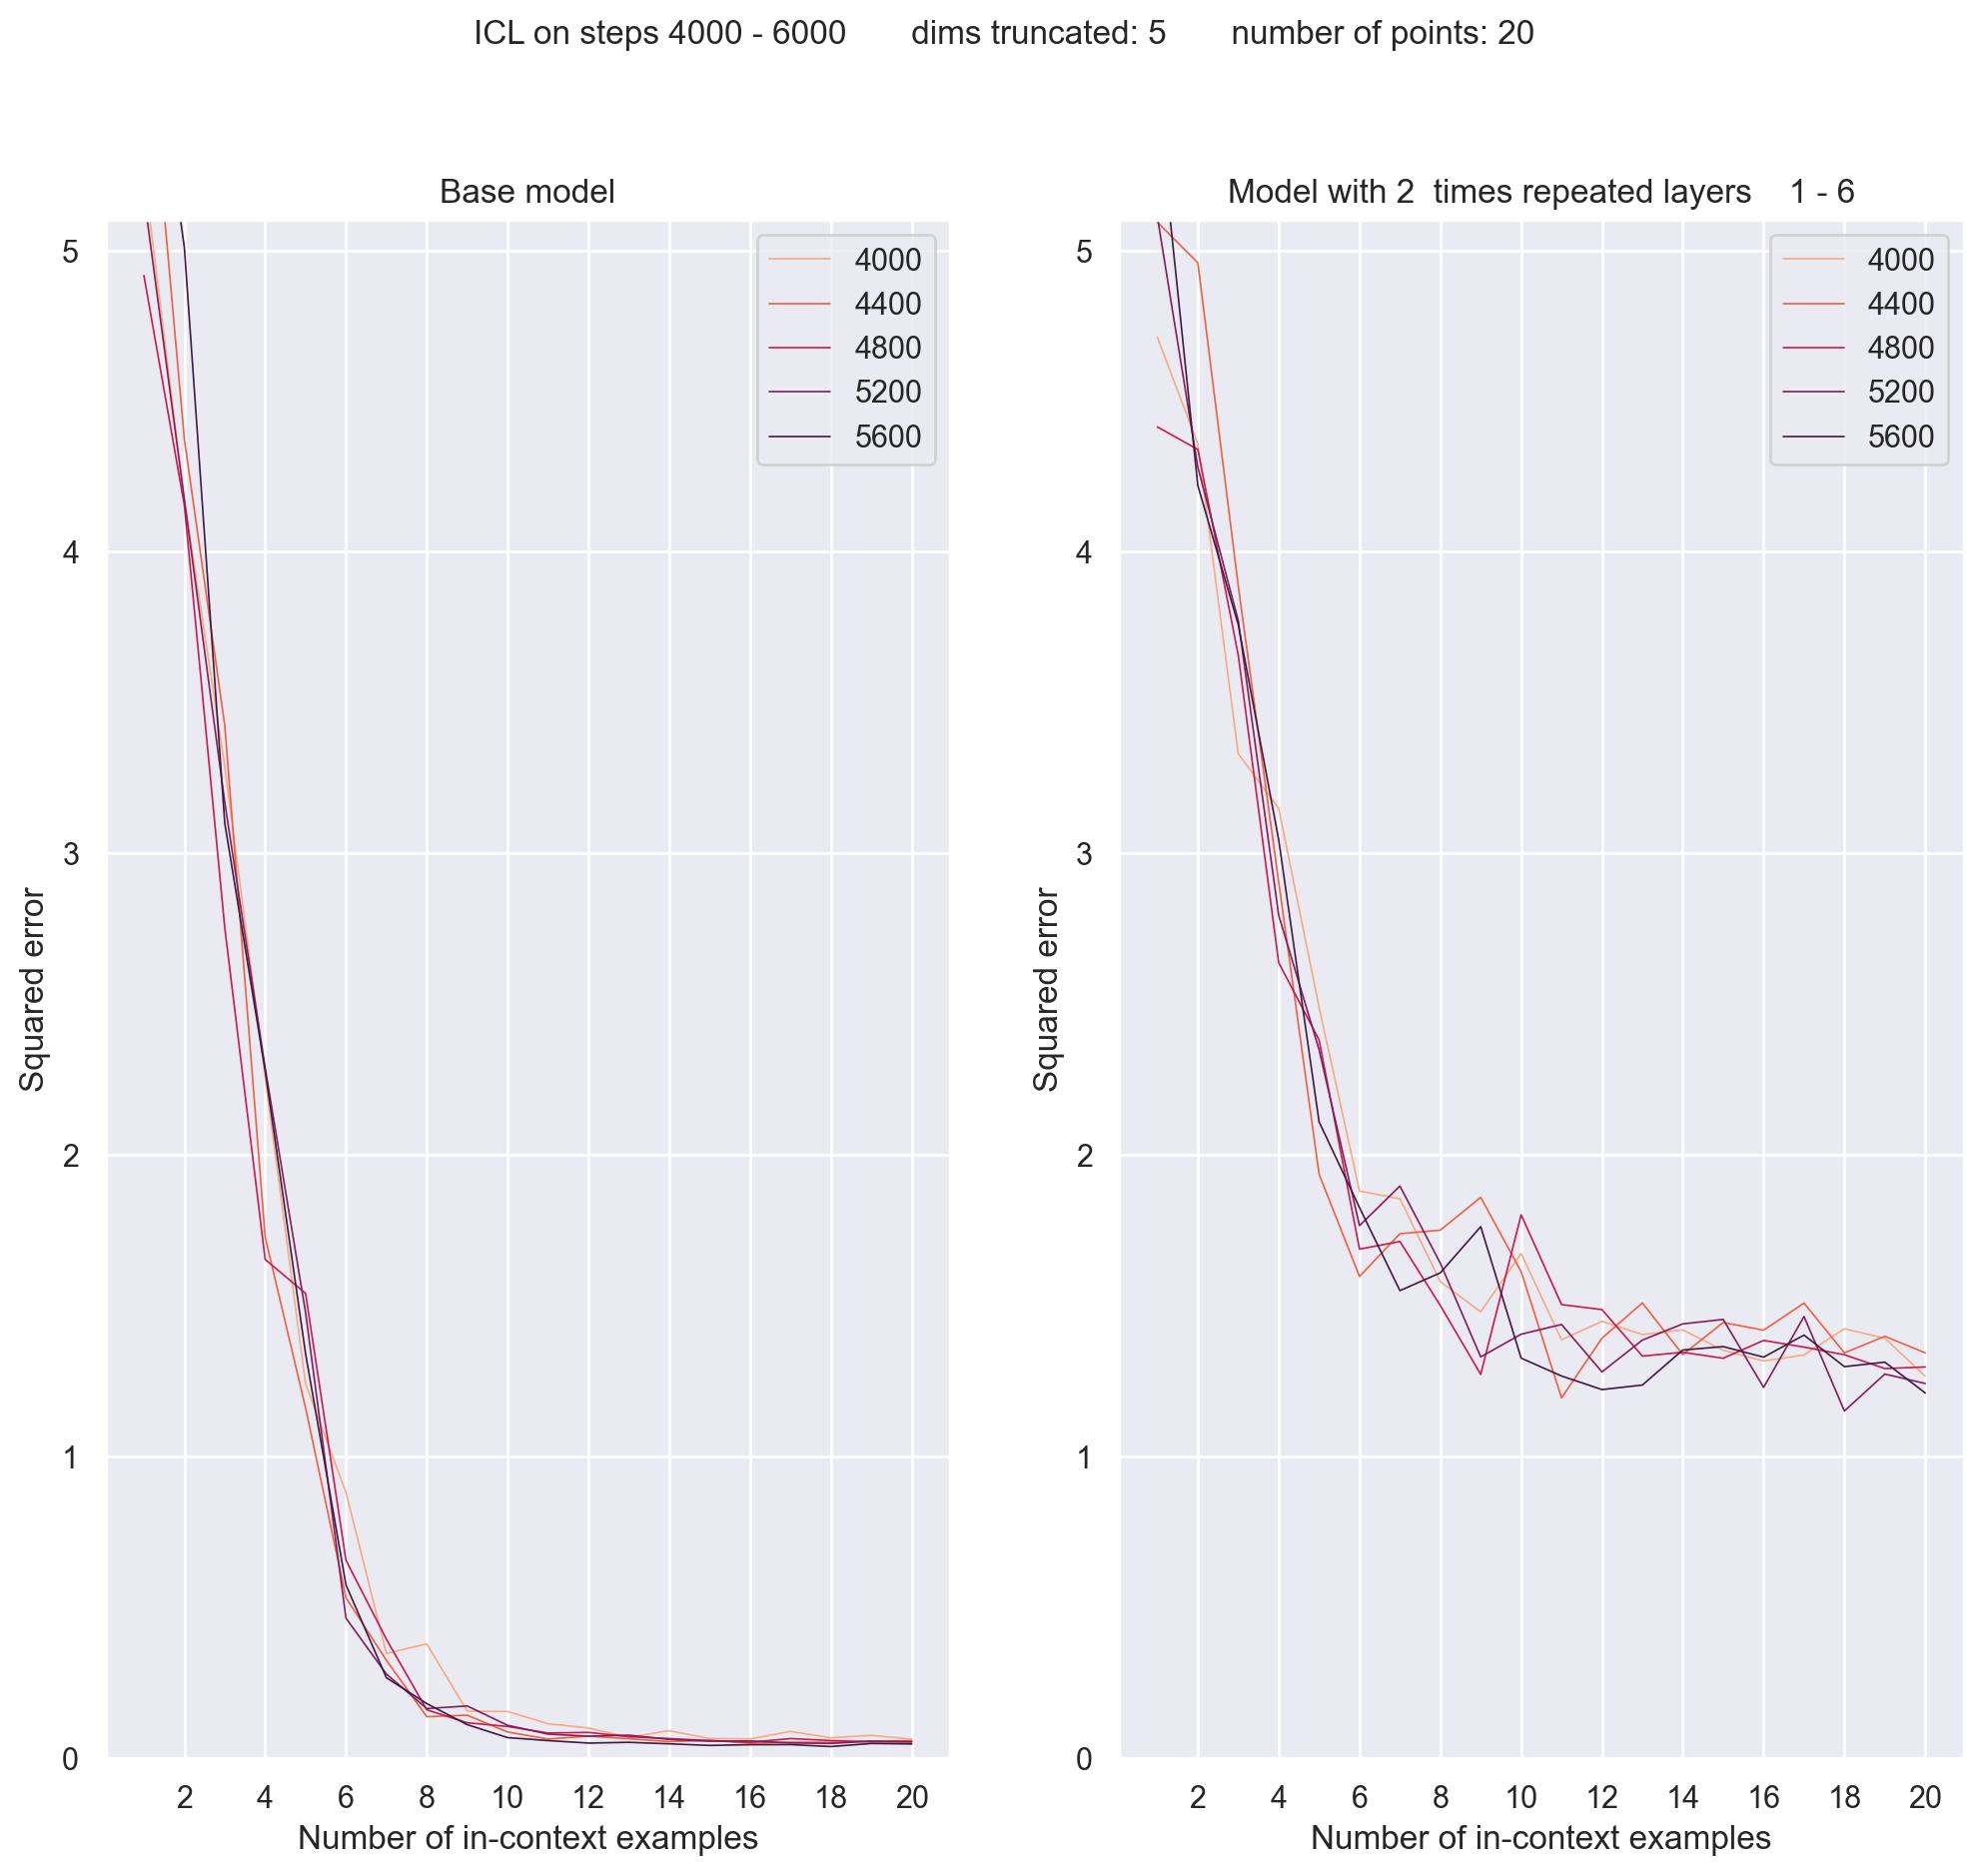

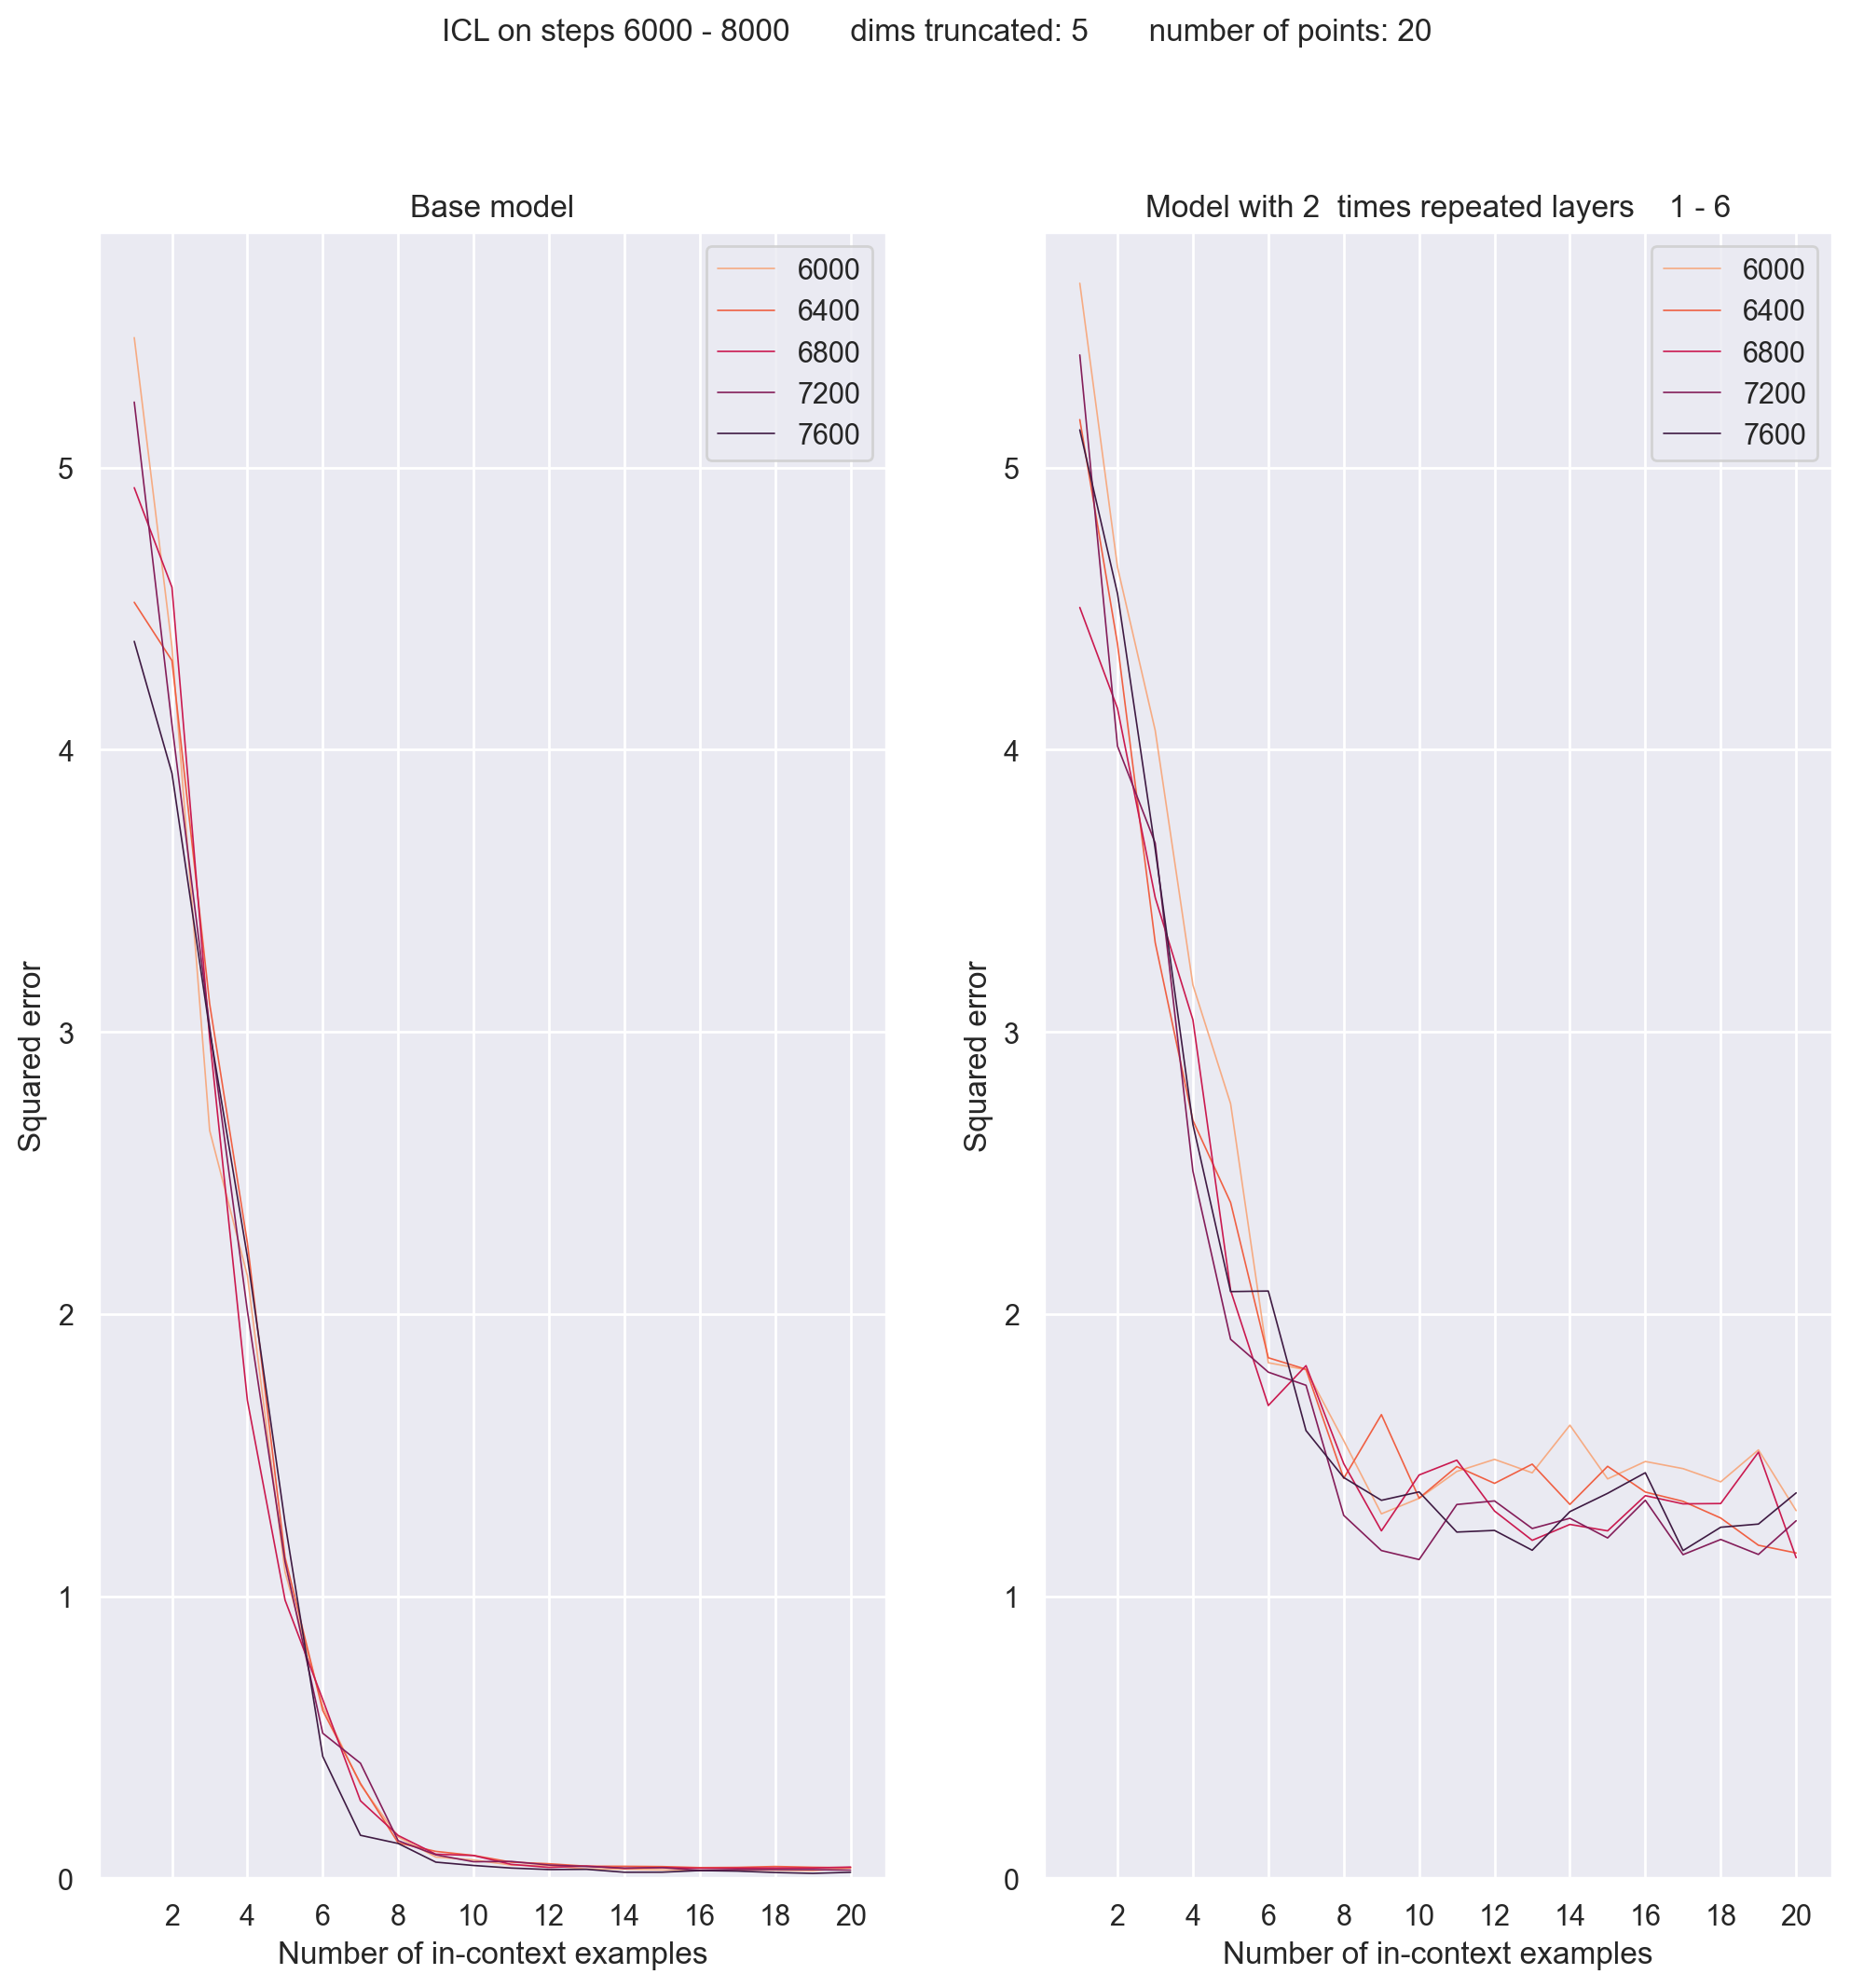

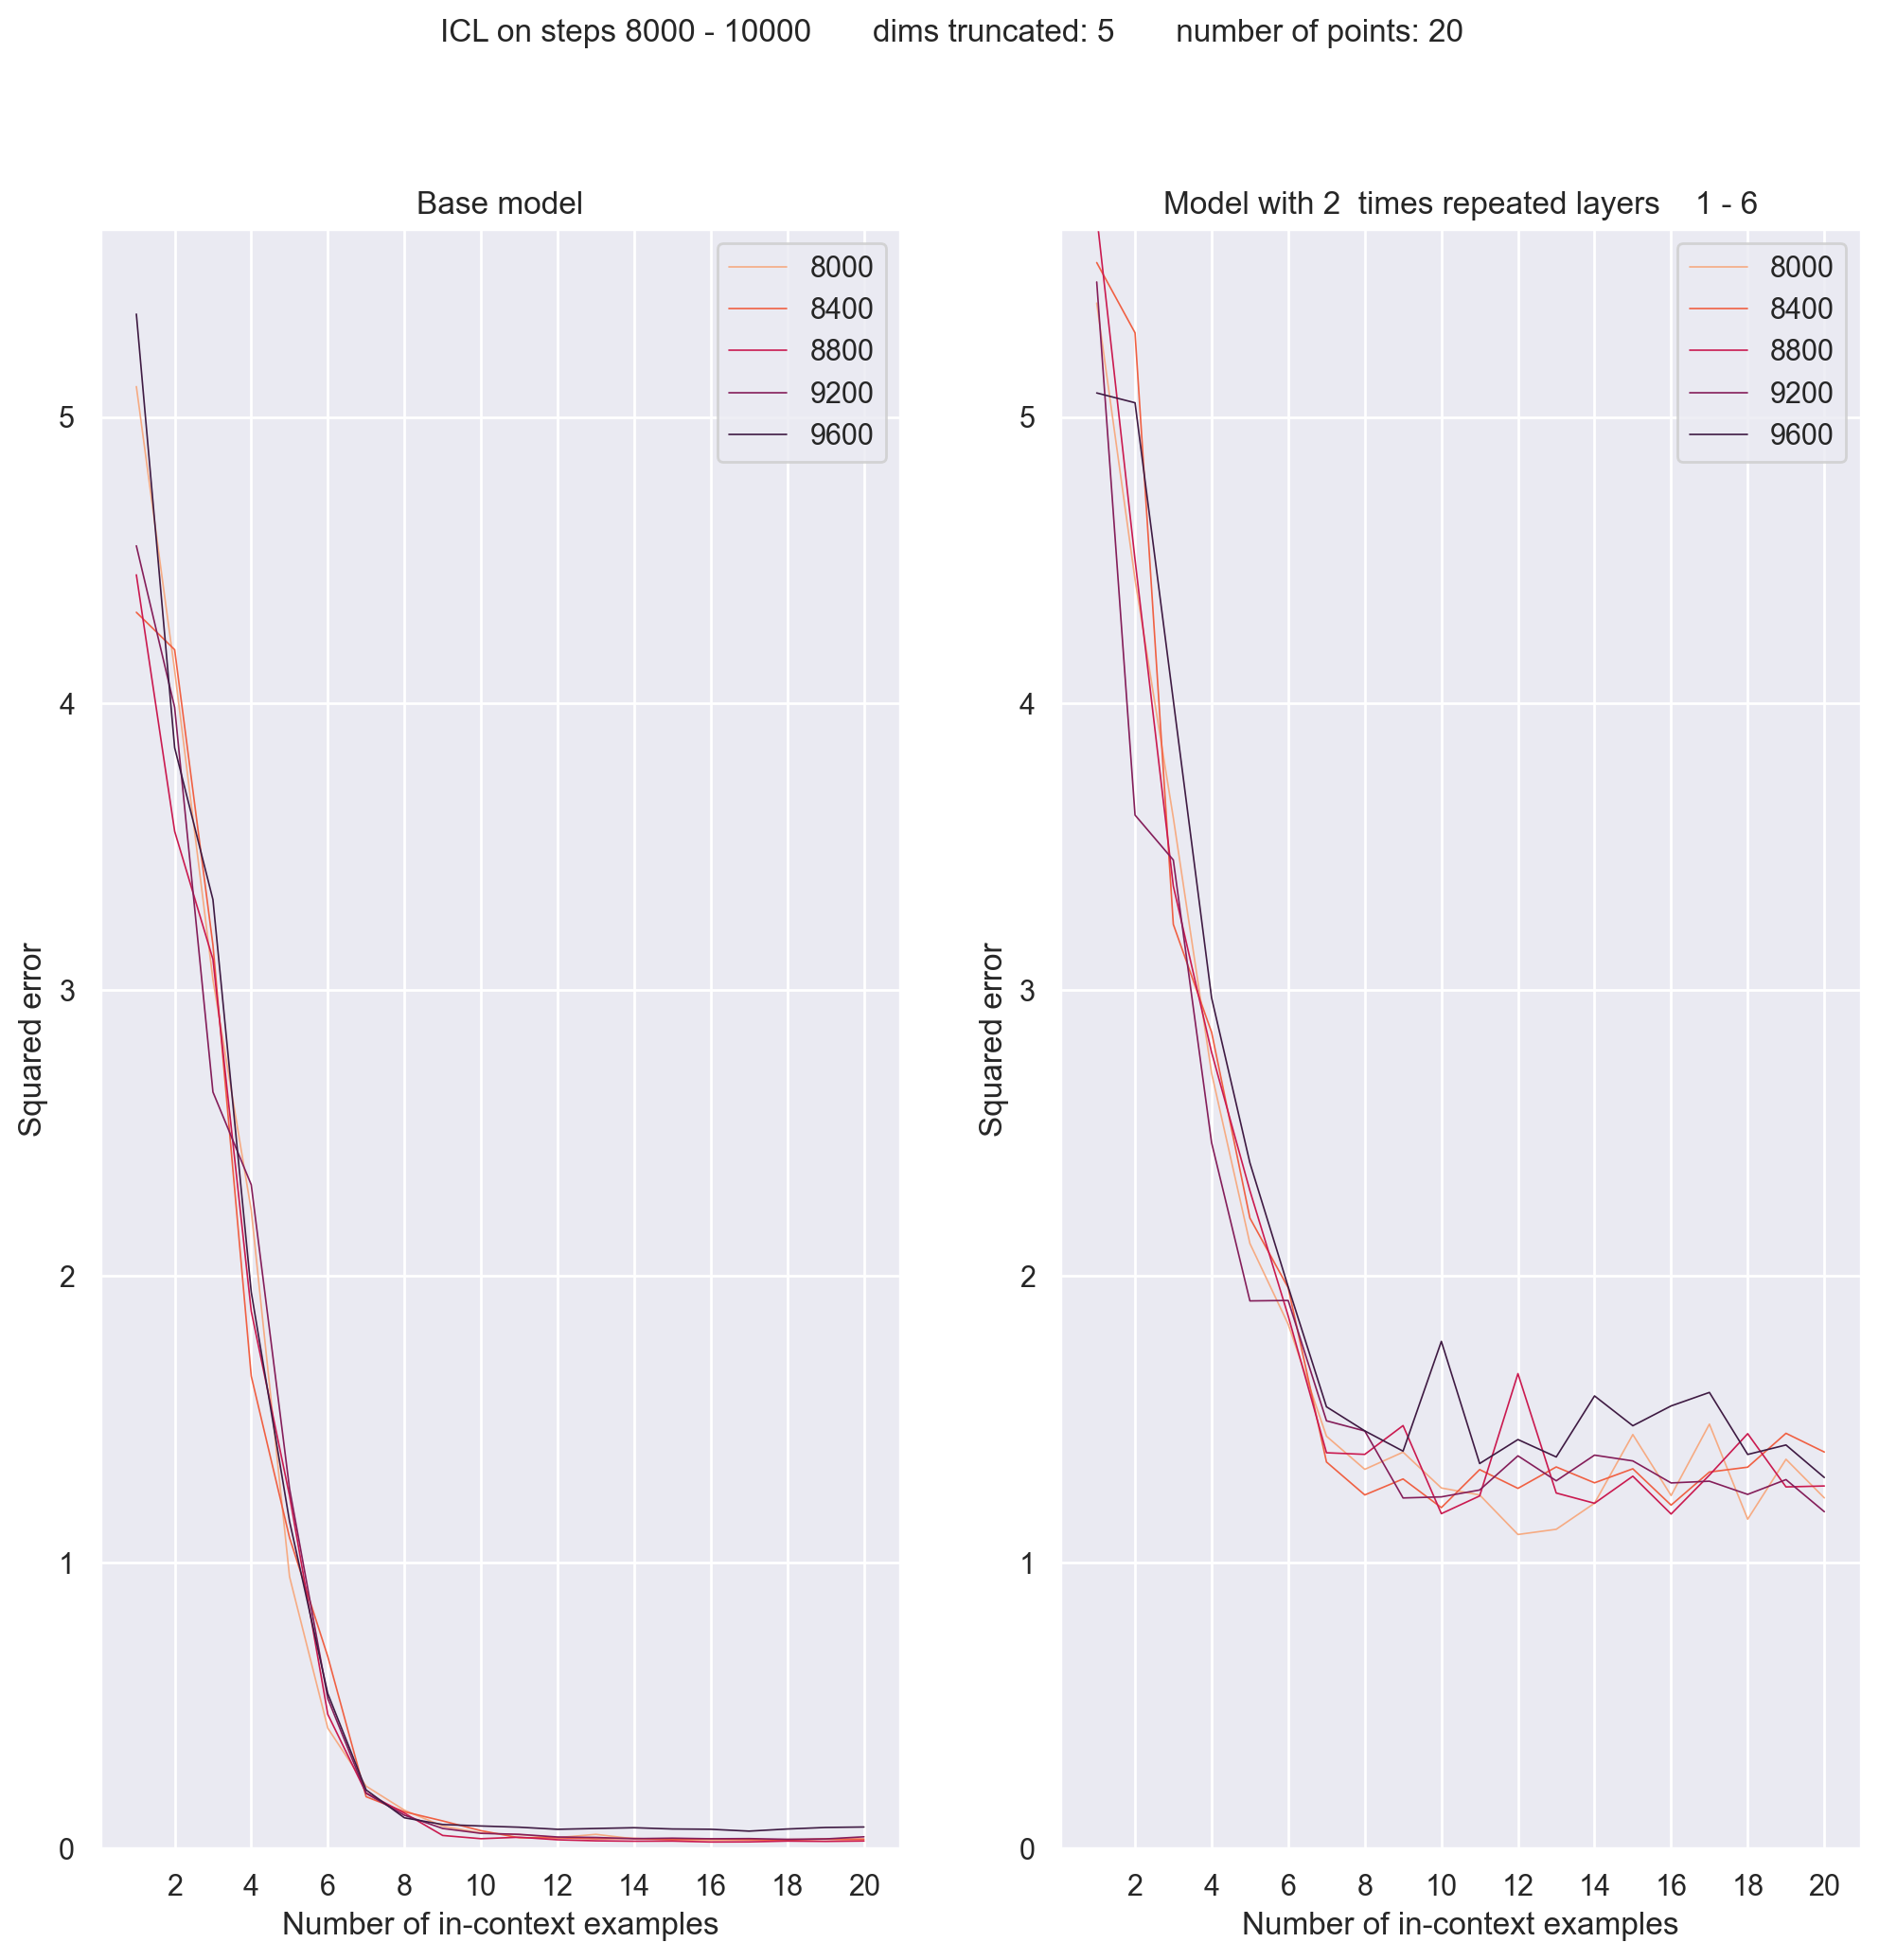

In [2]:
import yaml
short_name = 'permute_duplicate_baseline'
update = """
duplicate_params: [1, 6, 2]
new_backbone_training: False
readout2_training: True
permute_model: True
"""
update = yaml.safe_load(update)

clean_dirs_by_name(conf.out_dir, short_name)   
exp3 = Experiment(conf, short_name = short_name)
exp3.customize_experiment(update=update)
exp3.run_experiment()